# LINK TO THE DATASET

In [ ]:
# LINK TO THE DATASET
'''https://data.mendeley.com/datasets/n2rbrb9t4f/1'''

# DATA LOADING AND PREPROCESSING

In [ ]:
# LINK GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DO NOT RUN ON COLAB, ONLY JUPYTER
import os
import zipfile

folder = 'Downloads/Thesis Datasets'
output = 'Thesis_Datasets'
os.makedirs(output, exist_ok = True)

for zip_name in os.listdir(folder):
    if zip_name.endswith('.zip'):
        zip_path = os.path.join(folder, zip_name)
        extract_folder = os.path.join(output, os.path.splitext(zip_name)[0])

        # Create subfolder for each zip
        os.makedirs(extract_folder, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Extracted: {zip_name} → {extract_folder}")

Extracted: Combined_US_Dataset-20250729T160132Z-1-001.zip → Thesis_Datasets\Combined_US_Dataset-20250729T160132Z-1-001
Extracted: FUSEP_Dataset-20250729T160134Z-1-001.zip → Thesis_Datasets\FUSEP_Dataset-20250729T160134Z-1-001
Extracted: HC18 Dataset-20250729T160136Z-1-001.zip → Thesis_Datasets\HC18 Dataset-20250729T160136Z-1-001
Extracted: Shenzhen Dataset-20250729T160138Z-1-001.zip → Thesis_Datasets\Shenzhen Dataset-20250729T160138Z-1-001


In [ ]:
import os
import pandas as pd
# Path to Shenzhen dataset
root_path = '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT'

# Walk through all directories and files
for dirpath, dirnames, filenames in os.walk(root_path):
    print(f'Directory: {dirpath}')
    for dirname in dirnames:
        print(f'  Subdirectory: {dirname}')
    for filename in filenames:
        print(f'  File: {filename}')
    print("-" * 50)

Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT
  Subdirectory: Dataset for Fetus Framework
--------------------------------------------------
Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework
  Subdirectory: Dataset for Fetus Framework
  File: ObjectDetection.xlsx
--------------------------------------------------
Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework
  Subdirectory: External Test Set
  Subdirectory: Internal Test Set
  Subdirectory: Set1-Training&Validation Sets CNN
  Subdirectory: Set2-Training&Validation Sets ANN Scoring system
--------------------------------------------------
Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework/External Test Set
  Subdirectory: Non-standard
  Subdirectory: 

In [ ]:
import pandas as pd
annotation_path = '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/ObjectDetection.xlsx'
annotations = pd.read_excel(annotation_path)

In [ ]:
annotations.head()

fname   structure  h_min  w_min  h_max  w_max
0  168.png     thalami    178    171    244    261
1  168.png  nasal bone     96    308    111    349
2  168.png      palate    133    300    205    408
3  168.png  nasal skin     86    324     95    349
4  168.png   nasal tip     79    345     89    376

In [ ]:
# COMBINE US IMAGES FROM ONLY THE STANDARD FOLDERS
import os
import pandas as pd

# BASE DIRECTORY
base_dir = "/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework"

# Step 2: Define paths to the four "Standard" folders
standard_folders = [
    os.path.join(base_dir, "External Test Set/Standard"),
    os.path.join(base_dir, "Internal Test Set/Standard"),
    os.path.join(base_dir, "Set1-Training&Validation Sets CNN/Standard"),
    os.path.join(base_dir, "Set2-Training&Validation Sets ANN Scoring system/Standard")
]

# Step 3: Load all image filenames from these folders
shenzhen_standard_image_paths = []
for folder in standard_folders:
    for fname in os.listdir(folder):
        if fname.lower().endswith(".png"):
            shenzhen_standard_image_paths.append({
                "fname": fname,
                "image_path": os.path.join(folder, fname)
            })

df_images = pd.DataFrame(shenzhen_standard_image_paths)

In [ ]:
shenzhen_standard_image_paths

[{'fname': '1372.png',
  'image_path': '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework/External Test Set/Standard/1372.png'},
 {'fname': '1373.png',
  'image_path': '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework/External Test Set/Standard/1373.png'},
 {'fname': '1374.png',
  'image_path': '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework/External Test Set/Standard/1374.png'},
 {'fname': '1375.png',
  'image_path': '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus Framework/External Test Set/Standard/1375.png'},
 {'fname': '1376.png',
  'image_path': '/content/drive/MyDrive/Thesis/Thesis Datasets/Shenzhen Dataset/Shenzhen_NT/Dataset for Fetus Framework/Dataset for Fetus

In [ ]:
df_images.count()

fname         1197
image_path    1197
dtype: int64

In [ ]:
# PAIR ANNOTATIONS WITH STANDARD US FROM SHENZHEN DATASET
relevant_structures = ['NT', 'nasal bone']
filtered_annotations = annotations[annotations['structure'].str.lower().isin([s.lower() for s in relevant_structures])]

# Merge based on file name
Shenzhen_merged = pd.merge(df_images, filtered_annotations, on='fname', how='inner')

# Check result
print(f"Merged dataset shape: {Shenzhen_merged.shape}")
print(Shenzhen_merged.head())


Merged dataset shape: (2125, 7)
      fname                                         image_path   structure  \
0  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   
1  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...          NT   
2  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   
3  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...          NT   
4  1530.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   

   h_min  w_min  h_max  w_max  
0    145    314    160    355  
1    390    258    438    630  
2    122    309    134    340  
3    398    244    423    406  
4    160    305    170    334  


In [ ]:
shenzhen_merged = pd.DataFrame(Shenzhen_merged)

In [ ]:
shenzhen_merged.head()

fname                                         image_path   structure  \
0  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   
1  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...          NT   
2  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   
3  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...          NT   
4  1530.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   

   h_min  w_min  h_max  w_max  
0    145    314    160    355  
1    390    258    438    630  
2    122    309    134    340  
3    398    244    423    406  
4    160    305    170    334

In [ ]:
nt = sum(shenzhen_merged['structure']=='NT')
print(nt)
nasal = sum(shenzhen_merged['structure']=='nasal bone')
nasal

1110


1015

In [ ]:
shenzhen_merged.to_csv('shenzhen_merged.csv', index = False)

# PREPROCESSING FOR NT IMAGES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from albumentations import (
    Compose, Rotate, HorizontalFlip, VerticalFlip, RandomBrightnessContrast, Resize,
    Normalize, ShiftScaleRotate, GaussianBlur
)
from albumentations.pytorch import ToTensorV2
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shenzhen_merged.head()

fname                                         image_path   structure  \
0  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   
1  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...          NT   
2  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   
3  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...          NT   
4  1530.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...  nasal bone   

   h_min  w_min  h_max  w_max  
0    145    314    160    355  
1    390    258    438    630  
2    122    309    134    340  
3    398    244    423    406  
4    160    305    170    334

In [ ]:
# PREPROCESSING FOR NT IMAGES
# Filter for NT structures and calculate NT thickness
nt_df = shenzhen_merged[shenzhen_merged['structure'] == 'NT'].copy()

# Calculate NT thickness from vertical dimension (h_max - h_min)
nt_df['nt_thickness_px'] = nt_df['h_max'] - nt_df['h_min']
nt_df['nt_thickness_mm'] = nt_df['nt_thickness_px'] * 0.1  # Convert to mm
nt_df['label'] = nt_df['nt_thickness_mm'].apply(lambda x: 1 if x > 3.5 else 0)  # 1=anomalous, 0=normal

# Calculate bounding box dimensions for cropping
nt_df['width'] = nt_df['w_max'] - nt_df['w_min']
nt_df['height'] = nt_df['h_max'] - nt_df['h_min']

# Split into train and temp
df_train, df_temp = train_test_split(nt_df, test_size=0.25, stratify=nt_df['label'], random_state=16)

# Split temp into validation and test
df_val, df_test = train_test_split(df_temp, test_size=0.4, stratify=df_temp['label'], random_state=16)

In [ ]:
nt_df.head()

fname                                         image_path structure  \
1  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
3  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
5  1530.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
6  1531.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
8  1532.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   

   h_min  w_min  h_max  w_max  nt_thickness_px  nt_thickness_mm  label  width  \
1    390    258    438    630               48              4.8      1    372   
3    398    244    423    406               25              2.5      0    162   
5    348    227    372    497               24              2.4      0    270   
6    382    227    412    529               30              3.0      0    302   
8    367    225    385    402               18              1.8      0    177   

   height  
1      48  
3      25  
5      24  
6      30  
8      18

In [ ]:
print(sum(nt_df['label']==1))
print(sum(nt_df['label']==0))

496
614


In [ ]:
# Split into train and temp
df_train, df_temp = train_test_split(nt_df, test_size=0.25, stratify=nt_df['label'], random_state=16)

# Split temp into validation and test
df_val, df_test = train_test_split(df_temp, test_size=0.4, stratify=df_temp['label'], random_state=16)

In [ ]:
test_dataset = df_test.copy()

In [ ]:
# IMAGE PREPROCESSING USING CLAHE (USED BY RESHI ET AL., 2024)
# CLAHE CONFIG.
def apply_clahe(gray_img, clip_limit=2.0, grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(gray_img)

In [ ]:
# Visualization function
def visualize_sample(image, bbox, thickness, label):
    """Visualize image with bounding box and thickness information"""
    # Convert to RGB if grayscale
    if len(image.shape) == 2:
        vis_img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        vis_img = image.copy()

    # Create figure
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(vis_img)

    # Create bounding box rectangle
    w_min, h_min, w_max, h_max = bbox
    width = w_max - w_min
    height = h_max - h_min
    rect = patches.Rectangle(
        (w_min, h_min), width, height,
        linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

    # Add text info
    status = "ANOMALOUS" if label == 1 else "NORMAL"
    plt.title(f"NT Thickness: {thickness:.2f}mm ({status})\n"
             f"BBox: x={w_min}-{w_max}, y={h_min}-{h_max}", fontsize=12)
    plt.axis('off')
    plt.show()

In [ ]:
# Dataset class with correct coordinate handling
class NTDataset(Dataset):
    def __init__(self, df, transform=None, phase='train'):
        self.df = df
        self.transform = transform
        self.phase = phase

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['image_path']

        # Read image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {img_path}")

        # Get bounding box coordinates
        x_min = row['w_min']
        x_max = row['w_max']
        y_min = row['h_min']
        y_max = row['h_max']

        # Convert to integers
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

        # Boundary checks
        height, width = image.shape[:2]
        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(width, x_max)
        y_max = min(height, y_max)

        # Ensure valid bounding box
        if x_max <= x_min or y_max <= y_min:
            # Fallback to entire image if invalid bbox
            nt_crop = image.copy()
            print(f"Warning: Invalid bounding box in {img_path} - using full image")
        else:
            # Crop NT region
            nt_crop = image[y_min:y_max, x_min:x_max]

        # Handle empty crops
        if nt_crop.size == 0:
            nt_crop = image.copy()
            print(f"Warning: Empty crop in {img_path} - using full image")

        # Convert to grayscale
        gray = cv2.cvtColor(nt_crop, cv2.COLOR_BGR2GRAY) if len(nt_crop.shape) == 3 else nt_crop

        # Apply CLAHE
        clahe_img = apply_clahe(gray)

        # Convert to 3-channel for model compatibility
        clahe_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply transformations
        if self.transform:
            transformed = self.transform(image=clahe_rgb)
            image_tensor = transformed['image']
        else:
            # Fallback to simple resize if no transform
            resized = cv2.resize(clahe_rgb, (224, 224))
            image_tensor = torch.from_numpy(resized).permute(2, 0, 1).float() / 255.0

        # Get label and thickness
        label = row['label']

        # Visualize first sample for verification
        if idx == 0 and self.phase == 'train':
            print(f"Sample - Original dimensions: {image.shape}")
            print(f"NT region: w_min={x_min}, h_min={y_min}, w_max={x_max}, h_max={y_max}")

        return image_tensor, label

In [ ]:
# Enhanced augmentation for ResNet18
def get_train_transform():
    return Compose([
        Rotate(limit=12, border_mode=cv2.BORDER_CONSTANT, fill=0, p=0.8),
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.3),
        ShiftScaleRotate(
            shift_limit=0.08,
            scale_limit=0.15,
            rotate_limit=8,
            border_mode=cv2.BORDER_CONSTANT,
            fill=0,
            p=0.8
        ),
        RandomBrightnessContrast(
            brightness_limit=0.25,
            contrast_limit=0.25,
            p=0.6
        ),
        GaussianBlur(blur_limit=(3, 5), p=0.3),
        Resize(224, 224),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_val_transform():
    return Compose([
        Resize(224, 224),  # Same as training
        Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                  std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

In [ ]:
# Create datasets and dataloaders
train_dataset = NTDataset(
    df_train,
    transform=get_train_transform(),
    phase='train'
)

val_dataset = NTDataset(
    df_val,
    transform=get_val_transform(),
    phase='val'
)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
BATCH_SIZE = 16
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

# Dataset statistics
print(f"Total NT samples: {len(nt_df)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")
print(f"Normal samples: {sum(nt_df['label'] == 0)}")
print(f"Anomalous samples: {sum(nt_df['label'] == 1)}")
print(f"Anomaly ratio: {sum(nt_df['label'] == 1)/len(nt_df):.2f}")

Total NT samples: 1110
Training samples: 832
Validation samples: 166
Testing samples: 112
Normal samples: 614
Anomalous samples: 496
Anomaly ratio: 0.45


# CLASSIFICATION ON REAL US IMAGES WITH EFFICIENTNET-B0

In [ ]:
!pip install efficientnet_pytorch
# Upgrade albumentations
!pip install albumentations==1.0.3
!pip install torchvision==0.10.0
!pip install pydantic==1.8.2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.5 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=d7bde448db324206290d14f194af38ed9f69cdbb1bdbc29d9

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from albumentations import (
    Compose, Rotate, HorizontalFlip, VerticalFlip, RandomBrightnessContrast, Resize,
    Normalize, ShiftScaleRotate, GaussianBlur
)
from albumentations.pytorch import ToTensorV2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from torch.utils.data import Dataset, DataLoader

In [3]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# Define model and training parameters
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
SAVE_DIR = "/content/drive/MyDrive/Thesis/real_model_artifacts"
os.makedirs(SAVE_DIR, exist_ok=True)
HISTORY_FILE = os.path.join(SAVE_DIR, 'real_training_history.json')
MODEL_PATH = os.path.join(SAVE_DIR, 'real_best_model_enet.pth')

In [5]:
nt_df = pd.read_csv('/content/real_nt.csv')

In [6]:
# Split into train and temp
df_train, df_temp = train_test_split(nt_df, test_size=0.25, stratify=nt_df['label'], random_state=16)

# Split temp into validation and test
df_val, df_test = train_test_split(df_temp, test_size=0.4, stratify=df_temp['label'], random_state=16)

In [70]:
def apply_clahe(image, clipLimit=2.0, tileGridSize=(8, 8)):
    """Applies Contrast Limited Adaptive Histogram Equalization (CLAHE)."""
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(image)

In [71]:
# Enhanced augmentations for EfficientNet
def get_train_transform_en():
    return A.Compose([
        A.RandomResizedCrop(height=224, width=224, scale=(0.7, 1.0), ratio=(0.8, 1.2), p=0.5),
        A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.8),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.ShiftScaleRotate(
            shift_limit=0.1,
            scale_limit=0.2,
            rotate_limit=12,
            border_mode=cv2.BORDER_CONSTANT,
            value=0,
            p=0.8
        ),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05, p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), p=0.3),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.2),
        A.CoarseDropout(max_holes=8, max_height=16, max_width=16, fill_value=0, p=0.3),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_val_transform_en():
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_test_transform_en():
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

In [72]:
class NTDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['image_path']

        # Read image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {img_path}")

        # Resize, CLAHE, and convert to RGB
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        clahe_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply augmentation and normalization
        if self.transform:
            augmented = self.transform(image=clahe_rgb)
            image_tensor = augmented['image']
        else:
            image_tensor = torch.tensor(clahe_rgb).permute(2, 0, 1).float() / 255.0

        label = torch.tensor(row['label'], dtype=torch.float32)
        return image_tensor, label

In [73]:
# Create datasets and dataloaders
train_dataset = NTDataset(
    df_train,
    transform=get_train_transform_en()
)

val_dataset = NTDataset(
    df_val,
    transform=get_val_transform_en()
)

test_dataset = NTDataset(
    df_test,
    transform=get_test_transform_en()
)

In [74]:
BATCH_SIZE = 16
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
    )

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

# Dataset statistics
print(f"Total NT samples: {len(nt_df)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")
print(f"Normal samples: {sum(nt_df['label'] == 0)}")
print(f"Anomalous samples: {sum(nt_df['label'] == 1)}")
print(f"Anomaly ratio: {sum(nt_df['label'] == 1)/len(nt_df):.2f}")

Total NT samples: 1110
Training samples: 832
Validation samples: 166
Testing samples: 112
Normal samples: 614
Anomalous samples: 496
Anomaly ratio: 0.45


Displaying a sample image from the DataLoader...


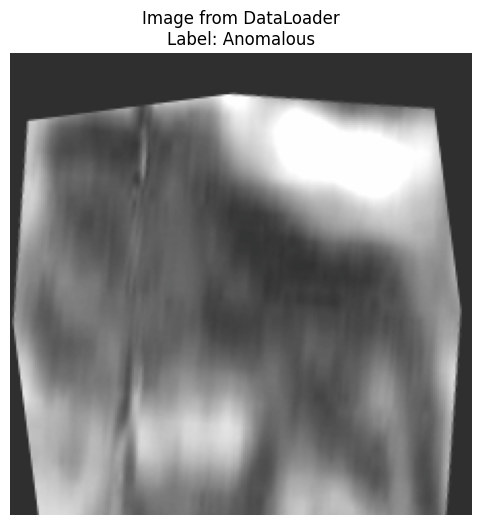


Image displayed successfully!


In [64]:
print("Displaying a sample image from the DataLoader...")
# Get a single batch of data from the DataLoader
images, labels = next(iter(train_loader))

# Select the first image and label from the batch
image_tensor = images[0]
label_tensor = labels[0]

# Un-normalize the image tensor for proper visualization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_np = image_tensor.permute(1, 2, 0).numpy()
image_np = std * image_np + mean
image_np = np.clip(image_np, 0, 1)

# Map the label to a descriptive string
label_map = {0.0: 'Normal', 1.0: 'Anomalous'}
label_str = label_map.get(label_tensor.item(), 'Unknown')

# Display the image and label
plt.figure(figsize=(6, 6))
plt.imshow(image_np)
plt.title(f"Image from DataLoader\nLabel: {label_str}")
plt.axis('off')
plt.show()

print("\nImage displayed successfully!")

In [75]:
class NTClassifier(nn.Module):
    def __init__(self):
        super(NTClassifier, self).__init__()
        self.base = EfficientNet.from_pretrained('efficientnet-b0')
        # Freeze all parameters in the base model
        for param in self.base.parameters():
            param.requires_grad = False

        # Replace the final fully connected layer with an identity module
        num_features = self.base._fc.in_features
        self.base._fc = nn.Identity()

        # Custom classifier on top of the base model
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        features = self.base(x)
        return self.classifier(features)

In [76]:
# TRAINING HELPER FUNCTIONS
def unfreeze_layers(model, epoch):
    """Gradually unfreezes layers of the EfficientNet model for fine-tuning."""
    if epoch == 3:
        # Unfreeze classifier layers
        for param in model.classifier.parameters():
            param.requires_grad = True
        print("Unfroze classifier layers")

    elif epoch == 8:
        # Unfreeze top 3 blocks of the base model
        for name, param in model.base.named_parameters():
            if 'blocks.5' in name or 'blocks.6' in name or 'blocks.7' in name:
                param.requires_grad = True
        print("Unfroze top 3 blocks")

    elif epoch == 15:
        # Unfreeze all layers of the model
        for param in model.parameters():
            param.requires_grad = True
        print("Unfroze all layers")

In [77]:
# MAIN TRAINING FUNCTIONS
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs):
    """
    Main training loop for the model.
    Saves the best model based on validation loss and training history,
    computes and stores AUC and F1-score for each epoch.
    """
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": [],
        "train_f1": [],
        "val_f1": [],
        "train_auc": [],
        "val_auc": [],
    }
    best_val_loss = float('inf')

    for epoch in range(1, num_epochs + 1):
        unfreeze_layers(model, epoch)
        print(f"Epoch {epoch}/{num_epochs}")

        # --- Training phase ---
        model.train()
        train_loss = 0.0
        train_preds = []
        train_labels = []
        train_probs = []
        total_train = 0

        for images, labels in tqdm(train_loader, desc="Training"):
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            train_preds.extend(preds.detach().cpu().numpy().flatten())
            train_labels.extend(labels.detach().cpu().numpy().flatten())
            train_probs.extend(probs.detach().cpu().numpy().flatten())
            total_train += labels.size(0)

        avg_train_loss = train_loss / total_train
        train_accuracy = accuracy_score(train_labels, train_preds)
        train_f1 = f1_score(train_labels, train_preds)
        train_auc = roc_auc_score(train_labels, train_probs)

        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_accuracy)
        history['train_f1'].append(train_f1)
        history['train_auc'].append(train_auc)

        # --- Validation phase ---
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []
        val_probs = []
        total_val = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc="Validation"):
                images, labels = images.to(device), labels.float().unsqueeze(1).to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)

                probs = torch.sigmoid(outputs)
                preds = (probs > 0.5).float()

                val_preds.extend(preds.detach().cpu().numpy().flatten())
                val_labels.extend(labels.detach().cpu().numpy().flatten())
                val_probs.extend(probs.detach().cpu().numpy().flatten())
                total_val += labels.size(0)

        avg_val_loss = val_loss / total_val
        val_accuracy = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)
        val_auc = roc_auc_score(val_labels, val_probs)

        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(val_accuracy)
        history['val_f1'].append(val_f1)
        history['val_auc'].append(val_auc)

        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1: {train_f1:.4f}, Train AUC: {train_auc:.4f}")
        print(f"Validation Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Val AUC: {val_auc:.4f}")

        # Save the best model based on validation loss
        if avg_val_loss < best_val_loss:
            print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model...")
            best_val_loss = avg_val_loss
            torch.save({
                'epoch': epoch,
                'real_model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': best_val_loss
            }, MODEL_PATH)

    # Save training history to a JSON file
    with open(HISTORY_FILE, 'w') as f:
        json.dump(history, f)
    print("Training history saved.")

In [78]:
# VISUALIZATION FUNCTION
def plot_training_history(history_file):
    """Plots the training and validation loss, accuracy, F1-score, and AUC from a JSON file."""
    if not os.path.exists(history_file) or os.path.getsize(history_file) == 0:
        print(f"Error: The history file '{history_file}' does not exist or is empty.")
        return

    try:
        with open(history_file, 'r') as f:
            history = json.load(f)
    except json.JSONDecodeError:
        print(f"Error: The file '{history_file}' is not a valid JSON file. It might be corrupted.")
        return

    required_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1', 'train_auc', 'val_auc']
    if not all(key in history for key in required_keys):
        print("The history file is missing required data keys.")
        return

    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 12))

    # Plot Loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-o', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-o', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], 'r-o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot F1-Score
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['train_f1'], 'b-o', label='Training F1-Score')
    plt.plot(epochs, history['val_f1'], 'r-o', label='Validation F1-Score')
    plt.title('Training and Validation F1-Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid(True)

    # Plot AUC
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['train_auc'], 'b-o', label='Training AUC')
    plt.plot(epochs, history['val_auc'], 'r-o', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plot_path = os.path.join(SAVE_DIR, 'real_training_history_plot.png')
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"Training history plot saved to {plot_path}")

In [79]:
# VISUALIZATION OF PREDICTIONS BY THE MODEL
def visualize_predictions(results, num_samples=10):
    """
    Visualizes a selection of correct and incorrect predictions.
    """
    correct = [r for r in results if r['true_label'] == r['pred_label']]
    incorrect = [r for r in results if r['true_label'] != r['pred_label']]

    samples = (correct[:num_samples//2] if len(correct) >= num_samples//2 else correct) + \
              (incorrect[:num_samples//2] if len(incorrect) >= num_samples//2 else incorrect)

    if not samples:
        print("No samples to visualize.")
        return

    num_cols = 5
    num_rows = (len(samples) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

    # Flatten the axes array for easier iteration
    if num_rows == 1:
        axes = [axes] if len(samples) <= 5 else axes
    else:
        axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i >= len(samples):
            ax.axis('off')
            continue

        res = samples[i]

        # Load and preprocess the image
        img_path = res['image_path']
        if not os.path.exists(img_path):
            img = np.zeros((224, 224, 3), dtype=np.uint8)
            cv2.putText(img, "Dummy Image", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        else:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                img = np.zeros((224, 224, 3), dtype=np.uint8)

        # Add text info
        status_map = {0.0: "NORMAL", 1.0: "ANOMALOUS"}
        true_status = status_map.get(res['true_label'], 'N/A')
        pred_status = status_map.get(res['pred_label'], 'N/A')

        color = "green" if res['true_label'] == res['pred_label'] else "red"

        ax.imshow(img)
        title = (f"True: {true_status}\nPred: {pred_status}\n"
                 f"Prob: {res['probability']:.2f}")
        ax.set_title(title, color=color, fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    viz_path = os.path.join(SAVE_DIR, 'real_sample_predictions.png')
    plt.savefig(viz_path, dpi=300)
    plt.show()
    print(f"Prediction visualization saved to {viz_path}")

In [80]:
# EVALUATION FUNCTION
def evaluate_model(model, test_loader, df_test):
    """
    Evaluates the final model on the test set and returns results for visualization.
    """
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []
    all_probs = []

    print("Evaluating model on test set...")
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluation"):
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())
            all_probs.extend(probs.cpu().numpy().flatten())

    # Calculate and print metrics
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)

    print("================== Evaluation Metrics ==================")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("======================================================")

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Normal', 'Anomalous'])
    plt.yticks([0, 1], ['Normal', 'Anomalous'])

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    cm_path = os.path.join(SAVE_DIR, 'real_confusion_matrix.png')
    plt.savefig(cm_path, dpi=300)
    plt.show()
    print(f"Confusion matrix saved to {cm_path}")

    # Prepare results for visualization
    test_results = []
    for i in range(len(all_labels)):
        test_results.append({
            'image_path': df_test.iloc[i]['image_path'],
            'true_label': all_labels[i],
            'pred_label': all_preds[i],
            'probability': all_probs[i]
        })
    return test_results

Loaded pretrained weights for efficientnet-b0
Epoch 1/40


Validation: 100%|██████████| 11/11 [00:52<00:00,  4.78s/it]


Train Loss: 0.6586, Train Acc: 0.6178, Train F1: 0.5944, Train AUC: 0.6596
Validation Loss: 0.5641, Val Acc: 0.7831, Val F1: 0.6897, Val AUC: 0.8553
Validation loss improved from inf to 0.5641. Saving model...
Epoch 2/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.82it/s]


Train Loss: 0.5510, Train Acc: 0.7188, Train F1: 0.6929, Train AUC: 0.7935
Validation Loss: 0.5374, Val Acc: 0.7831, Val F1: 0.6949, Val AUC: 0.8550
Validation loss improved from 0.5641 to 0.5374. Saving model...
Unfroze classifier layers
Epoch 3/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.49it/s]


Train Loss: 0.5403, Train Acc: 0.7452, Train F1: 0.7158, Train AUC: 0.8001
Validation Loss: 0.5298, Val Acc: 0.7711, Val F1: 0.6667, Val AUC: 0.8647
Validation loss improved from 0.5374 to 0.5298. Saving model...
Epoch 4/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.31it/s]


Train Loss: 0.5148, Train Acc: 0.7632, Train F1: 0.7327, Train AUC: 0.8253
Validation Loss: 0.5287, Val Acc: 0.7530, Val F1: 0.6168, Val AUC: 0.8638
Validation loss improved from 0.5298 to 0.5287. Saving model...
Epoch 5/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.87it/s]


Train Loss: 0.5373, Train Acc: 0.7212, Train F1: 0.6831, Train AUC: 0.8008
Validation Loss: 0.5060, Val Acc: 0.7590, Val F1: 0.6364, Val AUC: 0.8847
Validation loss improved from 0.5287 to 0.5060. Saving model...
Epoch 6/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.74it/s]


Train Loss: 0.4821, Train Acc: 0.7716, Train F1: 0.7404, Train AUC: 0.8436
Validation Loss: 0.4775, Val Acc: 0.7831, Val F1: 0.6786, Val AUC: 0.8963
Validation loss improved from 0.5060 to 0.4775. Saving model...
Epoch 7/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  5.14it/s]


Train Loss: 0.4806, Train Acc: 0.7704, Train F1: 0.7387, Train AUC: 0.8458
Validation Loss: 0.4602, Val Acc: 0.7892, Val F1: 0.6957, Val AUC: 0.8984
Validation loss improved from 0.4775 to 0.4602. Saving model...
Unfroze top 3 blocks
Epoch 8/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.32it/s]


Train Loss: 0.4673, Train Acc: 0.7885, Train F1: 0.7628, Train AUC: 0.8584
Validation Loss: 0.4385, Val Acc: 0.8072, Val F1: 0.7288, Val AUC: 0.9039
Validation loss improved from 0.4602 to 0.4385. Saving model...
Epoch 9/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.67it/s]


Train Loss: 0.4730, Train Acc: 0.7800, Train F1: 0.7497, Train AUC: 0.8546
Validation Loss: 0.4299, Val Acc: 0.7831, Val F1: 0.6897, Val AUC: 0.9145
Validation loss improved from 0.4385 to 0.4299. Saving model...
Epoch 10/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s]


Train Loss: 0.4906, Train Acc: 0.7488, Train F1: 0.7156, Train AUC: 0.8384
Validation Loss: 0.4003, Val Acc: 0.8373, Val F1: 0.7840, Val AUC: 0.9170
Validation loss improved from 0.4299 to 0.4003. Saving model...
Epoch 11/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.65it/s]


Train Loss: 0.4650, Train Acc: 0.7788, Train F1: 0.7520, Train AUC: 0.8603
Validation Loss: 0.3909, Val Acc: 0.8373, Val F1: 0.7805, Val AUC: 0.9167
Validation loss improved from 0.4003 to 0.3909. Saving model...
Epoch 12/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.53it/s]


Train Loss: 0.4628, Train Acc: 0.7716, Train F1: 0.7368, Train AUC: 0.8566
Validation Loss: 0.3825, Val Acc: 0.8313, Val F1: 0.7812, Val AUC: 0.9147
Validation loss improved from 0.3909 to 0.3825. Saving model...
Epoch 13/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.75it/s]


Train Loss: 0.4235, Train Acc: 0.8089, Train F1: 0.7819, Train AUC: 0.8843
Validation Loss: 0.3675, Val Acc: 0.8434, Val F1: 0.8030, Val AUC: 0.9133
Validation loss improved from 0.3825 to 0.3675. Saving model...
Epoch 14/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.39it/s]


Train Loss: 0.4516, Train Acc: 0.8017, Train F1: 0.7779, Train AUC: 0.8660
Validation Loss: 0.3576, Val Acc: 0.8614, Val F1: 0.8271, Val AUC: 0.9129
Validation loss improved from 0.3675 to 0.3576. Saving model...
Unfroze all layers
Epoch 15/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.61it/s]


Train Loss: 0.4602, Train Acc: 0.7788, Train F1: 0.7520, Train AUC: 0.8659
Validation Loss: 0.3655, Val Acc: 0.8313, Val F1: 0.7846, Val AUC: 0.9138
Epoch 16/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.53it/s]


Train Loss: 0.4260, Train Acc: 0.7861, Train F1: 0.7535, Train AUC: 0.8815
Validation Loss: 0.3687, Val Acc: 0.8373, Val F1: 0.7874, Val AUC: 0.9199
Epoch 17/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]


Train Loss: 0.4366, Train Acc: 0.8077, Train F1: 0.7796, Train AUC: 0.8847
Validation Loss: 0.3171, Val Acc: 0.8614, Val F1: 0.8414, Val AUC: 0.9392
Validation loss improved from 0.3576 to 0.3171. Saving model...
Epoch 18/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.75it/s]


Train Loss: 0.4221, Train Acc: 0.8017, Train F1: 0.7749, Train AUC: 0.8879
Validation Loss: 0.3339, Val Acc: 0.8313, Val F1: 0.7846, Val AUC: 0.9354
Epoch 19/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.73it/s]


Train Loss: 0.3847, Train Acc: 0.8365, Train F1: 0.8127, Train AUC: 0.9066
Validation Loss: 0.3320, Val Acc: 0.8434, Val F1: 0.8000, Val AUC: 0.9386
Epoch 20/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.87it/s]


Train Loss: 0.4152, Train Acc: 0.8041, Train F1: 0.7764, Train AUC: 0.8916
Validation Loss: 0.3397, Val Acc: 0.8434, Val F1: 0.8030, Val AUC: 0.9339
Epoch 21/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.37it/s]


Train Loss: 0.3964, Train Acc: 0.8149, Train F1: 0.7913, Train AUC: 0.8987
Validation Loss: 0.3297, Val Acc: 0.8675, Val F1: 0.8514, Val AUC: 0.9348
Epoch 22/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.65it/s]


Train Loss: 0.3656, Train Acc: 0.8413, Train F1: 0.8211, Train AUC: 0.9171
Validation Loss: 0.3068, Val Acc: 0.8614, Val F1: 0.8435, Val AUC: 0.9383
Validation loss improved from 0.3171 to 0.3068. Saving model...
Epoch 23/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.92it/s]


Train Loss: 0.3580, Train Acc: 0.8293, Train F1: 0.8102, Train AUC: 0.9199
Validation Loss: 0.2960, Val Acc: 0.8675, Val F1: 0.8451, Val AUC: 0.9442
Validation loss improved from 0.3068 to 0.2960. Saving model...
Epoch 24/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.69it/s]


Train Loss: 0.3816, Train Acc: 0.8209, Train F1: 0.7973, Train AUC: 0.9099
Validation Loss: 0.3190, Val Acc: 0.8434, Val F1: 0.8000, Val AUC: 0.9479
Epoch 25/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]


Train Loss: 0.3671, Train Acc: 0.8389, Train F1: 0.8179, Train AUC: 0.9152
Validation Loss: 0.2764, Val Acc: 0.8916, Val F1: 0.8714, Val AUC: 0.9556
Validation loss improved from 0.2960 to 0.2764. Saving model...
Epoch 26/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.86it/s]


Train Loss: 0.3491, Train Acc: 0.8474, Train F1: 0.8286, Train AUC: 0.9233
Validation Loss: 0.2928, Val Acc: 0.8675, Val F1: 0.8382, Val AUC: 0.9489
Epoch 27/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.89it/s]


Train Loss: 0.3160, Train Acc: 0.8546, Train F1: 0.8376, Train AUC: 0.9369
Validation Loss: 0.2887, Val Acc: 0.8675, Val F1: 0.8553, Val AUC: 0.9545
Epoch 28/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.46it/s]


Train Loss: 0.3209, Train Acc: 0.8618, Train F1: 0.8461, Train AUC: 0.9360
Validation Loss: 0.2702, Val Acc: 0.8795, Val F1: 0.8611, Val AUC: 0.9501
Validation loss improved from 0.2764 to 0.2702. Saving model...
Epoch 29/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.55it/s]


Train Loss: 0.3413, Train Acc: 0.8510, Train F1: 0.8320, Train AUC: 0.9283
Validation Loss: 0.2844, Val Acc: 0.8554, Val F1: 0.8421, Val AUC: 0.9452
Epoch 30/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.27it/s]


Train Loss: 0.3303, Train Acc: 0.8510, Train F1: 0.8315, Train AUC: 0.9330
Validation Loss: 0.2921, Val Acc: 0.8313, Val F1: 0.8250, Val AUC: 0.9542
Epoch 31/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.82it/s]


Train Loss: 0.3443, Train Acc: 0.8450, Train F1: 0.8268, Train AUC: 0.9276
Validation Loss: 0.2799, Val Acc: 0.8614, Val F1: 0.8497, Val AUC: 0.9508
Epoch 32/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.51it/s]


Train Loss: 0.3295, Train Acc: 0.8522, Train F1: 0.8313, Train AUC: 0.9337
Validation Loss: 0.2778, Val Acc: 0.8976, Val F1: 0.8844, Val AUC: 0.9489
Epoch 33/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.48it/s]


Train Loss: 0.3358, Train Acc: 0.8438, Train F1: 0.8257, Train AUC: 0.9307
Validation Loss: 0.2671, Val Acc: 0.8795, Val F1: 0.8611, Val AUC: 0.9564
Validation loss improved from 0.2702 to 0.2671. Saving model...
Epoch 34/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]


Train Loss: 0.3126, Train Acc: 0.8678, Train F1: 0.8541, Train AUC: 0.9398
Validation Loss: 0.2635, Val Acc: 0.8795, Val F1: 0.8611, Val AUC: 0.9548
Validation loss improved from 0.2671 to 0.2635. Saving model...
Epoch 35/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.67it/s]


Train Loss: 0.2746, Train Acc: 0.8918, Train F1: 0.8790, Train AUC: 0.9516
Validation Loss: 0.2693, Val Acc: 0.8795, Val F1: 0.8571, Val AUC: 0.9537
Epoch 36/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.73it/s]


Train Loss: 0.3067, Train Acc: 0.8654, Train F1: 0.8466, Train AUC: 0.9432
Validation Loss: 0.2847, Val Acc: 0.8735, Val F1: 0.8511, Val AUC: 0.9490
Epoch 37/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.52it/s]


Train Loss: 0.2664, Train Acc: 0.8810, Train F1: 0.8653, Train AUC: 0.9552
Validation Loss: 0.2871, Val Acc: 0.8494, Val F1: 0.8062, Val AUC: 0.9600
Epoch 38/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]


Train Loss: 0.3351, Train Acc: 0.8438, Train F1: 0.8243, Train AUC: 0.9328
Validation Loss: 0.3346, Val Acc: 0.8554, Val F1: 0.8095, Val AUC: 0.9612
Epoch 39/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.51it/s]


Train Loss: 0.3131, Train Acc: 0.8630, Train F1: 0.8455, Train AUC: 0.9403
Validation Loss: 0.2414, Val Acc: 0.9157, Val F1: 0.8986, Val AUC: 0.9647
Validation loss improved from 0.2635 to 0.2414. Saving model...
Epoch 40/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.49it/s]


Train Loss: 0.2448, Train Acc: 0.8846, Train F1: 0.8710, Train AUC: 0.9629
Validation Loss: 0.2495, Val Acc: 0.9096, Val F1: 0.8905, Val AUC: 0.9661
Training history saved.

Best model loaded successfully for evaluation.
Evaluating model on test set...


Evaluation: 100%|██████████| 7/7 [00:43<00:00,  6.18s/it]


================== Evaluation Metrics ==================
Accuracy: 0.8929
F1 Score: 0.8696
AUC: 0.9655


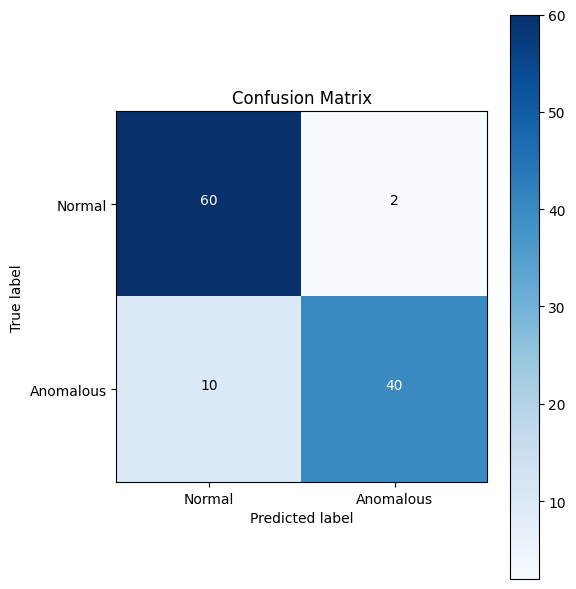

Confusion matrix saved to /content/drive/MyDrive/Thesis/real_model_artifacts/real_confusion_matrix.png


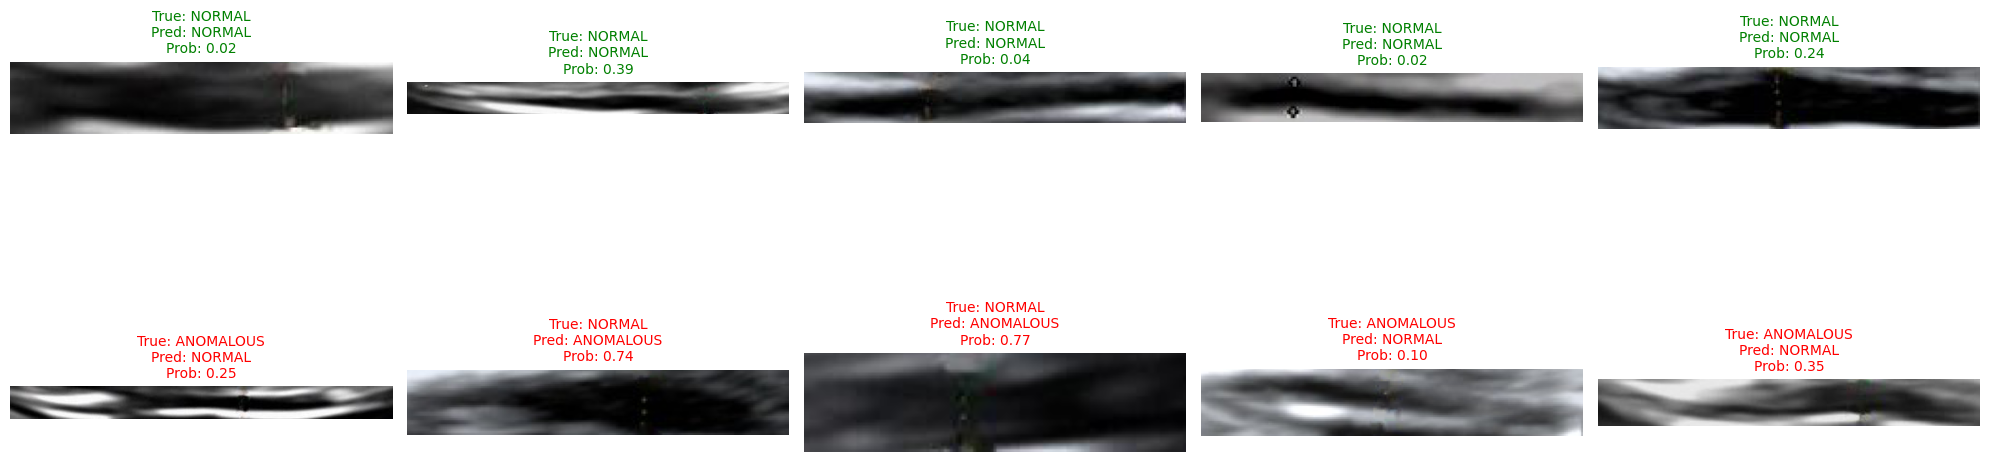

Prediction visualization saved to /content/drive/MyDrive/Thesis/real_model_artifacts/real_sample_predictions.png


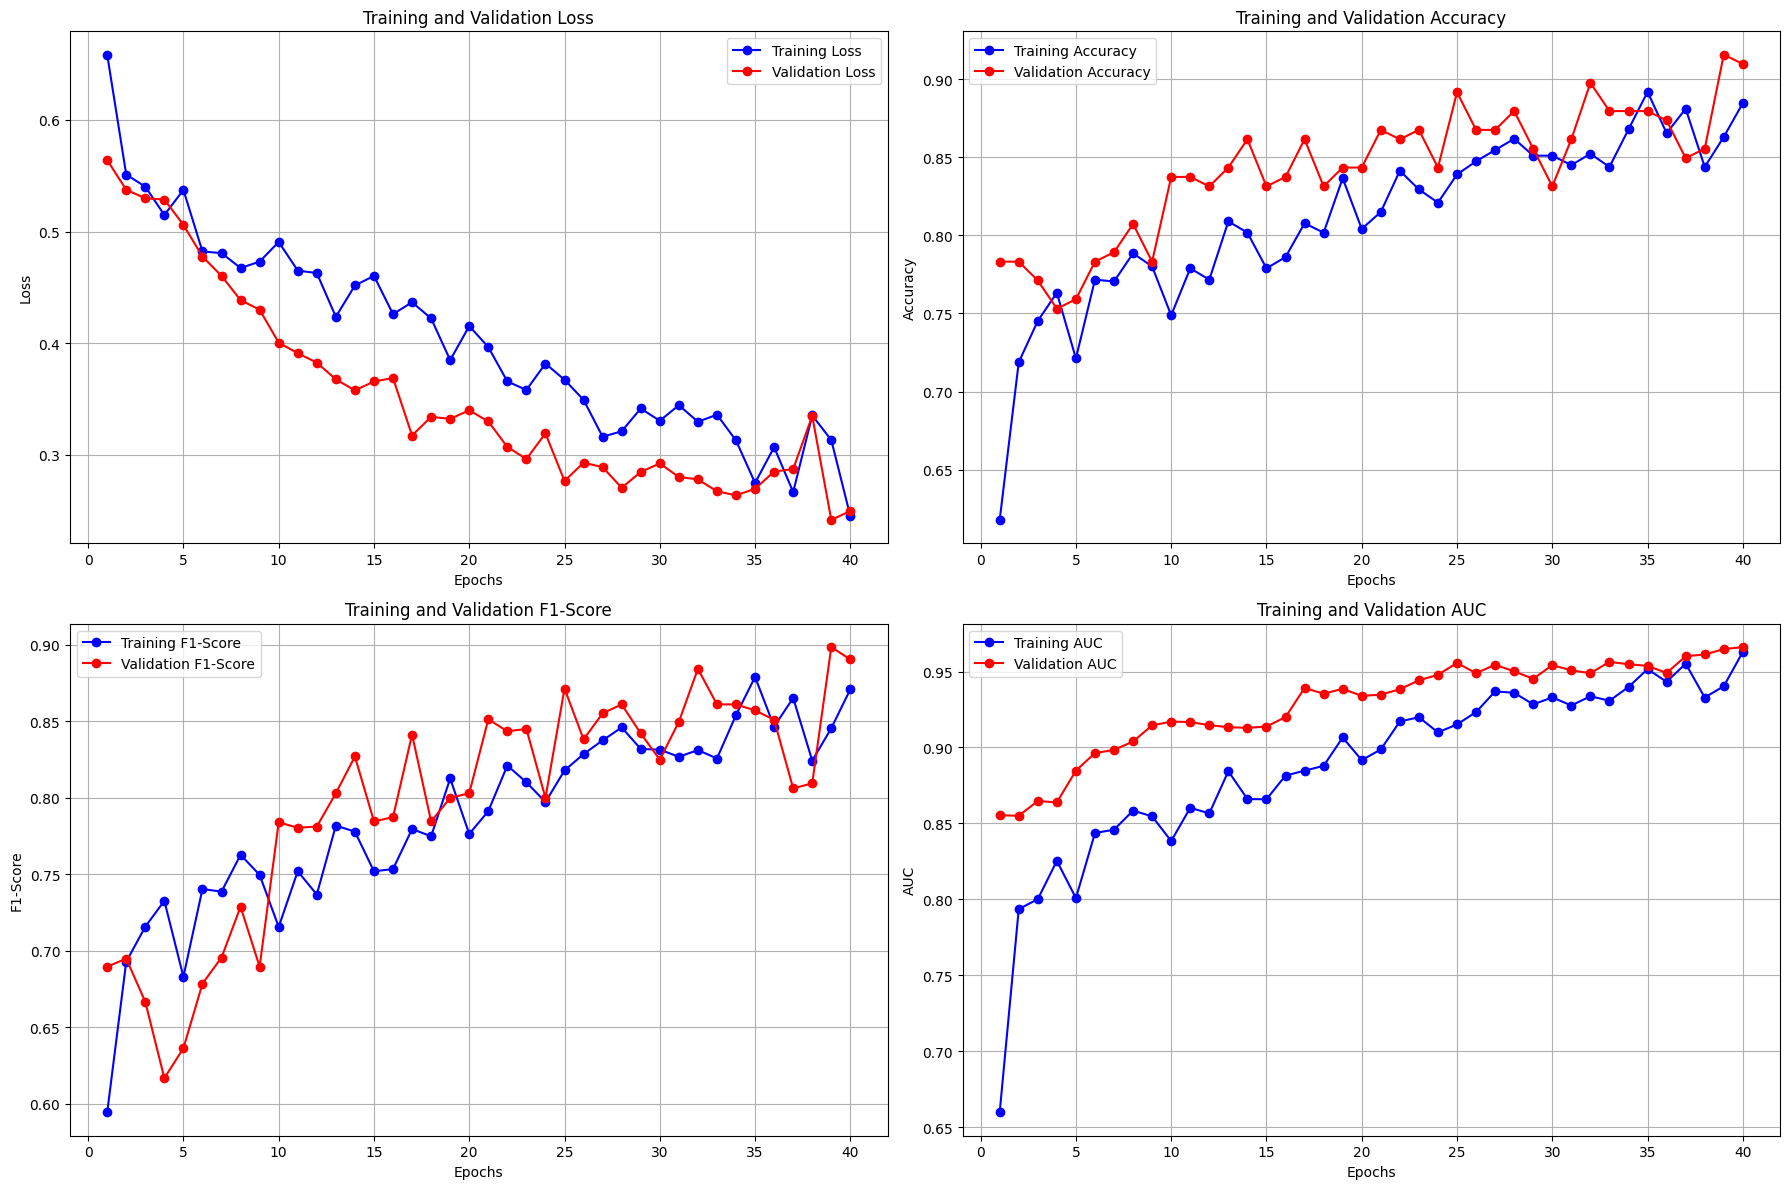

Training history plot saved to /content/drive/MyDrive/Thesis/real_model_artifacts/real_training_history_plot.png


In [81]:
if __name__ == "__main__":
    # Initialize the model, optimizer, and loss function
    model = NTClassifier().to(device)
    # Freeze all layers of the pre-trained base model initially
    for param in model.base.parameters():
        param.requires_grad = False

    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.BCEWithLogitsLoss()

    # Start the training process
    train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=NUM_EPOCHS)

    # Load the best model for evaluation
    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['real_model_state_dict'])
        print("\nBest model loaded successfully for evaluation.")
    except FileNotFoundError:
        print("\nBest model not found. Cannot perform evaluation.")
        exit()

    # Evaluate the model on the test set
    test_results = evaluate_model(model, test_loader, df_test)

    # Visualize the predictions
    visualize_predictions(test_results, num_samples=10)

    # Plot the training history
    plot_training_history(HISTORY_FILE)

In [82]:
# GRAD-CAM
class EfficientNetGradCAM:
    """
    A class to compute and store Grad-CAM heatmaps for an EfficientNet model.
    """
    def __init__(self, model):
        self.model = model
        self.activations = None
        self.gradients = None

        # Register hooks on the last convolutional block of EfficientNet
        self.target_layer = self.model.base._blocks[-1]
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def __call__(self, x):
        self.model.eval()
        self.model.zero_grad()

        # Forward pass to get output and populate activations
        output = self.model(x)

        # Backpropagate the gradient of the logit
        output.backward()

        activations = self.activations.detach()
        gradients = self.gradients.detach()

        # Pool the gradients to get weights
        weights = torch.mean(gradients, dim=[2, 3], keepdim=True)

        # Compute the CAM
        cam = torch.sum(weights * activations, dim=1, keepdim=True)
        cam = torch.relu(cam)

        # Normalize the CAM
        cam = cam - torch.min(cam)
        if torch.max(cam) > 0:
            cam = cam / torch.max(cam)
        else:
            cam = torch.zeros_like(cam)

        return cam.squeeze().cpu().numpy()

In [83]:
def visualize_gradcam(model, test_df, num_samples=5):
    """
    Generates and displays Grad-CAM visualizations for a few test samples.
    """
    gradcam = EfficientNetGradCAM(model)
    samples = test_df.sample(num_samples)

    # Set the model to evaluation mode
    model.eval()

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    if num_samples == 1:
        axes = [axes]

    transform_for_cam = get_test_transform_en()

    for i, (_, row) in enumerate(samples.iterrows()):
        # Load and preprocess the image
        img_path = row['image_path']

        # Read image from file or create a dummy black image if not found
        if not os.path.exists(img_path):
            image = np.zeros((224, 224, 3), dtype=np.uint8)
            cv2.putText(image, "Dummy Image", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        else:
            image = cv2.imread(img_path)
            if image is None:
                image = np.zeros((224, 224, 3), dtype=np.uint8)

        # This is your exact preprocessing pipeline, now correctly implemented
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        original_img_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply the test transform for model input
        input_tensor = transform_for_cam(image=original_img_rgb)['image'].unsqueeze(0).to(device)

        # Get prediction
        with torch.no_grad():
            output = model(input_tensor)
            prob = torch.sigmoid(output).item()
            pred = 1 if prob > 0.5 else 0

        # Get CAM - we need gradients for this part
        input_tensor.requires_grad_(True)
        cam = gradcam(input_tensor)

        # Resize CAM to original image size for overlay
        cam_resized = cv2.resize(cam, (original_img_rgb.shape[1], original_img_rgb.shape[0]))
        heatmap = (cam_resized * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Alpha blend the heatmap and original image
        superimposed_img = cv2.addWeighted(original_img_rgb, 0.6, heatmap, 0.4, 0)

        # Plot the result
        axes[i].imshow(superimposed_img)
        status_map = {0.0: "NORMAL", 1.0: "ANOMALOUS"}
        true_status = status_map.get(row['label'], 'N/A')
        pred_status = status_map.get(pred, 'N/A')

        color = "green" if row['label'] == pred else "red"

        title = (f"True: {true_status} | Pred: {pred_status}\n"
                 f"Prob: {prob:.2f}")
        axes[i].set_title(title, color=color, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    viz_path = os.path.join(SAVE_DIR, 'real_efficientnet_gradcam.png')
    plt.savefig(viz_path, dpi=300)
    plt.show()
    print(f"Grad-CAM visualization saved to {viz_path}")

Loaded pretrained weights for efficientnet-b0
Best model loaded successfully for Grad-CAM visualization.


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


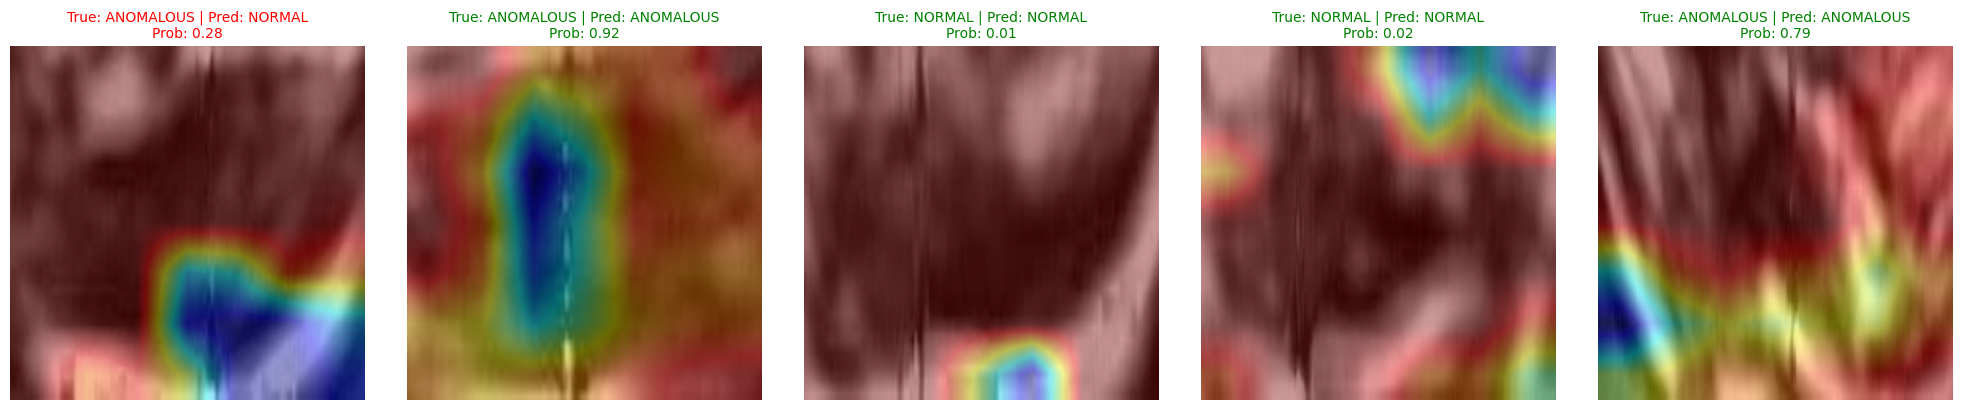

Grad-CAM visualization saved to /content/drive/MyDrive/Thesis/real_model_artifacts/real_efficientnet_gradcam.png


In [84]:
# --- Visualize Grad-CAM ---
if __name__ == "__main__":
    model = NTClassifier().to(device)

    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['real_model_state_dict'])
        print("Best model loaded successfully for Grad-CAM visualization.")
    except FileNotFoundError:
        print("Best model not found. Cannot perform Grad-CAM visualization.")
        exit()

    visualize_gradcam(model, df_test, num_samples=5)

# IMAGE PREPARATION FOR IMAGE GENERATION

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
shenzhen_merged = pd.read_csv('/content/shenzhen_merged (1).csv')
nt_df = shenzhen_merged[shenzhen_merged['structure'] == 'NT'].copy()

# Calculate NT thickness from vertical dimension (h_max - h_min)
nt_df['nt_thickness_px'] = nt_df['h_max'] - nt_df['h_min']
nt_df['nt_thickness_mm'] = nt_df['nt_thickness_px'] * 0.1  # Convert to mm
nt_df['label'] = nt_df['nt_thickness_mm'].apply(lambda x: 1 if x > 3.5 else 0)  # 1=anomalous, 0=normal

In [ ]:
nt_df.head()

fname                                         image_path structure  \
1  1528.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
3  1529.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
5  1530.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
6  1531.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
8  1532.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   

   h_min  w_min  h_max  w_max  nt_thickness_px  nt_thickness_mm  label  
1    390    258    438    630               48              4.8      1  
3    398    244    423    406               25              2.5      0  
5    348    227    372    497               24              2.4      0  
6    382    227    412    529               30              3.0      0  
8    367    225    385    402               18              1.8      0

In [ ]:
nt_gans = nt_df[['image_path', 'label']]

In [ ]:
nt_gans.shape

(1110, 2)

In [ ]:
nt_gans.to_csv('nt_gans.csv')

# IMAGE GENERATION WITH WGAN-GP

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import os
import cv2
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import umap.umap_ as umap
from torchvision import transforms
from torchvision.models import inception_v3, Inception_V3_Weights
from torchvision.utils import save_image

C:\Users\student\ifunanya\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
IMG_SIZE = 64
IMG_CHANNELS = 1
NUM_CLASSES = 2  # 1=anomalous, 0=normal
LATENT_DIM = 100

BATCH_SIZE = 32

MODEL_SAVE_PATH = "C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_MODELS"
IMAGE_SAVE_PATH = "C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_IMAGES"
CSV_PATH = "shenzhen_merged.csv"
CHECKPOINT_PATH = os.path.join(MODEL_SAVE_PATH, "wgan_gp_checkpoint.pt")
LOSS_LOG_PATH = os.path.join(MODEL_SAVE_PATH, "training_loss_log.csv")


# WGAN-GP specific hyperparameters
LAMBDA_GP = 10  # Weight for the gradient penalty term
CRITIC_UPDATES = 5  # Number of times to train the Critic for each Generator update
IMAGE_SAVE_INTERVAL = 50

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# DATASET AND DATA LOADING
class WGANDataset(Dataset):
    """
    Custom PyTorch Dataset for GAN training.
    """
    def __init__(self, df, img_size=IMG_SIZE):
        self.df = df
        self.img_size = img_size
        self.last_original_size = (0, 0)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = str(row['image_path'])
        label = row['label']

        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise FileNotFoundError(f"Image not found at {img_path}")

            H, W = img.shape[:2]

            h_min = int(np.clip(round(row['h_min']), 0, H - 1))
            w_min = int(np.clip(round(row['w_min']), 0, W - 1))
            h_max = int(np.clip(round(row['h_max']), h_min + 1, H))
            w_max = int(np.clip(round(row['w_max']), w_min + 1, W))

            cropped_img = img[h_min:h_max, w_min:w_max]

            if cropped_img.size == 0:
                return torch.zeros((IMG_CHANNELS, self.img_size, self.img_size)), torch.tensor(-1)

            cropped_img = cv2.resize(cropped_img, (self.img_size, self.img_size), interpolation=cv2.INTER_LINEAR)
            img_tensor = torch.tensor(cropped_img, dtype=torch.float32).unsqueeze(0)
            img_tensor = (img_tensor / 127.5) - 1.0

            label_tensor = torch.tensor(label, dtype=torch.long)

            return img_tensor, label_tensor

        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return torch.zeros((IMG_CHANNELS, self.img_size, self.img_size)), torch.tensor(-1)

In [ ]:
def prepare_data(csv_path):
    """Loads and splits the dataset from a CSV file."""
    try:
        shenzhen_merged = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"Error: The CSV file was not found at {csv_path}. Please check the path.")
        return None, None, None

    nt_df = shenzhen_merged[shenzhen_merged['structure'] == 'NT'].copy()
    if nt_df.empty:
        print("Error: No 'NT' data found in the CSV. Cannot process.")
        return None, None, None

    nt_df['nt_thickness_px'] = nt_df['h_max'] - nt_df['h_min']
    nt_df['nt_thickness_mm'] = nt_df['nt_thickness_px'] * 0.1
    nt_df['label'] = nt_df['nt_thickness_mm'].apply(lambda x: 1 if x > 3.5 else 0)
    nt_df = nt_df[nt_df['image_path'].apply(lambda p: os.path.exists(str(p)))].copy()
    nt_df.rename(columns={'image_path': 'image_path'}, inplace=True)
    nt_df['label'] = nt_df['label'].astype(int)

    train_df, temp_df = train_test_split(nt_df, test_size=0.15, random_state=16)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=16)

    train_dataset = WGANDataset(train_df)
    val_dataset = WGANDataset(val_df)
    test_dataset = WGANDataset(test_df)

    return train_dataset, val_dataset, test_dataset

In [ ]:
# GENERATOR
class Generator(nn.Module):
    def __init__(self, latent_dim, num_classes, img_channels=1, img_size=IMG_SIZE):
        super().__init__()
        self.latent_dim = latent_dim
        self.img_channels = img_channels
        self.img_size = img_size
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_dim + num_classes, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, z, labels):
        x = torch.cat([z.view(z.size(0), self.latent_dim, 1, 1),
                       labels.view(labels.size(0), NUM_CLASSES, 1, 1)], dim=1)
        img = self.main(x)
        return img

In [ ]:
# DISCRIMINATOR
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_channels=1, img_size=IMG_SIZE):
        super().__init__()
        self.img_size = img_size
        self.num_classes = num_classes
        self.main = nn.Sequential(
            nn.Conv2d(img_channels + num_classes, 64, 4, 2, 1, bias=False),
            nn.GroupNorm(8, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.GroupNorm(16, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.GroupNorm(32, 256),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * (self.img_size // 8) ** 2, 1)
        )
    def forward(self, img, labels):
        labels_reshaped = labels.view(labels.size(0), self.num_classes, 1, 1)
        labels_tiled = labels_reshaped.repeat(1, 1, self.img_size, self.img_size)
        x = torch.cat([img, labels_tiled], dim=1)
        features = self.main(x)
        # The Discriminator (now a Critic) outputs raw values, not probabilities.
        # So we do not use a Sigmoid activation here.
        output = self.classifier(features)
        return output.view(-1, 1)

In [ ]:
# WGAN-GP
def calculate_gradient_penalty(critic, real_images, fake_images, labels, device):
    """
    Calculates the gradient penalty for WGAN-GP.
    """
    batch_size = real_images.size(0)
    alpha = torch.rand(batch_size, 1, 1, 1, device=device)

    # Linear interpolation between real and fake samples
    interpolates = alpha * real_images + (1 - alpha) * fake_images
    interpolates.requires_grad_(True)

    # Pass interpolated samples through the Critic
    interpolates_labels = labels
    critic_interpolates = critic(interpolates, interpolates_labels)

    # Calculate the gradient of the Critic's output with respect to the interpolated samples
    gradients = torch.autograd.grad(
        outputs=critic_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones(critic_interpolates.size(), device=device),
        create_graph=True,
        retain_graph=True,
    )[0]

    gradients = gradients.view(gradients.size(0), -1)

    # Calculate the L2 norm of the gradients
    gradient_norm = gradients.norm(2, dim=1)

    # Calculate the gradient penalty
    gradient_penalty = ((gradient_norm - 1) ** 2).mean()

    return gradient_penalty

**UTILITY FUNCTIONS**

In [ ]:
def save_checkpoint(generator, discriminator, g_optimizer, d_optimizer, epoch):
    """
    Saves a checkpoint of the model and optimizers.
    """
    if not os.path.exists(MODEL_SAVE_PATH):
        os.makedirs(MODEL_SAVE_PATH)

    torch.save({
        'epoch': epoch,
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'g_optimizer_state_dict': g_optimizer.state_dict(),
        'd_optimizer_state_dict': d_optimizer.state_dict(),
    }, CHECKPOINT_PATH)
    print(f"Checkpoint saved to {CHECKPOINT_PATH}")

def load_checkpoint(generator, discriminator, g_optimizer, d_optimizer):
    """
    Loads a saved checkpoint.
    """
    if os.path.isfile(CHECKPOINT_PATH):
        print(f"Checkpoint found at '{CHECKPOINT_PATH}'! Loading model...")
        checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)
        generator.load_state_dict(checkpoint['generator_state_dict'])
        discriminator.load_state_dict(checkpoint['discriminator_state_dict'])
        g_optimizer.load_state_dict(checkpoint['g_optimizer_state_dict'])
        d_optimizer.load_state_dict(checkpoint['d_optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        print("Model loaded successfully.")
        return start_epoch
    else:
        print("No checkpoint found. Starting from scratch.")
        return 0

def log_training_data(log_path, epoch, avg_d_loss, avg_g_loss):
    """
    Appends training loss data to a CSV file.
    """
    if not os.path.exists(os.path.dirname(log_path)):
        os.makedirs(os.path.dirname(log_path))

    # Write headers only if the file does not exist
    if not os.path.exists(log_path):
        with open(log_path, 'w') as f:
            f.write("Epoch,Critic Loss,Generator Loss\n")

    # Append the new loss data
    with open(log_path, 'a') as f:
        f.write(f"{epoch},{avg_d_loss:.4f},{avg_g_loss:.4f}\n")

def save_generated_images(generator, epoch, latent_vectors, labels, image_save_path):
    """
    Generates a batch of images and saves them to a file.
    """
    generator.eval()
    with torch.no_grad():
        generated_images = generator(latent_vectors, labels).cpu()

    if not os.path.exists(image_save_path):
        os.makedirs(image_save_path)

    save_image(
        generated_images,
        os.path.join(image_save_path, f'epoch_{epoch:04d}_generated.png'),
        nrow=8,
        normalize=True
    )
    generator.train()

In [ ]:
def perform_latent_interpolation(generator, latent_dim, num_classes, num_steps=10, output_dir="interpolation_results"):
    """
    Performs latent space interpolation for each class and saves the results.
    """
    print("Starting Latent Space Interpolation...")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    generator.eval()
    with torch.no_grad():
        for i in range(num_classes):
            print(f"Performing interpolation for class {i}...")

            z1 = torch.randn(1, latent_dim).to(device)
            z2 = torch.randn(1, latent_dim).to(device)

            interpolated_vectors = []
            for alpha in np.linspace(0, 1, num_steps):
                z_interp = z1 * (1 - alpha) + z2 * alpha
                interpolated_vectors.append(z_interp)

            labels = F.one_hot(torch.tensor([i] * num_steps, dtype=torch.long), num_classes).float().to(device)

            interpolated_images = generator(torch.cat(interpolated_vectors, dim=0), labels).cpu()

            save_image(
                interpolated_images,
                os.path.join(output_dir, f"interpolation_class_{i:02d}.png"),
                nrow=num_steps,
                normalize=True
            )
    print("Latent space interpolation complete. Results saved.")

In [ ]:
def extract_features_in_batches(dataloader, feature_extractor, preprocess_transform, device):
    """
    Extracts features from a DataLoader in a memory-efficient way.
    """
    all_features = []
    with torch.no_grad():
        for images, _ in dataloader:
            # Prepare images for InceptionV3: resize and convert to 3 channels
            images_resized = F.interpolate(images, size=(299, 299), mode='bilinear', align_corners=False)
            images_rgb = images_resized.repeat(1, 3, 1, 1)

            # Apply normalization
            preprocessed_images = preprocess_transform(images_rgb)

            # Extract features and move to CPU to free up VRAM
            features = feature_extractor(preprocessed_images.to(device)).cpu().numpy()
            all_features.append(features)

    return np.vstack(all_features)

In [ ]:
def create_tsne_plot(real_features, fake_features, output_path="tsne_plot.png"):
    """
    Creates and saves a UMAP plot for visualizing data distributions.
    """
    print("Creating UMAP plot...")

    all_features = np.vstack((real_features, fake_features))
    labels = np.array(["Real"] * len(real_features) + ["Synthetic"] * len(fake_features))

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    embedding = reducer.fit_transform(all_features)

    plt.figure(figsize=(10, 8))

    plt.scatter(
        embedding[:len(real_features), 0],
        embedding[:len(real_features), 1],
        c='b',
        label='Real Images',
        alpha=0.6,
        s=10
    )

    plt.scatter(
        embedding[len(real_features):, 0],
        embedding[len(real_features):, 1],
        c='r',
        label='Synthetic Images',
        alpha=0.6,
        s=10
    )

    plt.title("UMAP Plot of Image Features", fontsize=16)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)

    output_dir = os.path.dirname(output_path)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    plt.savefig(output_path)
    print(f"UMAP plot saved to {output_path}")

In [ ]:
def train_gan(num_epochs, start_epoch, train_loader, generator, discriminator, g_optimizer, d_optimizer, device,
              latent_dim, num_classes, critic_updates, fixed_noise, fixed_labels):
    """
    Training loop for WGAN-GP.
    """
    print("\nStarting WGAN-GP training...")
    generator.train()
    discriminator.train()

    total_steps = len(train_loader)

    for epoch in range(start_epoch, num_epochs):
        epoch_g_losses = []
        epoch_d_losses = []
        for i, (real_images, labels) in enumerate(train_loader):
            real_images = real_images.to(device)
            labels = F.one_hot(labels, num_classes).float().to(device)

            # Check for invalid data
            if torch.any(labels.sum(dim=1) == 0):
                continue

            # --- Train the Critic ---
            for _ in range(critic_updates):
                discriminator.zero_grad()

                # Generate fake images
                latent_vectors_fake = torch.randn(real_images.size(0), latent_dim, device=device)
                fake_images = generator(latent_vectors_fake, labels).detach()

                # Get scores for real and fake images
                real_scores = discriminator(real_images, labels)
                fake_scores = discriminator(fake_images, labels)

                # Calculate gradient penalty
                gradient_penalty = calculate_gradient_penalty(discriminator, real_images, fake_images, labels, device)

                # WGAN-GP loss
                critic_loss = fake_scores.mean() - real_scores.mean() + LAMBDA_GP * gradient_penalty

                critic_loss.backward()
                d_optimizer.step()

            # --- Train the Generator ---
            generator.zero_grad()

            latent_vectors_gen = torch.randn(real_images.size(0), latent_dim, device=device)
            fake_images_gen = generator(latent_vectors_gen, labels)

            gen_scores = discriminator(fake_images_gen, labels)

            # WGAN-GP Generator loss
            gen_loss = -gen_scores.mean()

            gen_loss.backward()
            g_optimizer.step()

            # --- Logging ---
            epoch_d_losses.append(critic_loss.item())
            epoch_g_losses.append(gen_loss.item())

            if (i + 1) % 10 == 0:
                print(f"Epoch [{epoch}/{num_epochs}], Step [{i+1}/{total_steps}], "
                      f"D Loss: {np.mean(epoch_d_losses):.4f}, G Loss: {np.mean(epoch_g_losses):.4f}")

        # Log the average loss for the entire epoch
        avg_d_loss = np.mean(epoch_d_losses)
        avg_g_loss = np.mean(epoch_g_losses)
        log_training_data(LOSS_LOG_PATH, epoch, avg_d_loss, avg_g_loss)

        save_checkpoint(generator, discriminator, g_optimizer, d_optimizer, epoch)

        # Save generated images at a specified interval
        if (epoch + 1) % IMAGE_SAVE_INTERVAL == 0:
            print("Labels for the generated images (0=normal, 1=anomalous):")
            print(fixed_labels_idx.view(8, 8))
            save_generated_images(generator, epoch, fixed_noise, fixed_labels, IMAGE_SAVE_PATH)


    print("Training complete.")


In [ ]:
# EVALUATION FXN
def evaluate_gan(generator, discriminator, g_optimizer, d_optimizer, test_dataset):
    """
    Performs post-training evaluation steps, including latent interpolation and UMAP plotting.
    """
    print("\nStarting evaluation...")

    # Load the trained model for evaluation
    load_checkpoint(generator, discriminator, g_optimizer, d_optimizer)

    # Perform latent space interpolation first
    interpolation_output_dir = os.path.join(IMAGE_SAVE_PATH, "wgan_gp_interpolation_results")
    perform_latent_interpolation(generator, LATENT_DIM, NUM_CLASSES, output_dir=interpolation_output_dir)

    # Prepare data for UMAP plotting
    print("\nPreparing data for UMAP evaluation...")
    num_samples_to_plot = 1000 # Number of real and fake images to use for the plot

    # Initialize the feature extractor (InceptionV3)
    feature_extractor = inception_v3(weights=Inception_V3_Weights.DEFAULT)
    feature_extractor.fc = nn.Identity() # Remove the final classification layer
    feature_extractor.to(device).eval()

    # Preprocessing transform for InceptionV3
    preprocess_transform = transforms.Compose([
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Extract features from real images
    print("Extracting features from real images...")
    real_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
    real_features = extract_features_in_batches(real_dataloader, feature_extractor, preprocess_transform, device)[:num_samples_to_plot]

    # Generate fake images in batches and extract features
    print("Generating fake images and extracting features in batches...")

    fake_features = []
    with torch.no_grad():
        generator.eval()
        for i in range(0, num_samples_to_plot, BATCH_SIZE):
            current_batch_size = min(BATCH_SIZE, num_samples_to_plot - i)

            latent_vectors_fake = torch.randn(current_batch_size, LATENT_DIM, device=device)
            fake_labels_idx = torch.randint(0, NUM_CLASSES, (current_batch_size,), device=device, dtype=torch.long)
            fake_labels_onehot = F.one_hot(fake_labels_idx, NUM_CLASSES).float().to(device)

            fake_images_for_eval = generator(latent_vectors_fake, fake_labels_onehot)

            images_resized = F.interpolate(fake_images_for_eval, size=(299, 299), mode='bilinear', align_corners=False)
            images_rgb = images_resized.repeat(1, 3, 1, 1)
            preprocessed_images = preprocess_transform(images_rgb)

            features = feature_extractor(preprocessed_images).cpu().numpy()
            fake_features.append(features)

            torch.cuda.empty_cache()

    fake_features = np.vstack(fake_features)

    # Create the UMAP plot
    create_tsne_plot(real_features, fake_features, output_path=os.path.join(IMAGE_SAVE_PATH, "wgan_gp_umap_plot.png"))

    print("\nQualitative evaluation complete. Check your designated folders for the output images.")

In [ ]:
if __name__ == "__main__":
    # Initialize models and optimizers
    netG = Generator(LATENT_DIM, NUM_CLASSES, img_channels=IMG_CHANNELS).to(device)
    netD = Discriminator(NUM_CLASSES, img_channels=IMG_CHANNELS).to(device)

    g_optimizer = torch.optim.Adam(netG.parameters(), lr=1e-4, betas=(0.5, 0.999))
    d_optimizer = torch.optim.Adam(netD.parameters(), lr=1e-4, betas=(0.5, 0.999))

    # --- IMPORTANT: Load checkpoint to resume training or start from scratch ---
    start_epoch = load_checkpoint(netG, netD, g_optimizer, d_optimizer)

    # Prepare data
    print("\nPreparing data...")
    train_dataset, val_dataset, test_dataset = prepare_data(CSV_PATH)
    if train_dataset is None or test_dataset is None:
        exit()

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Generate fixed noise and labels for consistent image saving
    fixed_noise = torch.randn(64, LATENT_DIM, device=device)
    fixed_labels_idx = torch.randint(0, NUM_CLASSES, (64,), device=device, dtype=torch.long)
    fixed_labels = F.one_hot(fixed_labels_idx, NUM_CLASSES).float().to(device)

    # --- MAIN TRAINING LOOP ---
    train_gan(1501, start_epoch, train_loader, netG, netD, g_optimizer, d_optimizer, device,
              LATENT_DIM, NUM_CLASSES, CRITIC_UPDATES, fixed_noise, fixed_labels)

Checkpoint found at 'C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_MODELS\wgan_gp_checkpoint.pt'! Loading model...


C:\Users\student\AppData\Local\Temp\ipykernel_11616\361952900.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(CHECKPOINT_PATH, map_location=devi

Model loaded successfully.

Preparing data...

Starting WGAN-GP training...


C:\Users\student\ifunanya\lib\site-packages\torch\autograd\graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1499/1500], Step [10/30], D Loss: -11.6770, G Loss: 45.8247
Epoch [1499/1500], Step [20/30], D Loss: -11.0999, G Loss: 45.2359
Epoch [1499/1500], Step [30/30], D Loss: -10.9490, G Loss: 45.3631
Checkpoint saved to C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_MODELS\wgan_gp_checkpoint.pt
Labels for the generated images (0=normal, 1=anomalous):
tensor([[1, 1, 0, 1, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 1]], device='cuda:0')
Training complete.



Starting evaluation...
Checkpoint found at 'C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_MODELS\wgan_gp_checkpoint.pt'! Loading model...


C:\Users\student\AppData\Local\Temp\ipykernel_11616\361952900.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(CHECKPOINT_PATH, map_location=devi

Model loaded successfully.
Starting Latent Space Interpolation...
Performing interpolation for class 0...
Performing interpolation for class 1...
Latent space interpolation complete. Results saved.

Preparing data for UMAP evaluation...
Extracting features from real images...
Generating fake images and extracting features in batches...
Creating UMAP plot...


C:\Users\student\ifunanya\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP plot saved to C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_IMAGES\wgan_gp_umap_plot.png

Qualitative evaluation complete. Check your designated folders for the output images.


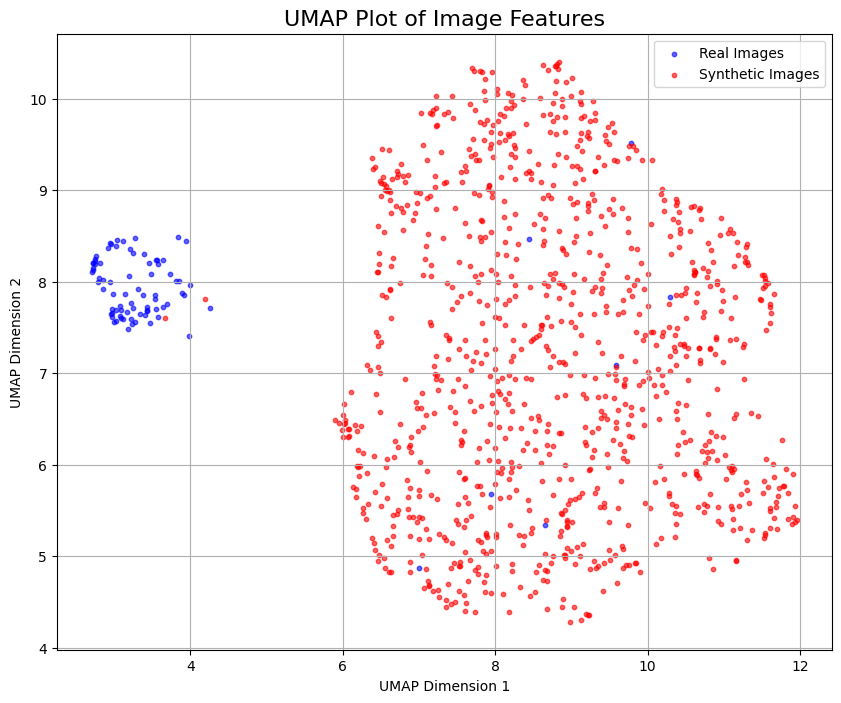

In [ ]:
if __name__ == "__main__":
    evaluate_gan(netG, netD, g_optimizer, d_optimizer, test_dataset)

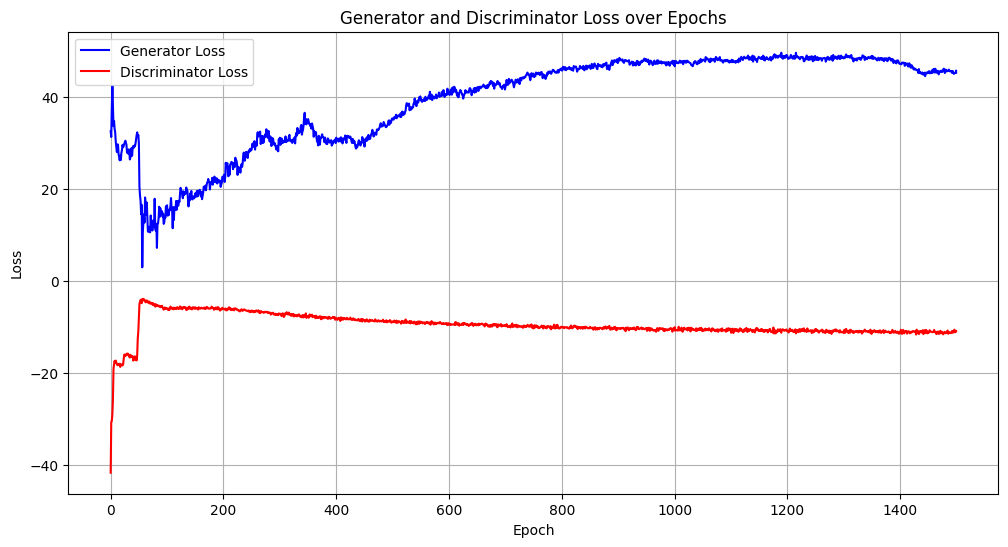

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

LOSS_LOG_PATH = os.path.join(MODEL_SAVE_PATH, "training_loss_log.csv")

def plot_losses_from_history(history_path):
    """
    Plots the generator and discriminator losses from a CSV history file.

    Args:
        history_path (str): The path to the JSON file containing the training history.
    """
    history = []
     # Read CSV file as list of dictionaries
    with open(history_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Convert values to appropriate types (e.g., float or int)
            history.append({
                'Epoch': int(row['Epoch']),
                'Generator Loss': float(row['Generator Loss']),
                'Critic Loss': float(row['Critic Loss'])
            })

    # Extract losses and epochs from the list of dictionaries
    epochs = [entry['Epoch'] for entry in history]
    g_losses = [entry['Generator Loss'] for entry in history]
    d_losses = [entry['Critic Loss'] for entry in history]

    if not g_losses or not d_losses:
        print("Error: The history file is empty or formatted incorrectly.")
        return

    # Plotting the losses
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, g_losses, label='Generator Loss', color='blue')
    plt.plot(epochs, d_losses, label='Discriminator Loss', color='red')

    plt.title('Generator and Discriminator Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig('Generator vs Discriminator Loss WGAN-GP.jpg', dpi=300)
    plt.show()

if __name__ == "__main__":
    # Define the path to your history file
    MODEL_SAVE_PATH = "C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGANS_MODELS"
    LOSS_LOG_PATH = os.path.join(MODEL_SAVE_PATH, "training_loss_log.csv")

    # Call the function to plot the losses
    plot_losses_from_history(LOSS_LOG_PATH)

**IMAGE GENERATION**

In [ ]:
def generate_images_for_classification(generator, num_normal, num_anomalous,
                                       latent_dim, num_classes, device, output_dir="generated_dataset"):
    """
    Generates a specified number of normal and anomalous images for a classification dataset.
    Images are saved individually in a class-specific directory structure.
    """
    generator.eval()

    classes = {0: 'normal', 1: 'anomalous'}
    class_counts = {0: num_normal, 1: num_anomalous}

    print(f"\nGenerating {num_normal} normal and {num_anomalous} anomalous images for classification...")

    # Create output directories if they don't exist
    for class_id, class_name in classes.items():
        class_path = os.path.join(output_dir, class_name)
        if not os.path.exists(class_path):
            os.makedirs(class_path)

    with torch.no_grad():
        for class_id, class_name in classes.items():
            count = 0
            num_to_generate = class_counts[class_id]

            while count < num_to_generate:
                current_batch_size = min(BATCH_SIZE, num_to_generate - count)

                # Generate random noise and specific labels for the current batch
                latent_vectors = torch.randn(current_batch_size, latent_dim, device=device)
                labels = torch.full((current_batch_size, ), class_id, dtype=torch.long, device=device)
                labels_onehot = F.one_hot(labels, num_classes).float().to(device)

                # Generate images
                generated_images = generator(latent_vectors, labels_onehot)

                # Save each image individually
                for i in range(current_batch_size):
                    img = generated_images[i].cpu()
                    file_path = os.path.join(output_dir, class_name, f"synthetic_{class_name}_{count + i:04d}.png")
                    save_image(img, file_path, normalize=True)

                count += current_batch_size
                print(f"Generated {count}/{num_to_generate} images for class '{class_name}'.")

    print(f"\nImage generation for classification complete. Images saved to the '{output_dir}' directory.")
    generator.train()

In [ ]:
# --- GENERATE IMAGES FOR CLASSIFICATION DATASET ---
    # Calculate the number of images to generate for each class to match the original ratio
if __name__ == "__main__":
    original_total = 614 + 496
    num_normal_to_generate = int(round((614 / original_total) * 1110))
    num_anomalous_to_generate = int(round((496 / original_total) * 1110))

    # Generate the images for your new dataset
    generate_images_for_classification(
        generator=netG,
        num_normal=num_normal_to_generate,
        num_anomalous=num_anomalous_to_generate,
        latent_dim=LATENT_DIM,
        num_classes=NUM_CLASSES,
        device=device,
        output_dir="C:/Users/student/OneDrive - Atlantic TU/Thesis_models/WGAN_generated_classification_dataset"
    )



Generating 614 normal and 496 anomalous images for classification...
Generated 32/614 images for class 'normal'.
Generated 64/614 images for class 'normal'.
Generated 96/614 images for class 'normal'.
Generated 128/614 images for class 'normal'.
Generated 160/614 images for class 'normal'.
Generated 192/614 images for class 'normal'.
Generated 224/614 images for class 'normal'.
Generated 256/614 images for class 'normal'.
Generated 288/614 images for class 'normal'.
Generated 320/614 images for class 'normal'.
Generated 352/614 images for class 'normal'.
Generated 384/614 images for class 'normal'.
Generated 416/614 images for class 'normal'.
Generated 448/614 images for class 'normal'.
Generated 480/614 images for class 'normal'.
Generated 512/614 images for class 'normal'.
Generated 544/614 images for class 'normal'.
Generated 576/614 images for class 'normal'.
Generated 608/614 images for class 'normal'.
Generated 614/614 images for class 'normal'.
Generated 32/496 images for class

**DATA PREPARATION FOR IMAGE CLASSIFICATION**

In [2]:
import pandas as pd
import os

# This should match the output directory from the previous script.
GENERATED_DATASET_PATH = "/content/drive/MyDrive/Thesis/Thesis Datasets/WGAN_generated_classification_dataset"

# The name of the CSV file to save the DataFrame to.
OUTPUT_CSV_PATH = "/content/drive/MyDrive/Thesis/Thesis Datasets/WGAN_generated_classification_dataset/synthetic_df.csv"

def create_dataset_dataframe(root_dir):
    """
    Traverses a directory, collects image file paths and labels, and
    stores them in a pandas DataFrame.
    """
    print(f"Scanning directory: {root_dir}...")

    file_paths = []
    labels = []

    # Define class labels based on folder names
    class_mapping = {'normal': 0, 'anomalous': 1}

    # Walk through the root directory and its subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        # Determine the label based on the current subdirectory name
        # We only care about the last part of the path (the folder name)
        current_folder = os.path.basename(dirpath)

        # Check if the folder name is in our class mapping
        if current_folder in class_mapping:
            label = class_mapping[current_folder]

            # Add file path and label for each image found
            for filename in filenames:
                # Ensure we only process image files (png, jpg, jpeg, etc.)
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    full_path = os.path.join(dirpath, filename)
                    file_paths.append(full_path)
                    labels.append(label)

    # Create the pandas DataFrame
    dataset_df = pd.DataFrame({
        'image_path': file_paths,
        'label': labels
    })

    return dataset_df

if __name__ == "__main__":
    # Create the DataFrame
    synthetic_df = create_dataset_dataframe(GENERATED_DATASET_PATH)

    # Shuffle the DataFrame to mix up the classes
    synthetic_df = synthetic_df.sample(frac=1, random_state=16).reset_index(drop=True)

    # Print the head to confirm it looks correct
    print("\nDataFrame created successfully. First 5 rows:")
    print(synthetic_df.head())
    synthetic_df.to_csv('synthetic_df.csv', index = False)


Scanning directory: /content/drive/MyDrive/Thesis/Thesis Datasets/WGAN_generated_classification_dataset...

DataFrame created successfully. First 5 rows:
                                          image_path  label
0  /content/drive/MyDrive/Thesis/Thesis Datasets/...      0
1  /content/drive/MyDrive/Thesis/Thesis Datasets/...      1
2  /content/drive/MyDrive/Thesis/Thesis Datasets/...      0
3  /content/drive/MyDrive/Thesis/Thesis Datasets/...      0
4  /content/drive/MyDrive/Thesis/Thesis Datasets/...      1


In [3]:
synthetic_df.shape

(1110, 2)

**INTEGRITY CHECKS**

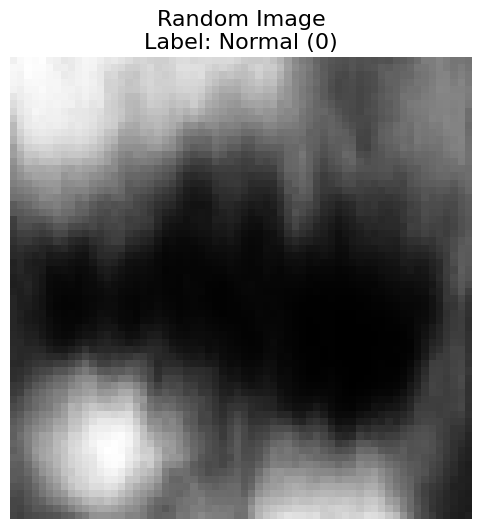

Successfully displayed image from: /content/drive/MyDrive/Thesis/Thesis Datasets/WGAN_generated_classification_dataset/normal/synthetic_normal_0118.png
Image has label: Normal (0)


In [4]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

SYNTHETIC_CSV_PATH = "/content/synthetic_df.csv"

def display_random_image_from_csv(csv_path):
    """
    Loads a DataFrame from a CSV, selects a random image path, and displays
    the image with its corresponding label.

    Args:
        csv_path (str): The path to the CSV file containing image metadata.
    """
    try:
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_path)

        if df.empty:
            print("Error: The DataFrame is empty. Please check the CSV file.")
            return

        # Select a single random row from the DataFrame
        random_row = df.sample(n=1).iloc[0]

        # Extract the image path and label from the selected row
        image_path = random_row['image_path']
        label = random_row['label']

        # Define a mapping for a more descriptive label
        label_mapping = {0: 'Normal', 1: 'Anomalous'}
        display_label = label_mapping.get(label, 'Unknown')

        # Check if the image file exists before trying to load it
        if not os.path.exists(image_path):
            print(f"Error: Image file not found at path: {image_path}")
            return

        # Load the image using OpenCV (cv2)
        # We use cv2.IMREAD_UNCHANGED to handle single-channel images correctly
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        if image is None:
            print(f"Error: Could not read image from path: {image_path}")
            return

        # Use matplotlib to display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        plt.title(f"Random Image\nLabel: {display_label} ({label})", fontsize=16)
        plt.axis('off')  # Hide the axes
        plt.show()

        print(f"Successfully displayed image from: {image_path}")
        print(f"Image has label: {display_label} ({label})")

    except FileNotFoundError:
        print(f"Error: The CSV file was not found at {csv_path}. Please check the path.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    display_random_image_from_csv(SYNTHETIC_CSV_PATH)


# IMAGE CLASSIFICATION OF SYNTHETIC DATA WITH EFFICIENTNET-B0

In [2]:
!pip install efficientnet_pytorch
!pip install albumentations==1.0.3
!pip install torchvision==0.10.0
!pip install pydantic>=1.10.0, <=2.0.0

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=58e02c2341664e4856920b6bb1ad8a708f3542b0610f8a7c917e49a3d3733f55
  Stored in directory: /root/.cache/pip/wheels/9c/3f/43/e6271c7026fe08c185da2be23c98c8e87477d3db63f41f32ad
Successfully built efficientnet_pytorch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.8
    Uninstalling albumentations-2.0.8:
      Successfully uninstalled albumentations-2.0.8
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3
ERROR: Could not find a version that satisfies the requirement torchvision==0.10.0 (from versions: 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0, 0.22.1, 0.23.0)
ERROR: No matching distribution found for torchv

In [8]:
import pandas as pd
import os
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from efficientnet_pytorch import EfficientNet
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [7]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
# Define model and training parameters
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
SAVE_DIR = "/content/drive/MyDrive/Thesis/synthetic_model_artifacts2"
os.makedirs(SAVE_DIR, exist_ok=True)
HISTORY_FILE = os.path.join(SAVE_DIR, 'syn_training_history.json')
MODEL_PATH = os.path.join(SAVE_DIR, 'syn_best_model_enet.pth')

In [4]:
df = pd.read_csv("/content/synthetic_df.csv")
type(df)

pandas.core.frame.DataFrame

In [5]:
# Split into train and temp
df_train, df_temp = train_test_split(df, test_size=0.25, stratify=df['label'], random_state=16)

# Split temp into validation and test
df_val, df_test = train_test_split(df_temp, test_size=0.4, stratify=df_temp['label'], random_state=16)

In [6]:
def apply_clahe(image, clipLimit=2.0, tileGridSize=(8, 8)):
    """Applies Contrast Limited Adaptive Histogram Equalization (CLAHE)."""
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(image)

In [7]:
def get_train_transform_en():
    """Defines a robust set of augmentations for training."""
    return A.Compose([
        A.RandomResizedCrop(height=224, width=224, scale=(0.7, 1.0), ratio=(0.8, 1.2), p=0.5),
        A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.8),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.ShiftScaleRotate(
            shift_limit=0.1,
            scale_limit=0.2,
            rotate_limit=12,
            border_mode=cv2.BORDER_CONSTANT,
            value=0,
            p=0.8
        ),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05, p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), p=0.3),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.2),
        A.CoarseDropout(max_holes=8, max_height=16, max_width=16, fill_value=0, p=0.3),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_val_transform_en():
    """Defines transformations for validation and test sets."""
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_test_transform_en():
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

In [8]:
class SYNDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['image_path']

        # Read image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {img_path}")

        # Resize, CLAHE, and convert to RGB
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        clahe_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply augmentation and normalization
        if self.transform:
            augmented = self.transform(image=clahe_rgb)
            image_tensor = augmented['image']
        else:
            image_tensor = torch.tensor(clahe_rgb).permute(2, 0, 1).float() / 255.0

        label = torch.tensor(row['label'], dtype=torch.float32)
        return image_tensor, label

In [9]:
train_dataset = SYNDataset(df_train, transform=get_train_transform_en())
val_dataset = SYNDataset(df_val, transform=get_val_transform_en())
test_dataset = SYNDataset(df_test, transform=get_test_transform_en())


train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
    )

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

    # Dataset statistics
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")
print(f"Normal samples: {sum(df['label'] == 0)}")
print(f"Anomalous samples: {sum(df['label'] == 1)}")
print(f"Anomaly ratio: {sum(df['label'] == 1)/len(df):.2f}")

Total samples: 1110
Training samples: 832
Validation samples: 166
Testing samples: 112
Normal samples: 614
Anomalous samples: 496
Anomaly ratio: 0.45


Displaying a sample image from the DataLoader...


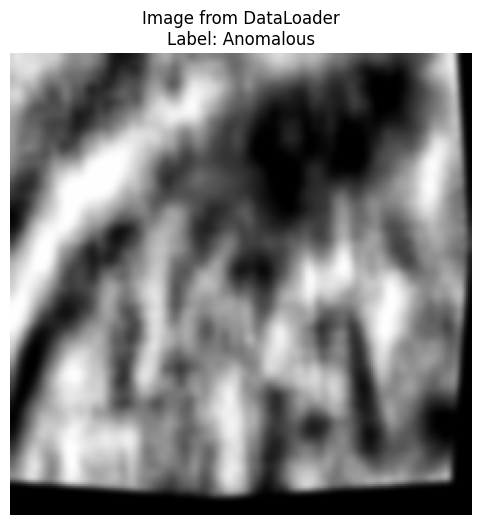


Image displayed successfully!


In [12]:
print("Displaying a sample image from the DataLoader...")
# Get a single batch of data from the DataLoader
images, labels = next(iter(train_loader))

# Select the first image and label from the batch
image_tensor = images[0]
label_tensor = labels[0]

# Un-normalize the image tensor for proper visualization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_np = image_tensor.permute(1, 2, 0).numpy()
image_np = std * image_np + mean
image_np = np.clip(image_np, 0, 1)

# Map the label to a descriptive string
label_map = {0.0: 'Normal', 1.0: 'Anomalous'}
label_str = label_map.get(label_tensor.item(), 'Unknown')

# Display the image and label
plt.figure(figsize=(6, 6))
plt.imshow(image_np)
plt.title(f"Image from DataLoader\nLabel: {label_str}")
plt.axis('off')
plt.show()

print("\nImage displayed successfully!")

In [13]:
class SYNClassifier(nn.Module):
    def __init__(self):
        super(SYNClassifier, self).__init__()
        self.base = EfficientNet.from_pretrained('efficientnet-b0')
        # Freeze all parameters in the base model
        for param in self.base.parameters():
            param.requires_grad = False

        # Replace the final fully connected layer with an identity module
        num_features = self.base._fc.in_features
        self.base._fc = nn.Identity()

        # Custom classifier on top of the base model
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        features = self.base(x)
        return self.classifier(features)

In [14]:
# TRAINING HELPER FUNCTIONS
def unfreeze_layers(model, epoch):
    """Gradually unfreezes layers of the EfficientNet model for fine-tuning."""
    if epoch == 3:
        # Unfreeze classifier layers
        for param in model.classifier.parameters():
            param.requires_grad = True
        print("Unfroze classifier layers")

    elif epoch == 8:
        # Unfreeze top 3 blocks of the base model
        for name, param in model.base.named_parameters():
            if 'blocks.5' in name or 'blocks.6' in name or 'blocks.7' in name:
                param.requires_grad = True
        print("Unfroze top 3 blocks")

    elif epoch == 15:
        # Unfreeze all layers of the model
        for param in model.parameters():
            param.requires_grad = True
        print("Unfroze all layers")

In [15]:
# MAIN TRAINING FUNCTIONS
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs):
    """
    Main training loop for the model.
    Saves the best model based on validation loss and training history,
    computes and stores AUC and F1-score for each epoch.
    """
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": [],
        "train_f1": [],
        "val_f1": [],
        "train_auc": [],
        "val_auc": [],
    }
    best_val_loss = float('inf')

    for epoch in range(1, num_epochs + 1):
        unfreeze_layers(model, epoch)
        print(f"Epoch {epoch}/{num_epochs}")

        # --- Training phase ---
        model.train()
        train_loss = 0.0
        train_preds = []
        train_labels = []
        train_probs = []
        total_train = 0

        for images, labels in tqdm(train_loader, desc="Training"):
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            train_preds.extend(preds.detach().cpu().numpy().flatten())
            train_labels.extend(labels.detach().cpu().numpy().flatten())
            train_probs.extend(probs.detach().cpu().numpy().flatten())
            total_train += labels.size(0)

        avg_train_loss = train_loss / total_train
        train_accuracy = accuracy_score(train_labels, train_preds)
        train_f1 = f1_score(train_labels, train_preds)
        train_auc = roc_auc_score(train_labels, train_probs)

        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_accuracy)
        history['train_f1'].append(train_f1)
        history['train_auc'].append(train_auc)

        # --- Validation phase ---
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []
        val_probs = []
        total_val = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc="Validation"):
                images, labels = images.to(device), labels.float().unsqueeze(1).to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)

                probs = torch.sigmoid(outputs)
                preds = (probs > 0.5).float()

                val_preds.extend(preds.detach().cpu().numpy().flatten())
                val_labels.extend(labels.detach().cpu().numpy().flatten())
                val_probs.extend(probs.detach().cpu().numpy().flatten())
                total_val += labels.size(0)

        avg_val_loss = val_loss / total_val
        val_accuracy = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)
        val_auc = roc_auc_score(val_labels, val_probs)

        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(val_accuracy)
        history['val_f1'].append(val_f1)
        history['val_auc'].append(val_auc)

        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1: {train_f1:.4f}, Train AUC: {train_auc:.4f}")
        print(f"Validation Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Val AUC: {val_auc:.4f}")

        # Save the best model based on validation loss
        if avg_val_loss < best_val_loss:
            print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model...")
            best_val_loss = avg_val_loss
            torch.save({
                'epoch': epoch,
                'syn_model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': best_val_loss
            }, MODEL_PATH)

    # Save training history to a JSON file
    with open(HISTORY_FILE, 'w') as f:
        json.dump(history, f)
    print("Training history saved.")

In [16]:
# VISUALIZATION FUNCTION
def plot_training_history(history_file):
    """Plots the training and validation loss, accuracy, F1-score, and AUC from a JSON file."""
    if not os.path.exists(history_file) or os.path.getsize(history_file) == 0:
        print(f"Error: The history file '{history_file}' does not exist or is empty.")
        return

    try:
        with open(history_file, 'r') as f:
            history = json.load(f)
    except json.JSONDecodeError:
        print(f"Error: The file '{history_file}' is not a valid JSON file. It might be corrupted.")
        return

    required_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1', 'train_auc', 'val_auc']
    if not all(key in history for key in required_keys):
        print("The history file is missing required data keys.")
        return

    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 12))

    # Plot Loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-o', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-o', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], 'r-o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot F1-Score
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['train_f1'], 'b-o', label='Training F1-Score')
    plt.plot(epochs, history['val_f1'], 'r-o', label='Validation F1-Score')
    plt.title('Training and Validation F1-Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid(True)

    # Plot AUC
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['train_auc'], 'b-o', label='Training AUC')
    plt.plot(epochs, history['val_auc'], 'r-o', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plot_path = os.path.join(SAVE_DIR, 'syn_training_history_plot.png')
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"Training history plot saved to {plot_path}")

In [17]:
# VISUALIZATION OF PREDICTIONS BY THE MODEL
def visualize_predictions(results, num_samples=10):
    """
    Visualizes a selection of correct and incorrect predictions.
    """
    correct = [r for r in results if r['true_label'] == r['pred_label']]
    incorrect = [r for r in results if r['true_label'] != r['pred_label']]

    samples = (correct[:num_samples//2] if len(correct) >= num_samples//2 else correct) + \
              (incorrect[:num_samples//2] if len(incorrect) >= num_samples//2 else incorrect)

    if not samples:
        print("No samples to visualize.")
        return

    num_cols = 5
    num_rows = (len(samples) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

    # Flatten the axes array for easier iteration
    if num_rows == 1:
        axes = [axes] if len(samples) <= 5 else axes
    else:
        axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i >= len(samples):
            ax.axis('off')
            continue

        res = samples[i]

        # Load and preprocess the image
        img_path = res['image_path']
        if not os.path.exists(img_path):
            img = np.zeros((224, 224, 3), dtype=np.uint8)
            cv2.putText(img, "Dummy Image", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        else:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                img = np.zeros((224, 224, 3), dtype=np.uint8)

        # Add text info
        status_map = {0.0: "NORMAL", 1.0: "ANOMALOUS"}
        true_status = status_map.get(res['true_label'], 'N/A')
        pred_status = status_map.get(res['pred_label'], 'N/A')

        color = "green" if res['true_label'] == res['pred_label'] else "red"

        ax.imshow(img)
        title = (f"True: {true_status}\nPred: {pred_status}\n"
                 f"Prob: {res['probability']:.2f}")
        ax.set_title(title, color=color, fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    viz_path = os.path.join(SAVE_DIR, 'syn_sample_predictions.png')
    plt.savefig(viz_path, dpi=300)
    plt.show()
    print(f"Prediction visualization saved to {viz_path}")

In [18]:
# EVALUATION FUNCTION
def evaluate_model(model, test_loader, df_test):
    """
    Evaluates the final model on the test set and returns results for visualization.
    """
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []
    all_probs = []

    print("Evaluating model on test set...")
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluation"):
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())
            all_probs.extend(probs.cpu().numpy().flatten())

    # Calculate and print metrics
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)

    print("================== Evaluation Metrics ==================")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("======================================================")

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Normal', 'Anomalous'])
    plt.yticks([0, 1], ['Normal', 'Anomalous'])

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    cm_path = os.path.join(SAVE_DIR, 'efficientnet_confusion_matrix.png')
    plt.savefig(cm_path, dpi=300)
    plt.show()
    print(f"Confusion matrix saved to {cm_path}")

    # Prepare results for visualization
    test_results = []
    for i in range(len(all_labels)):
        test_results.append({
            'image_path': df_test.iloc[i]['image_path'],
            'true_label': all_labels[i],
            'pred_label': all_preds[i],
            'probability': all_probs[i]
        })
    return test_results

Loaded pretrained weights for efficientnet-b0
Epoch 1/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.35it/s]


Train Loss: 0.7128, Train Acc: 0.5625, Train F1: 0.5285, Train AUC: 0.5837
Validation Loss: 0.6614, Val Acc: 0.5904, Val F1: 0.6634, Val AUC: 0.7284
Validation loss improved from inf to 0.6614. Saving model...
Epoch 2/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.35it/s]


Train Loss: 0.6168, Train Acc: 0.6875, Train F1: 0.6597, Train AUC: 0.7230
Validation Loss: 0.5975, Val Acc: 0.6807, Val F1: 0.6015, Val AUC: 0.7703
Validation loss improved from 0.6614 to 0.5975. Saving model...
Unfroze classifier layers
Epoch 3/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.01it/s]


Train Loss: 0.6014, Train Acc: 0.6971, Train F1: 0.6595, Train AUC: 0.7387
Validation Loss: 0.5857, Val Acc: 0.7169, Val F1: 0.6667, Val AUC: 0.7964
Validation loss improved from 0.5975 to 0.5857. Saving model...
Epoch 4/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.37it/s]


Train Loss: 0.5643, Train Acc: 0.7151, Train F1: 0.6793, Train AUC: 0.7757
Validation Loss: 0.5345, Val Acc: 0.7831, Val F1: 0.7353, Val AUC: 0.8547
Validation loss improved from 0.5857 to 0.5345. Saving model...
Epoch 5/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.98it/s]


Train Loss: 0.5603, Train Acc: 0.7212, Train F1: 0.6848, Train AUC: 0.7814
Validation Loss: 0.4940, Val Acc: 0.8193, Val F1: 0.7619, Val AUC: 0.8845
Validation loss improved from 0.5345 to 0.4940. Saving model...
Epoch 6/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  4.53it/s]


Train Loss: 0.5469, Train Acc: 0.7236, Train F1: 0.6858, Train AUC: 0.7939
Validation Loss: 0.4734, Val Acc: 0.8072, Val F1: 0.7419, Val AUC: 0.8984
Validation loss improved from 0.4940 to 0.4734. Saving model...
Epoch 7/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.93it/s]


Train Loss: 0.5624, Train Acc: 0.7188, Train F1: 0.6812, Train AUC: 0.7823
Validation Loss: 0.4697, Val Acc: 0.7952, Val F1: 0.7167, Val AUC: 0.8981
Validation loss improved from 0.4734 to 0.4697. Saving model...
Unfroze top 3 blocks
Epoch 8/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  4.98it/s]


Train Loss: 0.5191, Train Acc: 0.7560, Train F1: 0.7208, Train AUC: 0.8210
Validation Loss: 0.4709, Val Acc: 0.7771, Val F1: 0.6838, Val AUC: 0.8934
Epoch 9/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  4.26it/s]


Train Loss: 0.5557, Train Acc: 0.7151, Train F1: 0.6827, Train AUC: 0.7923
Validation Loss: 0.4872, Val Acc: 0.7651, Val F1: 0.6549, Val AUC: 0.8845
Epoch 10/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.56it/s]


Train Loss: 0.5231, Train Acc: 0.7464, Train F1: 0.7114, Train AUC: 0.8145
Validation Loss: 0.4755, Val Acc: 0.7711, Val F1: 0.6667, Val AUC: 0.8919
Epoch 11/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.17it/s]


Train Loss: 0.5013, Train Acc: 0.7452, Train F1: 0.7151, Train AUC: 0.8320
Validation Loss: 0.4296, Val Acc: 0.8072, Val F1: 0.7538, Val AUC: 0.8944
Validation loss improved from 0.4697 to 0.4296. Saving model...
Epoch 12/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.98it/s]


Train Loss: 0.5043, Train Acc: 0.7692, Train F1: 0.7355, Train AUC: 0.8268
Validation Loss: 0.4269, Val Acc: 0.8133, Val F1: 0.7737, Val AUC: 0.8954
Validation loss improved from 0.4296 to 0.4269. Saving model...
Epoch 13/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.43it/s]


Train Loss: 0.5129, Train Acc: 0.7464, Train F1: 0.7129, Train AUC: 0.8303
Validation Loss: 0.4105, Val Acc: 0.8494, Val F1: 0.8227, Val AUC: 0.9022
Validation loss improved from 0.4269 to 0.4105. Saving model...
Epoch 14/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.24it/s]


Train Loss: 0.5032, Train Acc: 0.7692, Train F1: 0.7405, Train AUC: 0.8348
Validation Loss: 0.4023, Val Acc: 0.8675, Val F1: 0.8493, Val AUC: 0.9088
Validation loss improved from 0.4105 to 0.4023. Saving model...
Unfroze all layers
Epoch 15/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.53it/s]


Train Loss: 0.4723, Train Acc: 0.7764, Train F1: 0.7507, Train AUC: 0.8544
Validation Loss: 0.3586, Val Acc: 0.8554, Val F1: 0.8481, Val AUC: 0.9420
Validation loss improved from 0.4023 to 0.3586. Saving model...
Epoch 16/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  4.08it/s]


Train Loss: 0.4534, Train Acc: 0.7957, Train F1: 0.7599, Train AUC: 0.8645
Validation Loss: 0.3170, Val Acc: 0.8735, Val F1: 0.8662, Val AUC: 0.9593
Validation loss improved from 0.3586 to 0.3170. Saving model...
Epoch 17/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]


Train Loss: 0.4383, Train Acc: 0.7909, Train F1: 0.7577, Train AUC: 0.8732
Validation Loss: 0.3029, Val Acc: 0.8735, Val F1: 0.8696, Val AUC: 0.9694
Validation loss improved from 0.3170 to 0.3029. Saving model...
Epoch 18/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.41it/s]


Train Loss: 0.4154, Train Acc: 0.8113, Train F1: 0.7840, Train AUC: 0.8890
Validation Loss: 0.2540, Val Acc: 0.9277, Val F1: 0.9155, Val AUC: 0.9702
Validation loss improved from 0.3029 to 0.2540. Saving model...
Epoch 19/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.98it/s]


Train Loss: 0.3836, Train Acc: 0.8329, Train F1: 0.8077, Train AUC: 0.9059
Validation Loss: 0.2487, Val Acc: 0.9096, Val F1: 0.9020, Val AUC: 0.9733
Validation loss improved from 0.2540 to 0.2487. Saving model...
Epoch 20/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.36it/s]


Train Loss: 0.3774, Train Acc: 0.8377, Train F1: 0.8148, Train AUC: 0.9098
Validation Loss: 0.2290, Val Acc: 0.9096, Val F1: 0.9020, Val AUC: 0.9784
Validation loss improved from 0.2487 to 0.2290. Saving model...
Epoch 21/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.39it/s]


Train Loss: 0.3690, Train Acc: 0.8317, Train F1: 0.8108, Train AUC: 0.9144
Validation Loss: 0.2115, Val Acc: 0.9157, Val F1: 0.9054, Val AUC: 0.9830
Validation loss improved from 0.2290 to 0.2115. Saving model...
Epoch 22/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.13it/s]


Train Loss: 0.3150, Train Acc: 0.8582, Train F1: 0.8410, Train AUC: 0.9368
Validation Loss: 0.2146, Val Acc: 0.9157, Val F1: 0.8986, Val AUC: 0.9819
Epoch 23/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s]


Train Loss: 0.3482, Train Acc: 0.8462, Train F1: 0.8261, Train AUC: 0.9244
Validation Loss: 0.1818, Val Acc: 0.9096, Val F1: 0.8966, Val AUC: 0.9812
Validation loss improved from 0.2115 to 0.1818. Saving model...
Epoch 24/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.40it/s]


Train Loss: 0.3273, Train Acc: 0.8510, Train F1: 0.8297, Train AUC: 0.9330
Validation Loss: 0.2030, Val Acc: 0.9096, Val F1: 0.8905, Val AUC: 0.9835
Epoch 25/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]


Train Loss: 0.3306, Train Acc: 0.8630, Train F1: 0.8434, Train AUC: 0.9308
Validation Loss: 0.1833, Val Acc: 0.9217, Val F1: 0.9128, Val AUC: 0.9816
Epoch 26/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.99it/s]


Train Loss: 0.2930, Train Acc: 0.8774, Train F1: 0.8603, Train AUC: 0.9453
Validation Loss: 0.2168, Val Acc: 0.8916, Val F1: 0.8902, Val AUC: 0.9875
Epoch 27/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.61it/s]


Train Loss: 0.2931, Train Acc: 0.8786, Train F1: 0.8618, Train AUC: 0.9458
Validation Loss: 0.1705, Val Acc: 0.9277, Val F1: 0.9211, Val AUC: 0.9874
Validation loss improved from 0.1818 to 0.1705. Saving model...
Epoch 28/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]


Train Loss: 0.2748, Train Acc: 0.8798, Train F1: 0.8634, Train AUC: 0.9524
Validation Loss: 0.2103, Val Acc: 0.9157, Val F1: 0.9125, Val AUC: 0.9880
Epoch 29/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]


Train Loss: 0.3026, Train Acc: 0.8762, Train F1: 0.8610, Train AUC: 0.9422
Validation Loss: 0.1708, Val Acc: 0.9578, Val F1: 0.9542, Val AUC: 0.9855
Epoch 30/40


Validation: 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]


Train Loss: 0.2934, Train Acc: 0.8750, Train F1: 0.8583, Train AUC: 0.9454
Validation Loss: 0.1534, Val Acc: 0.9458, Val F1: 0.9371, Val AUC: 0.9910
Validation loss improved from 0.1705 to 0.1534. Saving model...
Epoch 31/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.32it/s]


Train Loss: 0.2518, Train Acc: 0.8798, Train F1: 0.8645, Train AUC: 0.9606
Validation Loss: 0.1435, Val Acc: 0.9458, Val F1: 0.9396, Val AUC: 0.9910
Validation loss improved from 0.1534 to 0.1435. Saving model...
Epoch 32/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.30it/s]


Train Loss: 0.2651, Train Acc: 0.8834, Train F1: 0.8687, Train AUC: 0.9573
Validation Loss: 0.1356, Val Acc: 0.9578, Val F1: 0.9530, Val AUC: 0.9894
Validation loss improved from 0.1435 to 0.1356. Saving model...
Epoch 33/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.67it/s]


Train Loss: 0.2612, Train Acc: 0.8822, Train F1: 0.8693, Train AUC: 0.9582
Validation Loss: 0.1400, Val Acc: 0.9518, Val F1: 0.9444, Val AUC: 0.9927
Epoch 34/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.33it/s]


Train Loss: 0.2548, Train Acc: 0.8822, Train F1: 0.8686, Train AUC: 0.9609
Validation Loss: 0.1334, Val Acc: 0.9639, Val F1: 0.9589, Val AUC: 0.9913
Validation loss improved from 0.1356 to 0.1334. Saving model...
Epoch 35/40


Validation: 100%|██████████| 11/11 [00:02<00:00,  5.27it/s]


Train Loss: 0.2327, Train Acc: 0.9038, Train F1: 0.8910, Train AUC: 0.9656
Validation Loss: 0.1307, Val Acc: 0.9518, Val F1: 0.9459, Val AUC: 0.9906
Validation loss improved from 0.1334 to 0.1307. Saving model...
Epoch 36/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.27it/s]


Train Loss: 0.2456, Train Acc: 0.8978, Train F1: 0.8840, Train AUC: 0.9614
Validation Loss: 0.1933, Val Acc: 0.9036, Val F1: 0.8788, Val AUC: 0.9952
Epoch 37/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.40it/s]


Train Loss: 0.2139, Train Acc: 0.9135, Train F1: 0.9016, Train AUC: 0.9703
Validation Loss: 0.1284, Val Acc: 0.9518, Val F1: 0.9474, Val AUC: 0.9924
Validation loss improved from 0.1307 to 0.1284. Saving model...
Epoch 38/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.25it/s]


Train Loss: 0.2524, Train Acc: 0.9002, Train F1: 0.8871, Train AUC: 0.9611
Validation Loss: 0.1393, Val Acc: 0.9518, Val F1: 0.9474, Val AUC: 0.9909
Epoch 39/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.49it/s]


Train Loss: 0.2221, Train Acc: 0.9038, Train F1: 0.8928, Train AUC: 0.9694
Validation Loss: 0.1478, Val Acc: 0.9458, Val F1: 0.9396, Val AUC: 0.9882
Epoch 40/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.66it/s]


Train Loss: 0.2455, Train Acc: 0.8978, Train F1: 0.8847, Train AUC: 0.9629
Validation Loss: 0.1192, Val Acc: 0.9458, Val F1: 0.9404, Val AUC: 0.9946
Validation loss improved from 0.1284 to 0.1192. Saving model...
Training history saved.

Best model loaded successfully for evaluation.
Evaluating model on test set...


Evaluation: 100%|██████████| 7/7 [00:01<00:00,  6.93it/s]


================== Evaluation Metrics ==================
Accuracy: 0.9643
F1 Score: 0.9592
AUC: 0.9952


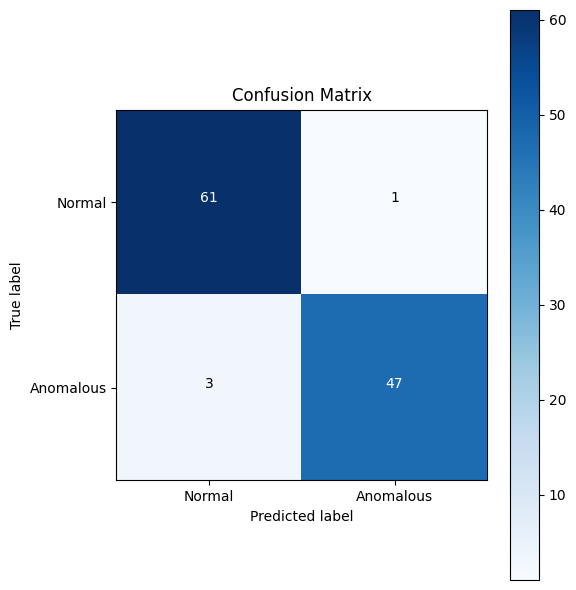

Confusion matrix saved to /content/drive/MyDrive/Thesis/synthetic_model_artifacts2/efficientnet_confusion_matrix.png


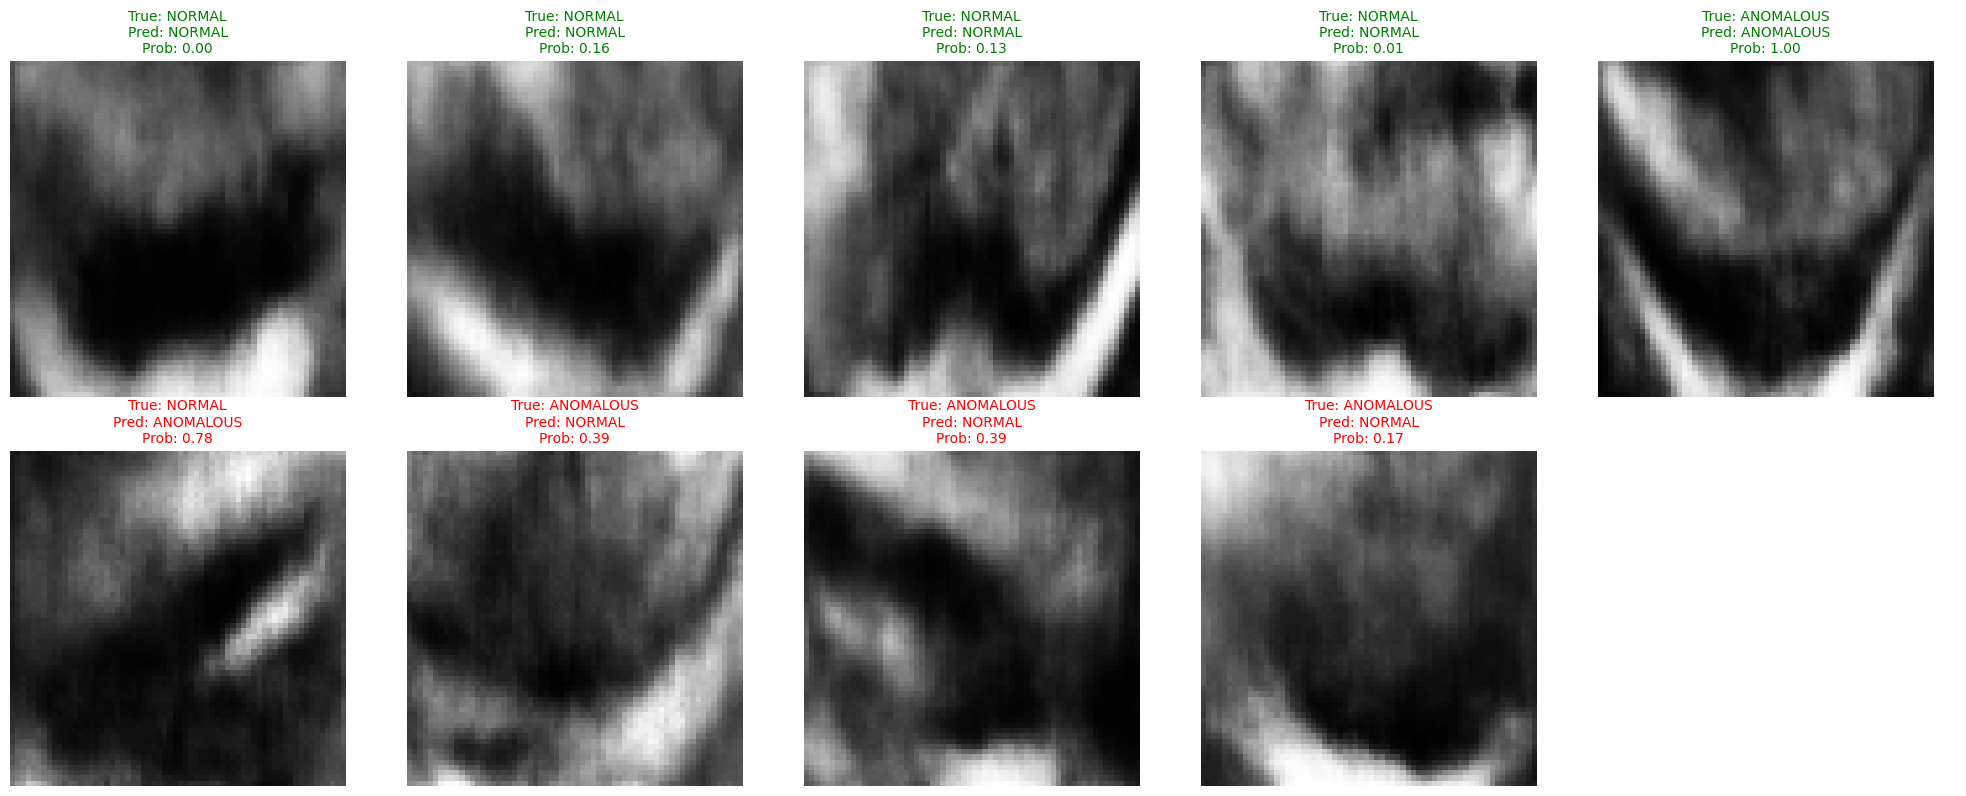

Prediction visualization saved to /content/drive/MyDrive/Thesis/synthetic_model_artifacts2/syn_sample_predictions.png


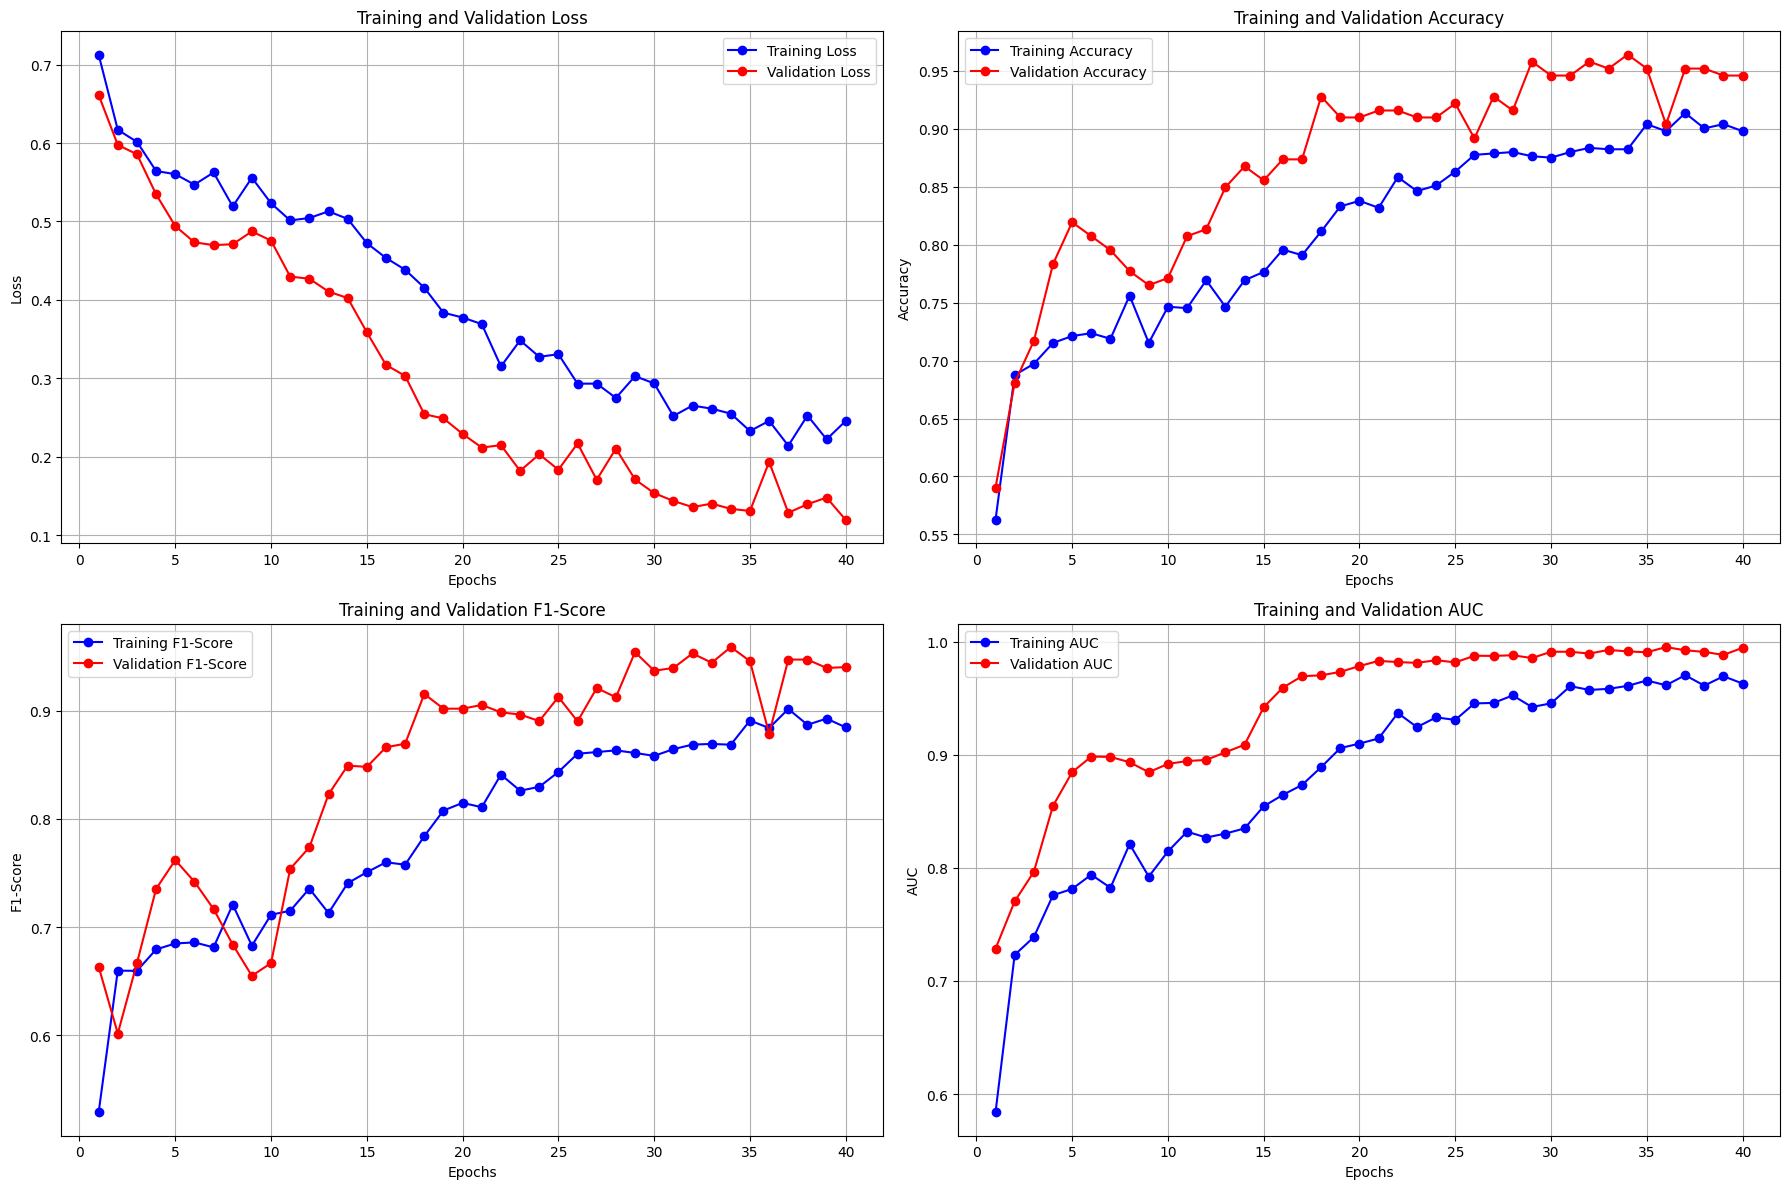

Training history plot saved to /content/drive/MyDrive/Thesis/synthetic_model_artifacts2/syn_training_history_plot.png


In [19]:
if __name__ == "__main__":
    # Initialize the model, optimizer, and loss function
    model = SYNClassifier().to(device)
    # Freeze all layers of the pre-trained base model initially
    for param in model.base.parameters():
        param.requires_grad = False

    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.BCEWithLogitsLoss()

    # Start the training process
    train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=NUM_EPOCHS)

    # Load the best model for evaluation
    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['syn_model_state_dict'])
        print("\nBest model loaded successfully for evaluation.")
    except FileNotFoundError:
        print("\nBest model not found. Cannot perform evaluation.")
        exit()

    # Evaluate the model on the test set
    test_results = evaluate_model(model, test_loader, df_test)

    # Visualize the predictions
    visualize_predictions(test_results, num_samples=10)

    # Plot the training history
    plot_training_history(HISTORY_FILE)

In [26]:
# GRAD-CAM
class EfficientNetGradCAM:
    """
    A class to compute and store Grad-CAM heatmaps for an EfficientNet model.
    """
    def __init__(self, model):
        self.model = model
        self.activations = None
        self.gradients = None

        # Register hooks on the last convolutional block of EfficientNet
        self.target_layer = self.model.base._blocks[-1]
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def __call__(self, x):
        self.model.eval()
        self.model.zero_grad()

        # Forward pass to get output and populate activations
        output = self.model(x)

        # Backpropagate the gradient of the logit
        output.backward()

        activations = self.activations.detach()
        gradients = self.gradients.detach()

        # Pool the gradients to get weights
        weights = torch.mean(gradients, dim=[2, 3], keepdim=True)

        # Compute the CAM
        cam = torch.sum(weights * activations, dim=1, keepdim=True)
        cam = torch.relu(cam)

        # Normalize the CAM
        cam = cam - torch.min(cam)
        if torch.max(cam) > 0:
            cam = cam / torch.max(cam)
        else:
            cam = torch.zeros_like(cam)

        return cam.squeeze().cpu().numpy()

In [27]:
def visualize_gradcam(model, test_df, num_samples=5):
    """
    Generates and displays Grad-CAM visualizations for a few test samples.
    """
    gradcam = EfficientNetGradCAM(model)
    samples = test_df.sample(num_samples)

    # Set the model to evaluation mode
    model.eval()

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    if num_samples == 1:
        axes = [axes]

    transform_for_cam = get_test_transform_en()

    for i, (_, row) in enumerate(samples.iterrows()):
        # Load and preprocess the image
        img_path = row['image_path']

        # Read image from file or create a dummy black image if not found
        if not os.path.exists(img_path):
            image = np.zeros((224, 224, 3), dtype=np.uint8)
            cv2.putText(image, "Dummy Image", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        else:
            image = cv2.imread(img_path)
            if image is None:
                image = np.zeros((224, 224, 3), dtype=np.uint8)

        # This is your exact preprocessing pipeline, now correctly implemented
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        original_img_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply the test transform for model input
        input_tensor = transform_for_cam(image=original_img_rgb)['image'].unsqueeze(0).to(device)

        # Get prediction
        with torch.no_grad():
            output = model(input_tensor)
            prob = torch.sigmoid(output).item()
            pred = 1 if prob > 0.5 else 0

        # Get CAM - we need gradients for this part
        input_tensor.requires_grad_(True)
        cam = gradcam(input_tensor)

        # Resize CAM to original image size for overlay
        cam_resized = cv2.resize(cam, (original_img_rgb.shape[1], original_img_rgb.shape[0]))
        heatmap = (cam_resized * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Alpha blend the heatmap and original image
        superimposed_img = cv2.addWeighted(original_img_rgb, 0.6, heatmap, 0.4, 0)

        # Plot the result
        axes[i].imshow(superimposed_img)
        status_map = {0.0: "NORMAL", 1.0: "ANOMALOUS"}
        true_status = status_map.get(row['label'], 'N/A')
        pred_status = status_map.get(pred, 'N/A')

        color = "green" if row['label'] == pred else "red"

        title = (f"True: {true_status} | Pred: {pred_status}\n"
                 f"Prob: {prob:.2f}")
        axes[i].set_title(title, color=color, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    viz_path = os.path.join(SAVE_DIR, 'efficientnet_gradcam.png')
    plt.savefig(viz_path, dpi=300)
    plt.show()
    print(f"Grad-CAM visualization saved to {viz_path}")

Loaded pretrained weights for efficientnet-b0
Best model loaded successfully for Grad-CAM visualization.


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


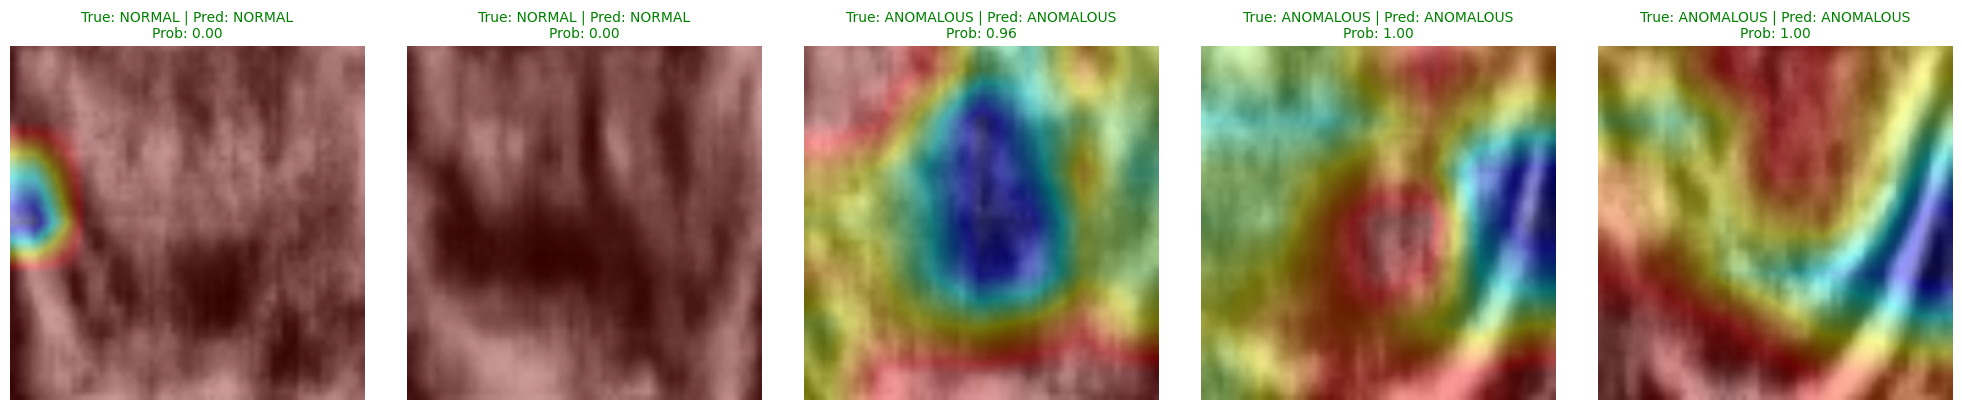

Grad-CAM visualization saved to /content/drive/MyDrive/Thesis/synthetic_model_artifacts2/efficientnet_gradcam.png


In [28]:
# --- Visualize Grad-CAM ---
if __name__ == "__main__":
    model = SYNClassifier().to(device)

    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['syn_model_state_dict'])
        print("Best model loaded successfully for Grad-CAM visualization.")
    except FileNotFoundError:
        print("Best model not found. Cannot perform Grad-CAM visualization.")
        exit()

    visualize_gradcam(model, df_test, num_samples=5)

# AUGMENTED/HYBRID DATASET

In [39]:
# Path to Shenzhen Dattaset
root_path = '/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework'

# Walk through all directories and files
for dirpath, dirnames, filenames in os.walk(root_path):
    print(f'Directory: {dirpath}')
    for dirname in dirnames:
        print(f'  Subdirectory: {dirname}')
    for filename in filenames:
        print(f'  File: {filename}')
    print("-" * 50)

Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework
  Subdirectory: Dataset for Fetus Framework
--------------------------------------------------
Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework
  Subdirectory: Dataset for Fetus Framework
  File: ObjectDetection.xlsx
--------------------------------------------------
Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework
  Subdirectory: Set1-Training-Validation Sets CNN
  Subdirectory: External Test Set
  Subdirectory: Set2-Training-Validation Sets ANN Scoring system
  Subdirectory: Internal Test Set
--------------------------------------------------
Directory: /content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Set1-Training-Validation Sets CNN
  Subdirectory: Standard
--------

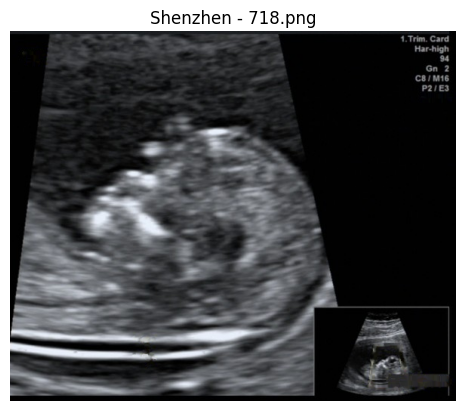

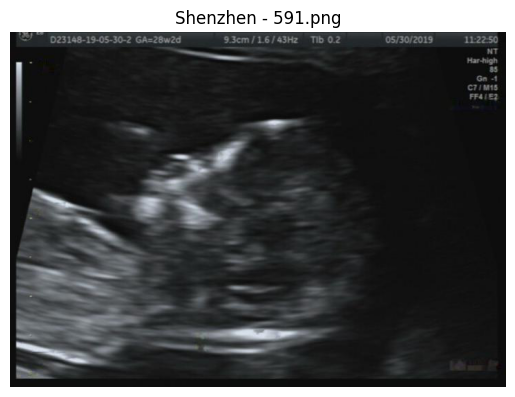

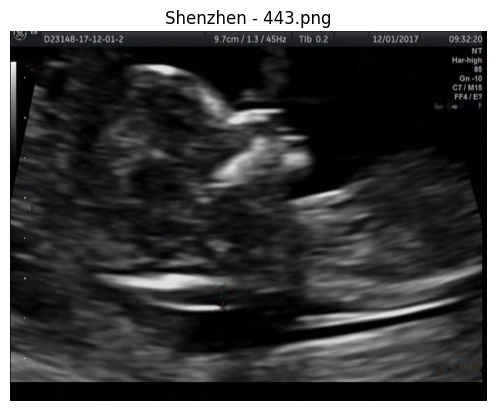

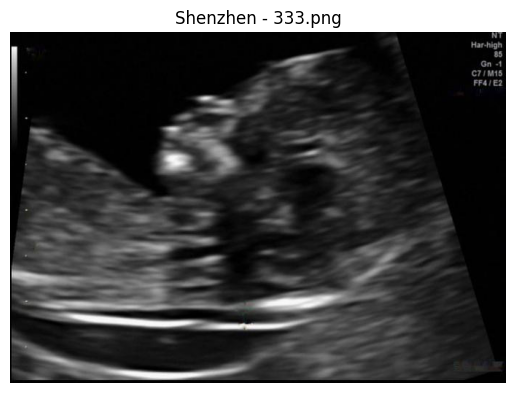

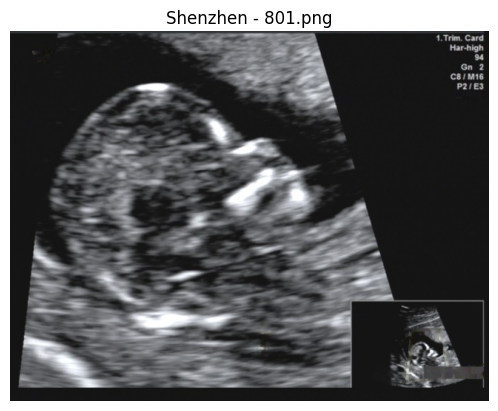

In [41]:
import cv2
import matplotlib.pyplot as plt
import random

shenzhen_path = "/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Set1-Training-Validation Sets CNN/Standard"

# List files
shenzhen_files = os.listdir(shenzhen_path)

# Pick 5 random images to display
random_files = random.sample(shenzhen_files, 5)

# Display the images
for filename in random_files:
    img_path = os.path.join(shenzhen_path, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"Shenzhen - {filename}")
    plt.axis('off')
    plt.show()

In [42]:
import pandas as pd
# Path to the annotation file
annotation_path = "/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/ObjectDetection.xlsx"

# Load the spreadsheet
annotations = pd.read_excel(annotation_path)

# Show the first few rows
annotations.head()

fname   structure  h_min  w_min  h_max  w_max
0  168.png     thalami    178    171    244    261
1  168.png  nasal bone     96    308    111    349
2  168.png      palate    133    300    205    408
3  168.png  nasal skin     86    324     95    349
4  168.png   nasal tip     79    345     89    376

In [44]:
# ONLY THE STANDARD FOLDERS
import os
import pandas as pd

# BASE DIRECTORY
base_dir = "/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework"

# Step 2: Define paths to the four "Standard" folders
standard_folders = [
    os.path.join(base_dir, "External Test Set/Standard"),
    os.path.join(base_dir, "Internal Test Set/Standard"),
    os.path.join(base_dir, "Set1-Training-Validation Sets CNN/Standard"),
    os.path.join(base_dir, "Set2-Training-Validation Sets ANN Scoring system/Standard")
]

# Step 3: Load all image filenames from these folders
shenzhen_standard_image_paths = []
for folder in standard_folders:
    for fname in os.listdir(folder):
        if fname.lower().endswith(".png"):
            shenzhen_standard_image_paths.append({
                "fname": fname,
                "image_path": os.path.join(folder, fname)
            })

df_images = pd.DataFrame(shenzhen_standard_image_paths)

In [45]:
# PAIR ANNOTATIONS WITH STANDARD US FROM SHENZHEN DATASET
relevant_structures = ['NT']
filtered_annotations = annotations[annotations['structure'].str.lower().isin([s.lower() for s in relevant_structures])]

# Merge based on file name
shenzhen_merged = pd.merge(df_images, filtered_annotations, on='fname', how='inner')

# Check result
print(f"Merged dataset shape: {shenzhen_merged.shape}")
print(shenzhen_merged.head())


Merged dataset shape: (1110, 7)
      fname                                         image_path structure  \
0  1555.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
1  1553.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
2  1543.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
3  1562.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
4  1546.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   

   h_min  w_min  h_max  w_max  
0    383    194    420    452  
1    401    251    429    443  
2    358     16    408    447  
3    399    303    432    446  
4    368    186    393    440  


In [46]:
# PREPROCESSING FOR NT IMAGES
# Filter for NT structures and calculate NT thickness
nt_df = shenzhen_merged.copy()

# Calculate NT thickness from vertical dimension (h_max - h_min)
nt_df['nt_thickness_px'] = nt_df['h_max'] - nt_df['h_min']
nt_df['nt_thickness_mm'] = nt_df['nt_thickness_px'] * 0.1  # Convert to mm
nt_df['label'] = nt_df['nt_thickness_mm'].apply(lambda x: 1 if x > 3.5 else 0)  # 1=anomalous, 0=normal

# Calculate bounding box dimensions for cropping
nt_df['width'] = nt_df['w_max'] - nt_df['w_min']
nt_df['height'] = nt_df['h_max'] - nt_df['h_min']

In [62]:
nt_df.head()

fname                                         image_path structure  \
0  1555.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
1  1553.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
2  1543.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
3  1562.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   
4  1546.png  /content/drive/MyDrive/Thesis/Thesis Datasets/...        NT   

   h_min  w_min  h_max  w_max  nt_thickness_px  nt_thickness_mm  label  width  \
0    383    194    420    452               37              3.7      1    258   
1    401    251    429    443               28              2.8      0    192   
2    358     16    408    447               50              5.0      1    431   
3    399    303    432    446               33              3.3      0    143   
4    368    186    393    440               25              2.5      0    254   

   height  
0      37  
1      28  
2      50  
3      33  
4      25

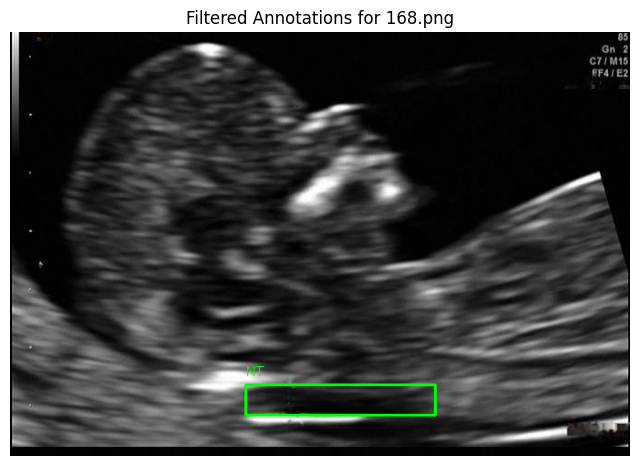

In [50]:
import cv2
import matplotlib.pyplot as plt

relevant_structures = ['NT']

filtered_annotations = annotations[annotations['structure'].str.lower().isin([s.lower() for s in relevant_structures])]
target_filename = '168.png'
image_path = f"/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Set1-Training-Validation Sets CNN/Standard/{target_filename}"
image_annotations = filtered_annotations[filtered_annotations['fname'] == target_filename]

# Load and convert the image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes for relevant structures
for _, row in image_annotations.iterrows():
    structure = row['structure']
    h_min, w_min, h_max, w_max = int(row['h_min']), int(row['w_min']), int(row['h_max']), int(row['w_max'])

    # Draw rectangle
    cv2.rectangle(img, (w_min, h_min), (w_max, h_max), (0, 255, 0), 2)

    # Add label above the box
    label_position = (w_min, max(h_min - 10, 10))
    cv2.putText(img, structure, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title(f"Filtered Annotations for {target_filename}")
plt.axis('off')
plt.show()

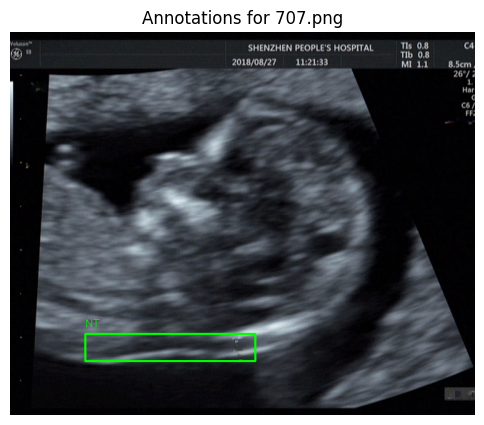

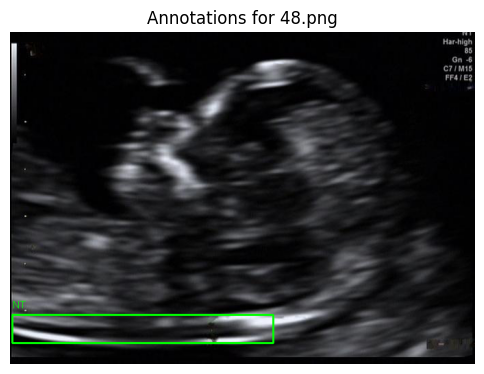

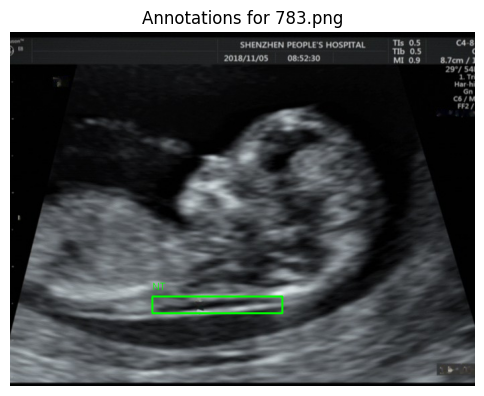

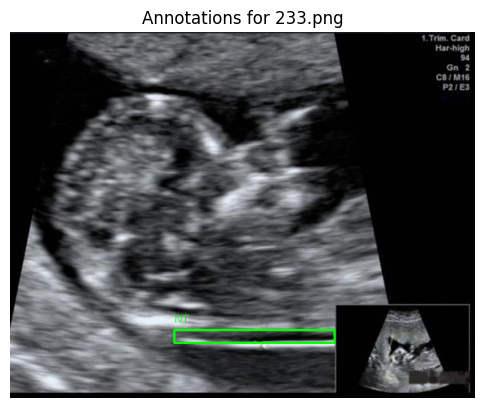

Image not found: /content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Set1-Training-Validation Sets CNN/Standard/951.png


In [52]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Sample group of 3 unique images to demonstrate annotation application
filenames = np.random.choice(filtered_annotations['fname'].unique(), size = 5, replace = False)

# Define the base path for the images
image_base_path = "/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework/Set1-Training-Validation Sets CNN/Standard"

for filename in filenames:
    # Get all annotations for this image
    image_data = filtered_annotations[filtered_annotations['fname'] == filename]
    # Construct the image path using the base path and the filename
    image_path = os.path.join(image_base_path, filename)

    # Load and check image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found: {image_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw all boxes for this image
    for _, row in image_data.iterrows():
        structure = row['structure']
        h_min, w_min, h_max, w_max = int(row['h_min']), int(row['w_min']), int(row['h_max']), int(row['w_max'])
        cv2.rectangle(img, (w_min, h_min), (w_max, h_max), (0, 255, 0), 2)
        label_position = (w_min, max(h_min - 10, 10))
        cv2.putText(img, structure, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Show image with annotations
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Annotations for {filename}")
    plt.axis('off')
    plt.show()

In [53]:
import os
import pandas as pd

# Recursively find all image paths
search_root = "/content/drive/MyDrive/Thesis/Thesis Datasets/Dataset for Fetus Framework/Dataset for Fetus Framework/Dataset for Fetus Framework"
all_image_paths = {}

for root, dirs, files in os.walk(search_root):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_image_paths[file] = os.path.join(root, file)

# Map each annotation row to its real image path
filtered_annotations['image_path'] = filtered_annotations['fname'].map(all_image_paths)

# Drop any rows where no matching image path was found
#filtered_annotations = filtered_annotations.dropna(subset=['image_path'])

# Show the result
filtered_annotations.head()

/tmp/ipython-input-2535304923.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annotations['image_path'] = filtered_annotations['fname'].map(all_image_paths)


fname structure  h_min  w_min  h_max  w_max  \
6   168.png        NT    385    257    418    464   
16  169.png        NT    372    126    428    371   
20  170.png        NT    376     12    416    478   
30  171.png        NT    359    173    389    529   
37  172.png        NT    375    293    399    380   

                                           image_path  
6   /content/drive/MyDrive/Thesis/Thesis Datasets/...  
16  /content/drive/MyDrive/Thesis/Thesis Datasets/...  
20  /content/drive/MyDrive/Thesis/Thesis Datasets/...  
30  /content/drive/MyDrive/Thesis/Thesis Datasets/...  
37  /content/drive/MyDrive/Thesis/Thesis Datasets/...

In [57]:
filtered_annotations.shape

(1110, 8)

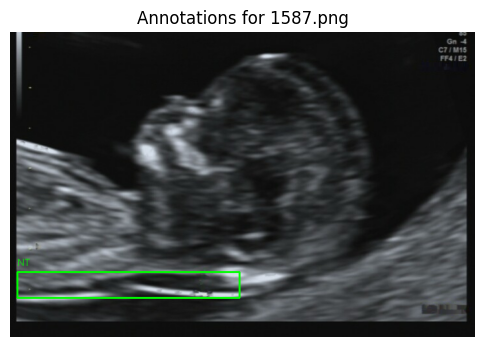

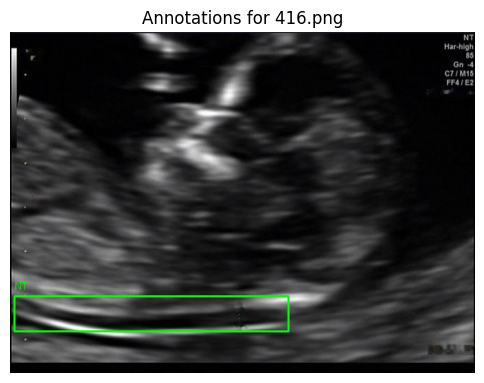

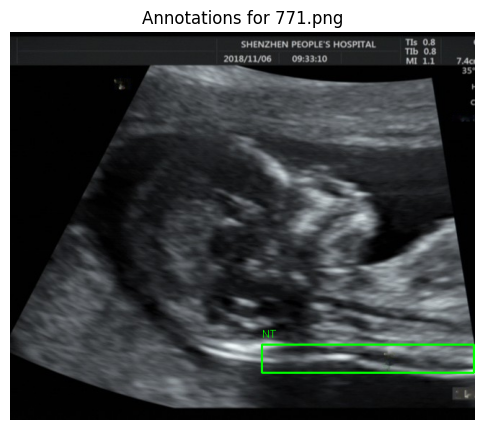

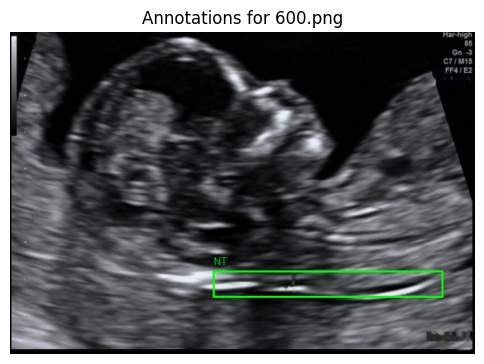

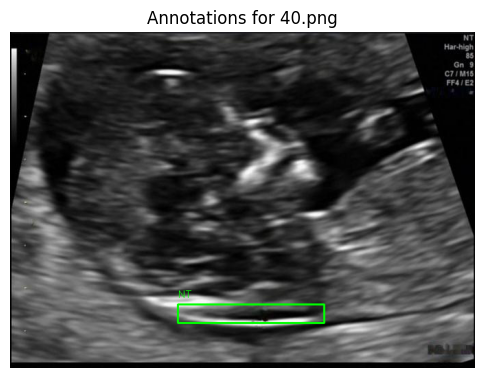

In [54]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

filenames = np.random.choice(filtered_annotations['fname'].unique(), size = 5, replace = False)

for filename in filenames:
    # Get all annotations for this image
    image_data = filtered_annotations[filtered_annotations['fname'] == filename]
    image_path = image_data['image_path'].iloc[0]

    # Load and check image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found: {image_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw all boxes for this image
    for _, row in image_data.iterrows():
        structure = row['structure']
        h_min, w_min, h_max, w_max = int(row['h_min']), int(row['w_min']), int(row['h_max']), int(row['w_max'])
        cv2.rectangle(img, (w_min, h_min), (w_max, h_max), (0, 255, 0), 2)
        label_position = (w_min, max(h_min - 10, 10))
        cv2.putText(img, structure, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Show image with annotations
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Annotations for {filename}")
    plt.axis('off')
    plt.show()

In [60]:
# To check if all annotations have been properly paired to the right images
import os

filtered_annotations['image_file_from_path'] = filtered_annotations['image_path'].apply(lambda x: os.path.basename(x))

# Check mismatches
mismatches = filtered_annotations[filtered_annotations['fname'] != filtered_annotations['image_file_from_path']]

# Show number of mismatches and a preview if any
print(f"Total mismatches: {len(mismatches)}")
if not mismatches.empty:
    display(mismatches.head())

Total mismatches: 0


/tmp/ipython-input-1363061127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annotations['image_file_from_path'] = filtered_annotations['image_path'].apply(lambda x: os.path.basename(x))


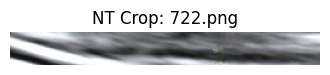

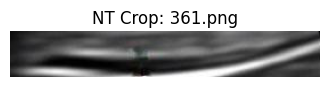

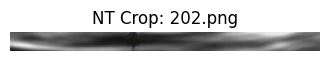

In [61]:
import cv2
import os
import matplotlib.pyplot as plt

# Create folder to save cropped NT images
output_dir = "/content/drive/MyDrive/Thesis/Thesis Datasets/Cropped_NT"
os.makedirs(output_dir, exist_ok=True)

# Function to crop and save/display NT regions
for idx, row in filtered_annotations.iterrows():
    img = cv2.imread(row['image_path'])
    if img is None:
        print(f"Image not found: {row['image_path']}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h_min = int(row['h_min'])
    w_min = int(row['w_min'])
    h_max = int(row['h_max'])
    w_max = int(row['w_max'])

    cropped_img = img[h_min:h_max, w_min:w_max]

    # Save cropped image
    cropped_path = os.path.join(output_dir, row['fname'])
    cv2.imwrite(cropped_path, cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))

# Display 3 random cropped images
sample_crops = filtered_annotations.sample(3, random_state=42)
for idx, row in sample_crops.iterrows():
    cropped_path = os.path.join(output_dir, row['fname'])
    cropped_img = cv2.imread(cropped_path)
    cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4, 4))
    plt.imshow(cropped_img)
    plt.title(f"NT Crop: {row['fname']}")
    plt.axis('off')
    plt.show()


In [63]:
# Calculate NT thickness from vertical dimension (h_max - h_min)
filtered_annotations['nt_thickness_px'] = filtered_annotations['h_max'] - filtered_annotations['h_min']
filtered_annotations['nt_thickness_mm'] = filtered_annotations['nt_thickness_px'] * 0.1  # Convert to mm
filtered_annotations['label'] = filtered_annotations['nt_thickness_mm'].apply(lambda x: 1 if x > 3.5 else 0)  # 1=anomalous, 0=normal

# Calculate bounding box dimensions for cropping
filtered_annotations['width'] = filtered_annotations['w_max'] - filtered_annotations['w_min']
filtered_annotations['height'] = filtered_annotations['h_max'] - filtered_annotations['h_min']

/tmp/ipython-input-4289405668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annotations['nt_thickness_px'] = filtered_annotations['h_max'] - filtered_annotations['h_min']
/tmp/ipython-input-4289405668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annotations['nt_thickness_mm'] = filtered_annotations['nt_thickness_px'] * 0.1  # Convert to mm
/tmp/ipython-input-4289405668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [65]:
nt_df = filtered_annotations[['image_file_from_path', 'image_path', 'nt_thickness_mm', 'label']]
nt_df.shape

(1110, 4)

In [67]:
nt_df.columns

Index(['image_file_from_path', 'image_path', 'nt_thickness_mm', 'label'], dtype='object')

In [66]:
nt_df.to_csv('cropped_nt.csv', index=False)

In [68]:
IMAGE_FOLDER_PATH = '/content/drive/MyDrive/Thesis/Thesis Datasets/Cropped_NT'

# The path to the CSV file that contains the labels.
# This is the "other dataframe" you mentioned.
LABELS_CSV_PATH = '/content/cropped_nt.csv'

# The name of the new CSV file that will contain the merged data.
OUTPUT_CSV_PATH = 'real_nt.csv'

# ==============================================================================
# 2. MERGING FUNCTION
# ==============================================================================
def join_dataframes(image_folder, labels_csv, output_path):
    """
    Creates a DataFrame of image paths and merges it with a labels DataFrame.

    Args:
        image_folder (str): Path to the directory with image files.
        labels_csv (str): Path to the CSV file containing labels.
        output_path (str): Path to save the new, merged CSV file.
    """
    print("Step 1: Reading image filenames from the folder...")
    try:
        # Get all filenames from the image folder
        image_filenames = os.listdir(image_folder)
        # Create a DataFrame with a column for the full path and a column for the filename,
        # ensuring the filename column matches the one in your labels DataFrame.
        image_df = pd.DataFrame({
            'image_path': [os.path.join(image_folder, fname) for fname in image_filenames],
            'image_file_from_path': image_filenames
        })
        print(f"Found {len(image_df)} images.")
    except FileNotFoundError:
        print(f"Error: Image folder not found at '{image_folder}'. Please check the path.")
        return

    print("\nStep 2: Loading labels from the CSV file...")
    try:
        # Read the labels DataFrame
        labels_df = pd.read_csv(labels_csv)
        print(f"Found {len(labels_df)} labels.")
    except FileNotFoundError:
        print(f"Error: Labels CSV not found at '{labels_csv}'. Please check the path.")
        return

    print("\nStep 3: Merging the two DataFrames...")
    # Perform the merge using an inner join on the 'image_file_from_path' column.
    merged_df = pd.merge(image_df, labels_df, on='image_file_from_path', how='inner')

    # Check if the merge was successful
    if merged_df.empty:
        print("Warning: The merge resulted in an empty DataFrame. This usually means the 'image_file_from_path' column in your labels CSV does not match the image filenames.")
        return

    print(f"Merge successful. The final DataFrame has {len(merged_df)} rows.")

    print("\nStep 4: Saving the final DataFrame to a new CSV file...")
    merged_df.to_csv(output_path, index=False)
    print(f"Final data saved to '{output_path}'.")

# ==============================================================================
# 3. MAIN EXECUTION BLOCK
# ==============================================================================
if __name__ == "__main__":
    join_dataframes(IMAGE_FOLDER_PATH, LABELS_CSV_PATH, OUTPUT_CSV_PATH)

Step 1: Reading image filenames from the folder...
Found 1110 images.

Step 2: Loading labels from the CSV file...
Found 1110 labels.

Step 3: Merging the two DataFrames...
Merge successful. The final DataFrame has 1110 rows.

Step 4: Saving the final DataFrame to a new CSV file...
Final data saved to 'real_nt.csv'.


In [2]:
import pandas as pd

In [16]:
nt = pd.read_csv('/content/real_nt.csv')
cropped_df = nt[['image_path_x', 'label']]

In [22]:
cropped_df['image_path'] = cropped_df['image_path_x']
cropped_df = cropped_df.drop(columns=['image_path_x'])

/tmp/ipython-input-743613133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df['image_path'] = cropped_df['image_path_x']


In [25]:
new_column_order = ['image_path', 'label']
cropped_df = cropped_df[new_column_order]

In [26]:
cropped_df.to_csv('real_nt.csv', index=False)

In [27]:
# DEFINE PATHS TO REAL AND SYTHETIC ULTRASOUND IMAGES
real_images = "/content/real_nt.csv"
synthetic_images = "/content/synthetic_df.csv"
hybrid_dataset = 'hybrid_dataset.csv'

In [28]:
# TARGET COUNT FOR GROUPS
TOTAL_NUM_IMAGES = 1110
TARGET_COUNT = TOTAL_NUM_IMAGES // 2
TARGET_REAL_NORMAL = int(round(TARGET_COUNT/2))
TARGET_SYNTHETIC_NORMAL = int(TARGET_COUNT - TARGET_REAL_NORMAL)
TARGET_REAL_ANOMALOUS = int(round(TARGET_COUNT/2))
TARGET_SYNTHETIC_ANOMALOUS = int(TARGET_COUNT - TARGET_REAL_ANOMALOUS)

In [29]:
print(TARGET_REAL_NORMAL)
print(TARGET_SYNTHETIC_NORMAL)
print(TARGET_REAL_ANOMALOUS)
print(TARGET_SYNTHETIC_ANOMALOUS)

278
277
278
277


In [30]:
print("Loading datasets...")
try:
    real_df = pd.read_csv(real_images)
    synthetic_df = pd.read_csv(synthetic_images)
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: One of the CSV files was not found. Please check the paths.")
    print(f"Error details: {e}")
    exit()

Loading datasets...
Datasets loaded successfully.


In [31]:
# FILTER DATASET BY LABELS
print("Filtering data by class...")
# Real data
real_normal_df = real_df[real_df['label'] == 0].reset_index(drop=True)
real_anomalous_df = real_df[real_df['label'] == 1].reset_index(drop=True)

# Synthetic data
synthetic_normal_df = synthetic_df[synthetic_df['label'] == 0].reset_index(drop=True)
synthetic_anomalous_df = synthetic_df[synthetic_df['label'] == 1].reset_index(drop=True)

Filtering data by class...


In [32]:
print(f"Real Normal images found: {len(real_normal_df)}")
print(f"Real Anomalous images found: {len(real_anomalous_df)}")
print(f"Synthetic Normal images found: {len(synthetic_normal_df)}")
print(f"Synthetic Anomalous images found: {len(synthetic_anomalous_df)}")

Real Normal images found: 614
Real Anomalous images found: 496
Synthetic Normal images found: 614
Synthetic Anomalous images found: 496


In [33]:
print("Sampling images to create the hybrid dataset...")

num_real_anomalous_to_sample = min(TARGET_REAL_ANOMALOUS, len(real_anomalous_df))
num_synthetic_anomalous_to_sample = TARGET_COUNT - num_real_anomalous_to_sample

num_real_normal_to_sample = min(TARGET_REAL_NORMAL, len(real_normal_df))
num_synthetic_normal_to_sample = TARGET_COUNT - num_real_normal_to_sample

print(f"Sampling {num_real_anomalous_to_sample} real anomalous images.")
print(f"Sampling {num_synthetic_anomalous_to_sample} synthetic anomalous images.")
print(f"Sampling {num_real_normal_to_sample} real normal images.")
print(f"Sampling {num_synthetic_normal_to_sample} synthetic normal images.")

Sampling images to create the hybrid dataset...
Sampling 278 real anomalous images.
Sampling 277 synthetic anomalous images.
Sampling 278 real normal images.
Sampling 277 synthetic normal images.


In [34]:
# Sample the data
sampled_real_normal = real_normal_df.sample(n=TARGET_REAL_NORMAL, random_state=16, replace=False)
sampled_synthetic_normal = synthetic_normal_df.sample(n=TARGET_SYNTHETIC_NORMAL, random_state=16, replace=False)
sampled_real_anomalous = real_anomalous_df.sample(n=num_real_anomalous_to_sample, random_state=16, replace=False)
sampled_synthetic_anomalous = synthetic_anomalous_df.sample(n=num_synthetic_anomalous_to_sample, random_state=16, replace=False)


In [35]:
print("Combining and shuffling the dataset...")
hybrid_df = pd.concat([
    sampled_real_normal,
    sampled_synthetic_normal,
    sampled_real_anomalous,
    sampled_synthetic_anomalous
]).sample(frac=1, random_state=16).reset_index(drop=True)

print(f"New hybrid dataset created with {len(hybrid_df)} images.")
print("Final class distribution:")
print(hybrid_df['label'].value_counts())

Combining and shuffling the dataset...
New hybrid dataset created with 1110 images.
Final class distribution:
label
0    555
1    555
Name: count, dtype: int64


In [36]:
print(f"Saving the hybrid dataset to '{hybrid_dataset}'...")
hybrid_df.to_csv(hybrid_dataset, index=False)
print("File saved successfully.")

Saving the hybrid dataset to 'hybrid_dataset.csv'...
File saved successfully.


In [37]:
hybrid_df = pd.read_csv('hybrid_dataset.csv')

# IMAGE CLASSIFICATION WITH HYBRID DATASET

In [8]:
import pandas as pd
import os
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from efficientnet_pytorch import EfficientNet
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [22]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
# Define model and training parameters
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
SAVE_DIR = "/content/drive/MyDrive/Thesis/hybrid_model_artifacts"
os.makedirs(SAVE_DIR, exist_ok=True)
HISTORY_FILE = os.path.join(SAVE_DIR, 'hybrid_training_history.json')
MODEL_PATH = os.path.join(SAVE_DIR, 'hybrid_best_model_enet.pth')

In [13]:
df = pd.read_csv("/content/hybrid_dataset.csv")
type(df)

pandas.core.frame.DataFrame

In [14]:
# Split into train and temp
df_train, df_temp = train_test_split(df, test_size=0.25, stratify=df['label'], random_state=16)

# Split temp into validation and test
df_val, df_test = train_test_split(df_temp, test_size=0.4, stratify=df_temp['label'], random_state=16)

In [15]:
def apply_clahe(image, clipLimit=2.0, tileGridSize=(8, 8)):
    """Applies Contrast Limited Adaptive Histogram Equalization (CLAHE)."""
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(image)

In [16]:
def get_train_transform_en():
    """Defines a robust set of augmentations for training."""
    return A.Compose([
        A.RandomResizedCrop(height=224, width=224, scale=(0.7, 1.0), ratio=(0.8, 1.2), p=0.5),
        A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.8),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.ShiftScaleRotate(
            shift_limit=0.1,
            scale_limit=0.2,
            rotate_limit=12,
            border_mode=cv2.BORDER_CONSTANT,
            value=0,
            p=0.8
        ),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05, p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), p=0.3),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.2),
        A.CoarseDropout(max_holes=8, max_height=16, max_width=16, fill_value=0, p=0.3),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_val_transform_en():
    """Defines transformations for validation and test sets."""
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

def get_test_transform_en():
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

In [17]:
class HYBRIDDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['image_path']

        # Read image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {img_path}")

        # Resize, CLAHE, and convert to RGB
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        clahe_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply augmentation and normalization
        if self.transform:
            augmented = self.transform(image=clahe_rgb)
            image_tensor = augmented['image']
        else:
            image_tensor = torch.tensor(clahe_rgb).permute(2, 0, 1).float() / 255.0

        label = torch.tensor(row['label'], dtype=torch.float32)
        return image_tensor, label

In [18]:
train_dataset = HYBRIDDataset(df_train, transform=get_train_transform_en())
val_dataset = HYBRIDDataset(df_val, transform=get_val_transform_en())
test_dataset = HYBRIDDataset(df_test, transform=get_test_transform_en())

In [19]:
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True
    )

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

    # Dataset statistics
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")
print(f"Normal samples: {sum(df['label'] == 0)}")
print(f"Anomalous samples: {sum(df['label'] == 1)}")
print(f"Anomaly ratio: {sum(df['label'] == 1)/len(df):.2f}")

Total samples: 1110
Training samples: 832
Validation samples: 166
Testing samples: 112
Normal samples: 555
Anomalous samples: 555
Anomaly ratio: 0.50


Displaying a sample image from the DataLoader...


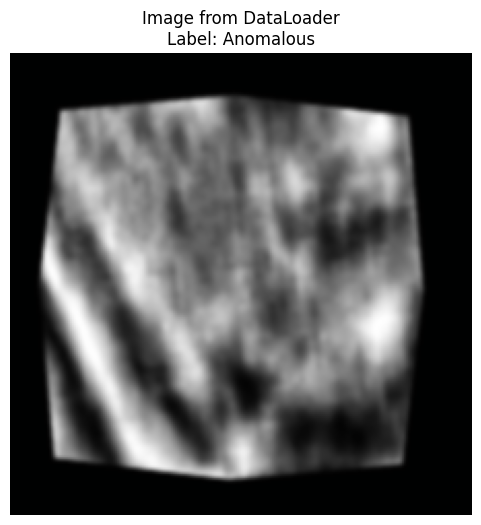


Image displayed successfully!


In [20]:
print("Displaying a sample image from the DataLoader...")
# Get a single batch of data from the DataLoader
images, labels = next(iter(train_loader))

# Select the first image and label from the batch
image_tensor = images[0]
label_tensor = labels[0]

# Un-normalize the image tensor for proper visualization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_np = image_tensor.permute(1, 2, 0).numpy()
image_np = std * image_np + mean
image_np = np.clip(image_np, 0, 1)

# Map the label to a descriptive string
label_map = {0.0: 'Normal', 1.0: 'Anomalous'}
label_str = label_map.get(label_tensor.item(), 'Unknown')

# Display the image and label
plt.figure(figsize=(6, 6))
plt.imshow(image_np)
plt.title(f"Image from DataLoader\nLabel: {label_str}")
plt.axis('off')
plt.show()

print("\nImage displayed successfully!")

In [21]:
class HYBRIDClassifier(nn.Module):
    def __init__(self):
        super(HYBRIDClassifier, self).__init__()
        self.base = EfficientNet.from_pretrained('efficientnet-b0')
        # Freeze all parameters in the base model
        for param in self.base.parameters():
            param.requires_grad = False

        # Replace the final fully connected layer with an identity module
        num_features = self.base._fc.in_features
        self.base._fc = nn.Identity()

        # Custom classifier on top of the base model
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        features = self.base(x)
        return self.classifier(features)

In [22]:
# TRAINING HELPER FUNCTIONS
def unfreeze_layers(model, epoch):
    """Gradually unfreezes layers of the EfficientNet model for fine-tuning."""
    if epoch == 3:
        # Unfreeze classifier layers
        for param in model.classifier.parameters():
            param.requires_grad = True
        print("Unfroze classifier layers")

    elif epoch == 8:
        # Unfreeze top 3 blocks of the base model
        for name, param in model.base.named_parameters():
            if 'blocks.5' in name or 'blocks.6' in name or 'blocks.7' in name:
                param.requires_grad = True
        print("Unfroze top 3 blocks")

    elif epoch == 15:
        # Unfreeze all layers of the model
        for param in model.parameters():
            param.requires_grad = True
        print("Unfroze all layers")

In [23]:
# MAIN TRAINING FUNCTIONS
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs):
    """
    Main training loop for the model.
    Saves the best model based on validation loss and training history,
    computes and stores AUC and F1-score for each epoch.
    """
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": [],
        "train_f1": [],
        "val_f1": [],
        "train_auc": [],
        "val_auc": [],
    }
    best_val_loss = float('inf')

    for epoch in range(1, num_epochs + 1):
        unfreeze_layers(model, epoch)
        print(f"Epoch {epoch}/{num_epochs}")

        # --- Training phase ---
        model.train()
        train_loss = 0.0
        train_preds = []
        train_labels = []
        train_probs = []
        total_train = 0

        for images, labels in tqdm(train_loader, desc="Training"):
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            train_preds.extend(preds.detach().cpu().numpy().flatten())
            train_labels.extend(labels.detach().cpu().numpy().flatten())
            train_probs.extend(probs.detach().cpu().numpy().flatten())
            total_train += labels.size(0)

        avg_train_loss = train_loss / total_train
        train_accuracy = accuracy_score(train_labels, train_preds)
        train_f1 = f1_score(train_labels, train_preds)
        train_auc = roc_auc_score(train_labels, train_probs)

        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_accuracy)
        history['train_f1'].append(train_f1)
        history['train_auc'].append(train_auc)

        # --- Validation phase ---
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []
        val_probs = []
        total_val = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc="Validation"):
                images, labels = images.to(device), labels.float().unsqueeze(1).to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)

                probs = torch.sigmoid(outputs)
                preds = (probs > 0.5).float()

                val_preds.extend(preds.detach().cpu().numpy().flatten())
                val_labels.extend(labels.detach().cpu().numpy().flatten())
                val_probs.extend(probs.detach().cpu().numpy().flatten())
                total_val += labels.size(0)

        avg_val_loss = val_loss / total_val
        val_accuracy = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds)
        val_auc = roc_auc_score(val_labels, val_probs)

        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(val_accuracy)
        history['val_f1'].append(val_f1)
        history['val_auc'].append(val_auc)

        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1: {train_f1:.4f}, Train AUC: {train_auc:.4f}")
        print(f"Validation Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Val AUC: {val_auc:.4f}")

        # Save the best model based on validation loss
        if avg_val_loss < best_val_loss:
            print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model...")
            best_val_loss = avg_val_loss
            torch.save({
                'epoch': epoch,
                'hybrid_model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': best_val_loss
            }, MODEL_PATH)

    # Save training history to a JSON file
    with open(HISTORY_FILE, 'w') as f:
        json.dump(history, f)
    print("Training history saved.")

In [24]:
# VISUALIZATION FUNCTION
def plot_training_history(history_file):
    """Plots the training and validation loss, accuracy, F1-score, and AUC from a JSON file."""
    if not os.path.exists(history_file) or os.path.getsize(history_file) == 0:
        print(f"Error: The history file '{history_file}' does not exist or is empty.")
        return

    try:
        with open(history_file, 'r') as f:
            history = json.load(f)
    except json.JSONDecodeError:
        print(f"Error: The file '{history_file}' is not a valid JSON file. It might be corrupted.")
        return

    required_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1', 'train_auc', 'val_auc']
    if not all(key in history for key in required_keys):
        print("The history file is missing required data keys.")
        return

    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 12))

    # Plot Loss
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-o', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-o', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], 'r-o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot F1-Score
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['train_f1'], 'b-o', label='Training F1-Score')
    plt.plot(epochs, history['val_f1'], 'r-o', label='Validation F1-Score')
    plt.title('Training and Validation F1-Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid(True)

    # Plot AUC
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['train_auc'], 'b-o', label='Training AUC')
    plt.plot(epochs, history['val_auc'], 'r-o', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plot_path = os.path.join(SAVE_DIR, 'hybrid_training_history_plot.png')
    plt.savefig(plot_path, dpi=300)
    plt.show()
    print(f"Training history plot saved to {plot_path}")

In [25]:
# VISUALIZATION OF PREDICTIONS BY THE MODEL
def visualize_predictions(results, num_samples=10):
    """
    Visualizes a selection of correct and incorrect predictions.
    """
    correct = [r for r in results if r['true_label'] == r['pred_label']]
    incorrect = [r for r in results if r['true_label'] != r['pred_label']]

    samples = (correct[:num_samples//2] if len(correct) >= num_samples//2 else correct) + \
              (incorrect[:num_samples//2] if len(incorrect) >= num_samples//2 else incorrect)

    if not samples:
        print("No samples to visualize.")
        return

    num_cols = 5
    num_rows = (len(samples) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

    # Flatten the axes array for easier iteration
    if num_rows == 1:
        axes = [axes] if len(samples) <= 5 else axes
    else:
        axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i >= len(samples):
            ax.axis('off')
            continue

        res = samples[i]

        # Load and preprocess the image
        img_path = res['image_path']
        if not os.path.exists(img_path):
            img = np.zeros((224, 224, 3), dtype=np.uint8)
            cv2.putText(img, "Dummy Image", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        else:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                img = np.zeros((224, 224, 3), dtype=np.uint8)

        # Add text info
        status_map = {0.0: "NORMAL", 1.0: "ANOMALOUS"}
        true_status = status_map.get(res['true_label'], 'N/A')
        pred_status = status_map.get(res['pred_label'], 'N/A')

        color = "green" if res['true_label'] == res['pred_label'] else "red"

        ax.imshow(img)
        title = (f"True: {true_status}\nPred: {pred_status}\n"
                 f"Prob: {res['probability']:.2f}")
        ax.set_title(title, color=color, fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    viz_path = os.path.join(SAVE_DIR, 'hybrid_sample_predictions.png')
    plt.savefig(viz_path, dpi=300)
    plt.show()
    print(f"Prediction visualization saved to {viz_path}")

In [26]:
# EVALUATION FUNCTION
def evaluate_model(model, test_loader, df_test):
    """
    Evaluates the final model on the test set and returns results for visualization.
    """
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []
    all_probs = []

    print("Evaluating model on test set...")
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Evaluation"):
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()

            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())
            all_probs.extend(probs.cpu().numpy().flatten())

    # Calculate and print metrics
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)

    print("================== Evaluation Metrics ==================")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("======================================================")

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Normal', 'Anomalous'])
    plt.yticks([0, 1], ['Normal', 'Anomalous'])

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    cm_path = os.path.join(SAVE_DIR, 'hybrid_confusion_matrix.png')
    plt.savefig(cm_path, dpi=300)
    plt.show()
    print(f"Confusion matrix saved to {cm_path}")

    # Prepare results for visualization
    test_results = []
    for i in range(len(all_labels)):
        test_results.append({
            'image_path': df_test.iloc[i]['image_path'],
            'true_label': all_labels[i],
            'pred_label': all_preds[i],
            'probability': all_probs[i]
        })
    return test_results

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


100%|██████████| 20.4M/20.4M [00:00<00:00, 41.3MB/s]


Loaded pretrained weights for efficientnet-b0
Epoch 1/40


Validation: 100%|██████████| 11/11 [01:19<00:00,  7.23s/it]


Train Loss: 0.6942, Train Acc: 0.5865, Train F1: 0.5700, Train AUC: 0.6098
Validation Loss: 0.6192, Val Acc: 0.7470, Val F1: 0.7375, Val AUC: 0.7725
Validation loss improved from inf to 0.6192. Saving model...
Epoch 2/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.38it/s]


Train Loss: 0.6039, Train Acc: 0.6923, Train F1: 0.6832, Train AUC: 0.7449
Validation Loss: 0.5796, Val Acc: 0.7470, Val F1: 0.7162, Val AUC: 0.7988
Validation loss improved from 0.6192 to 0.5796. Saving model...
Unfroze classifier layers
Epoch 3/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.82it/s]


Train Loss: 0.5525, Train Acc: 0.7103, Train F1: 0.6976, Train AUC: 0.7895
Validation Loss: 0.5739, Val Acc: 0.7169, Val F1: 0.7081, Val AUC: 0.7904
Validation loss improved from 0.5796 to 0.5739. Saving model...
Epoch 4/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.59it/s]


Train Loss: 0.5488, Train Acc: 0.7224, Train F1: 0.7138, Train AUC: 0.7943
Validation Loss: 0.5541, Val Acc: 0.7289, Val F1: 0.6667, Val AUC: 0.8239
Validation loss improved from 0.5739 to 0.5541. Saving model...
Epoch 5/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.45it/s]


Train Loss: 0.5438, Train Acc: 0.7380, Train F1: 0.7275, Train AUC: 0.8053
Validation Loss: 0.5235, Val Acc: 0.7590, Val F1: 0.7015, Val AUC: 0.8692
Validation loss improved from 0.5541 to 0.5235. Saving model...
Epoch 6/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.17it/s]


Train Loss: 0.5468, Train Acc: 0.7284, Train F1: 0.7175, Train AUC: 0.8000
Validation Loss: 0.5108, Val Acc: 0.7590, Val F1: 0.6875, Val AUC: 0.8996
Validation loss improved from 0.5235 to 0.5108. Saving model...
Epoch 7/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.18it/s]


Train Loss: 0.5195, Train Acc: 0.7332, Train F1: 0.7239, Train AUC: 0.8216
Validation Loss: 0.4835, Val Acc: 0.7831, Val F1: 0.7273, Val AUC: 0.9157
Validation loss improved from 0.5108 to 0.4835. Saving model...
Unfroze top 3 blocks
Epoch 8/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.09it/s]


Train Loss: 0.5287, Train Acc: 0.7428, Train F1: 0.7358, Train AUC: 0.8153
Validation Loss: 0.4694, Val Acc: 0.7892, Val F1: 0.7368, Val AUC: 0.9141
Validation loss improved from 0.4835 to 0.4694. Saving model...
Epoch 9/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.95it/s]


Train Loss: 0.5113, Train Acc: 0.7440, Train F1: 0.7354, Train AUC: 0.8257
Validation Loss: 0.4605, Val Acc: 0.7831, Val F1: 0.7353, Val AUC: 0.9033
Validation loss improved from 0.4694 to 0.4605. Saving model...
Epoch 10/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.26it/s]


Train Loss: 0.5264, Train Acc: 0.7428, Train F1: 0.7284, Train AUC: 0.8152
Validation Loss: 0.4402, Val Acc: 0.8072, Val F1: 0.7681, Val AUC: 0.9094
Validation loss improved from 0.4605 to 0.4402. Saving model...
Epoch 11/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]


Train Loss: 0.5277, Train Acc: 0.7404, Train F1: 0.7320, Train AUC: 0.8171
Validation Loss: 0.4176, Val Acc: 0.8253, Val F1: 0.8000, Val AUC: 0.9158
Validation loss improved from 0.4402 to 0.4176. Saving model...
Epoch 12/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.29it/s]


Train Loss: 0.5024, Train Acc: 0.7512, Train F1: 0.7396, Train AUC: 0.8324
Validation Loss: 0.4127, Val Acc: 0.8253, Val F1: 0.7972, Val AUC: 0.9213
Validation loss improved from 0.4176 to 0.4127. Saving model...
Epoch 13/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.18it/s]


Train Loss: 0.5229, Train Acc: 0.7536, Train F1: 0.7428, Train AUC: 0.8201
Validation Loss: 0.4203, Val Acc: 0.8133, Val F1: 0.7891, Val AUC: 0.9080
Epoch 14/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]


Train Loss: 0.4847, Train Acc: 0.7728, Train F1: 0.7675, Train AUC: 0.8475
Validation Loss: 0.4022, Val Acc: 0.8193, Val F1: 0.8000, Val AUC: 0.9135
Validation loss improved from 0.4127 to 0.4022. Saving model...
Unfroze all layers
Epoch 15/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.89it/s]


Train Loss: 0.4876, Train Acc: 0.7584, Train F1: 0.7546, Train AUC: 0.8451
Validation Loss: 0.3624, Val Acc: 0.8735, Val F1: 0.8696, Val AUC: 0.9379
Validation loss improved from 0.4022 to 0.3624. Saving model...
Epoch 16/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.40it/s]


Train Loss: 0.4597, Train Acc: 0.7921, Train F1: 0.7872, Train AUC: 0.8657
Validation Loss: 0.3335, Val Acc: 0.8795, Val F1: 0.8795, Val AUC: 0.9337
Validation loss improved from 0.3624 to 0.3335. Saving model...
Epoch 17/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.41it/s]


Train Loss: 0.4492, Train Acc: 0.7933, Train F1: 0.7845, Train AUC: 0.8706
Validation Loss: 0.3317, Val Acc: 0.8735, Val F1: 0.8743, Val AUC: 0.9393
Validation loss improved from 0.3335 to 0.3317. Saving model...
Epoch 18/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.70it/s]


Train Loss: 0.4444, Train Acc: 0.7849, Train F1: 0.7760, Train AUC: 0.8757
Validation Loss: 0.2878, Val Acc: 0.8735, Val F1: 0.8696, Val AUC: 0.9543
Validation loss improved from 0.3317 to 0.2878. Saving model...
Epoch 19/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.24it/s]


Train Loss: 0.4136, Train Acc: 0.8197, Train F1: 0.8139, Train AUC: 0.8937
Validation Loss: 0.2860, Val Acc: 0.8795, Val F1: 0.8750, Val AUC: 0.9508
Validation loss improved from 0.2878 to 0.2860. Saving model...
Epoch 20/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]


Train Loss: 0.4286, Train Acc: 0.8269, Train F1: 0.8252, Train AUC: 0.8863
Validation Loss: 0.2780, Val Acc: 0.8916, Val F1: 0.8875, Val AUC: 0.9563
Validation loss improved from 0.2860 to 0.2780. Saving model...
Epoch 21/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.29it/s]


Train Loss: 0.4046, Train Acc: 0.8113, Train F1: 0.8088, Train AUC: 0.8985
Validation Loss: 0.2603, Val Acc: 0.9096, Val F1: 0.9045, Val AUC: 0.9694
Validation loss improved from 0.2780 to 0.2603. Saving model...
Epoch 22/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.23it/s]


Train Loss: 0.3951, Train Acc: 0.8137, Train F1: 0.8093, Train AUC: 0.9026
Validation Loss: 0.2809, Val Acc: 0.8675, Val F1: 0.8608, Val AUC: 0.9551
Epoch 23/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.63it/s]


Train Loss: 0.3631, Train Acc: 0.8329, Train F1: 0.8307, Train AUC: 0.9178
Validation Loss: 0.2522, Val Acc: 0.9217, Val F1: 0.9161, Val AUC: 0.9713
Validation loss improved from 0.2603 to 0.2522. Saving model...
Epoch 24/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.13it/s]


Train Loss: 0.3789, Train Acc: 0.8365, Train F1: 0.8350, Train AUC: 0.9126
Validation Loss: 0.2593, Val Acc: 0.9157, Val F1: 0.9091, Val AUC: 0.9746
Epoch 25/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.41it/s]


Train Loss: 0.3567, Train Acc: 0.8510, Train F1: 0.8520, Train AUC: 0.9222
Validation Loss: 0.2348, Val Acc: 0.9337, Val F1: 0.9317, Val AUC: 0.9731
Validation loss improved from 0.2522 to 0.2348. Saving model...
Epoch 26/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]


Train Loss: 0.3449, Train Acc: 0.8522, Train F1: 0.8530, Train AUC: 0.9279
Validation Loss: 0.2264, Val Acc: 0.9096, Val F1: 0.9091, Val AUC: 0.9734
Validation loss improved from 0.2348 to 0.2264. Saving model...
Epoch 27/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.20it/s]


Train Loss: 0.3559, Train Acc: 0.8401, Train F1: 0.8372, Train AUC: 0.9221
Validation Loss: 0.2395, Val Acc: 0.8855, Val F1: 0.8889, Val AUC: 0.9758
Epoch 28/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.43it/s]


Train Loss: 0.3623, Train Acc: 0.8365, Train F1: 0.8350, Train AUC: 0.9180
Validation Loss: 0.2432, Val Acc: 0.9096, Val F1: 0.9007, Val AUC: 0.9788
Epoch 29/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.25it/s]


Train Loss: 0.3051, Train Acc: 0.8738, Train F1: 0.8746, Train AUC: 0.9432
Validation Loss: 0.2434, Val Acc: 0.9036, Val F1: 0.8987, Val AUC: 0.9730
Epoch 30/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.32it/s]


Train Loss: 0.3268, Train Acc: 0.8438, Train F1: 0.8411, Train AUC: 0.9334
Validation Loss: 0.2234, Val Acc: 0.8976, Val F1: 0.8970, Val AUC: 0.9707
Validation loss improved from 0.2264 to 0.2234. Saving model...
Epoch 31/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.60it/s]


Train Loss: 0.3203, Train Acc: 0.8474, Train F1: 0.8461, Train AUC: 0.9375
Validation Loss: 0.2123, Val Acc: 0.9157, Val F1: 0.9146, Val AUC: 0.9739
Validation loss improved from 0.2234 to 0.2123. Saving model...
Epoch 32/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.62it/s]


Train Loss: 0.3114, Train Acc: 0.8534, Train F1: 0.8523, Train AUC: 0.9400
Validation Loss: 0.2272, Val Acc: 0.9157, Val F1: 0.9103, Val AUC: 0.9766
Epoch 33/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.27it/s]


Train Loss: 0.3006, Train Acc: 0.8654, Train F1: 0.8651, Train AUC: 0.9436
Validation Loss: 0.2595, Val Acc: 0.9036, Val F1: 0.8961, Val AUC: 0.9795
Epoch 34/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.11it/s]


Train Loss: 0.2985, Train Acc: 0.8714, Train F1: 0.8712, Train AUC: 0.9458
Validation Loss: 0.2303, Val Acc: 0.9277, Val F1: 0.9277, Val AUC: 0.9698
Epoch 35/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  5.85it/s]


Train Loss: 0.2694, Train Acc: 0.8846, Train F1: 0.8841, Train AUC: 0.9564
Validation Loss: 0.2194, Val Acc: 0.9096, Val F1: 0.9102, Val AUC: 0.9711
Epoch 36/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  9.19it/s]


Train Loss: 0.2815, Train Acc: 0.8702, Train F1: 0.8696, Train AUC: 0.9512
Validation Loss: 0.2446, Val Acc: 0.8916, Val F1: 0.8846, Val AUC: 0.9640
Epoch 37/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.93it/s]


Train Loss: 0.3088, Train Acc: 0.8702, Train F1: 0.8696, Train AUC: 0.9423
Validation Loss: 0.2508, Val Acc: 0.9096, Val F1: 0.9032, Val AUC: 0.9718
Epoch 38/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.51it/s]


Train Loss: 0.2818, Train Acc: 0.8750, Train F1: 0.8768, Train AUC: 0.9514
Validation Loss: 0.2352, Val Acc: 0.8976, Val F1: 0.8917, Val AUC: 0.9718
Epoch 39/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  7.01it/s]


Train Loss: 0.2525, Train Acc: 0.9026, Train F1: 0.9025, Train AUC: 0.9611
Validation Loss: 0.2179, Val Acc: 0.9277, Val F1: 0.9231, Val AUC: 0.9779
Epoch 40/40


Validation: 100%|██████████| 11/11 [00:01<00:00,  8.58it/s]


Train Loss: 0.2692, Train Acc: 0.8834, Train F1: 0.8836, Train AUC: 0.9560
Validation Loss: 0.1877, Val Acc: 0.9157, Val F1: 0.9146, Val AUC: 0.9784
Validation loss improved from 0.2123 to 0.1877. Saving model...
Training history saved.

Best model loaded successfully for evaluation.
Evaluating model on test set...


Evaluation: 100%|██████████| 7/7 [01:01<00:00,  8.75s/it]


================== Evaluation Metrics ==================
Accuracy: 0.9196
F1 Score: 0.9204
AUC: 0.9723


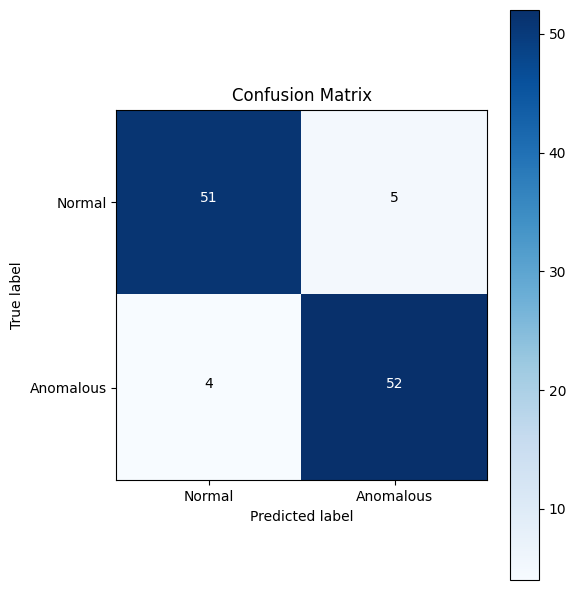

Confusion matrix saved to /content/drive/MyDrive/Thesis/hybrid_model_artifacts/hybrid_confusion_matrix.png


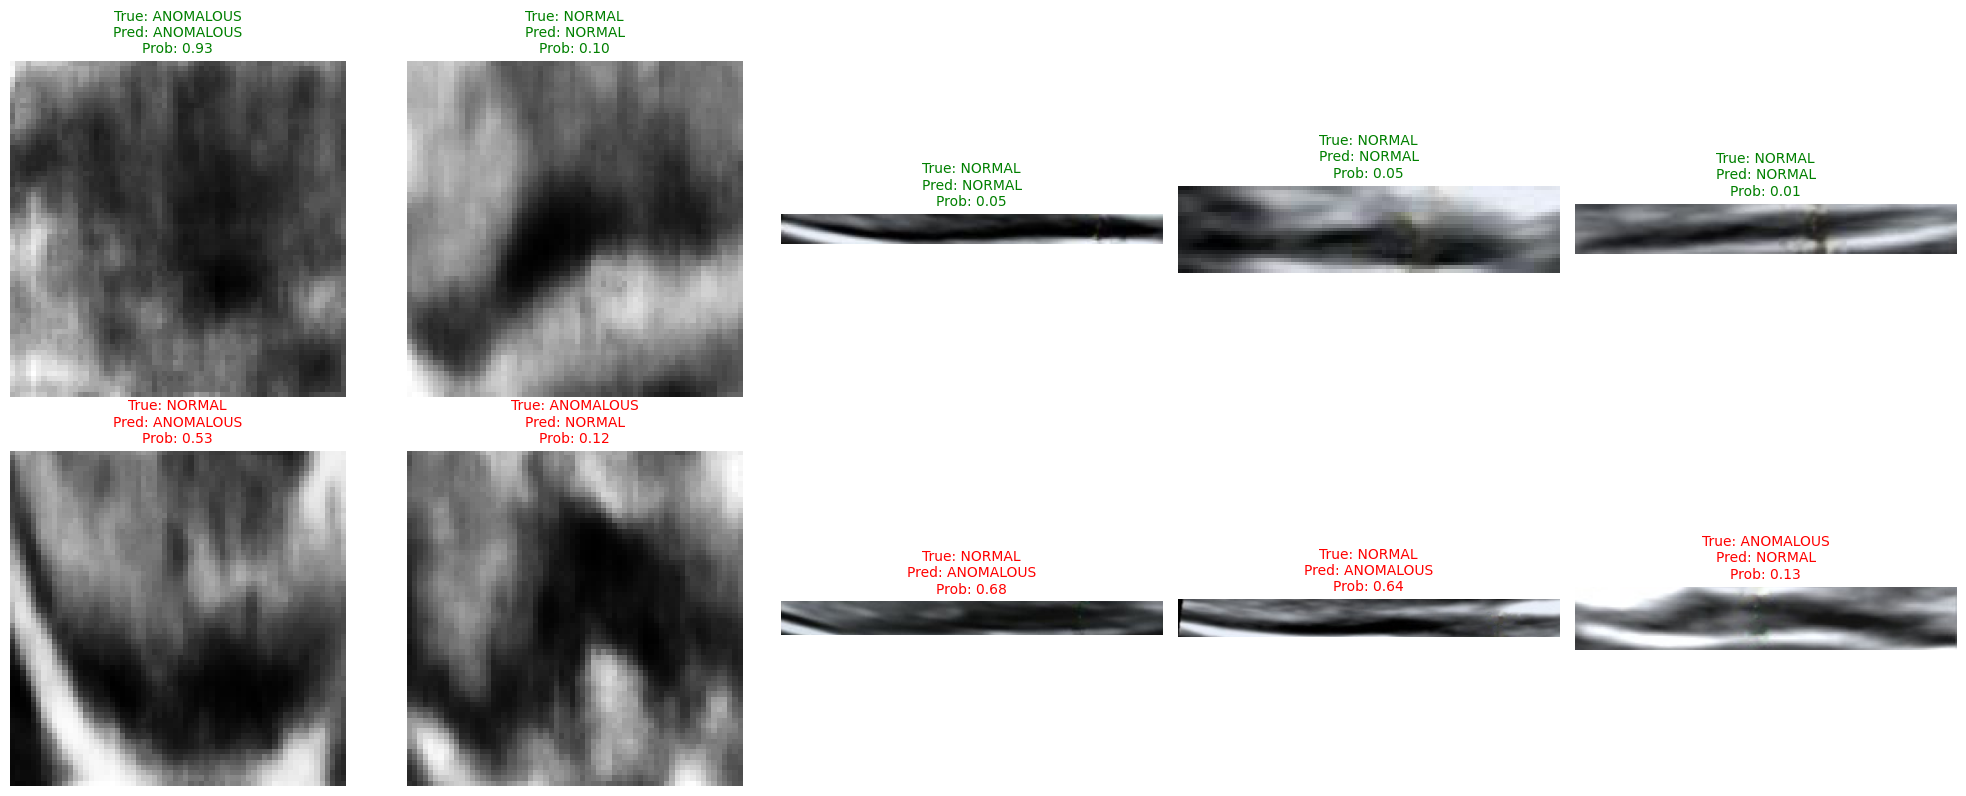

Prediction visualization saved to /content/drive/MyDrive/Thesis/hybrid_model_artifacts/hybrid_sample_predictions.png


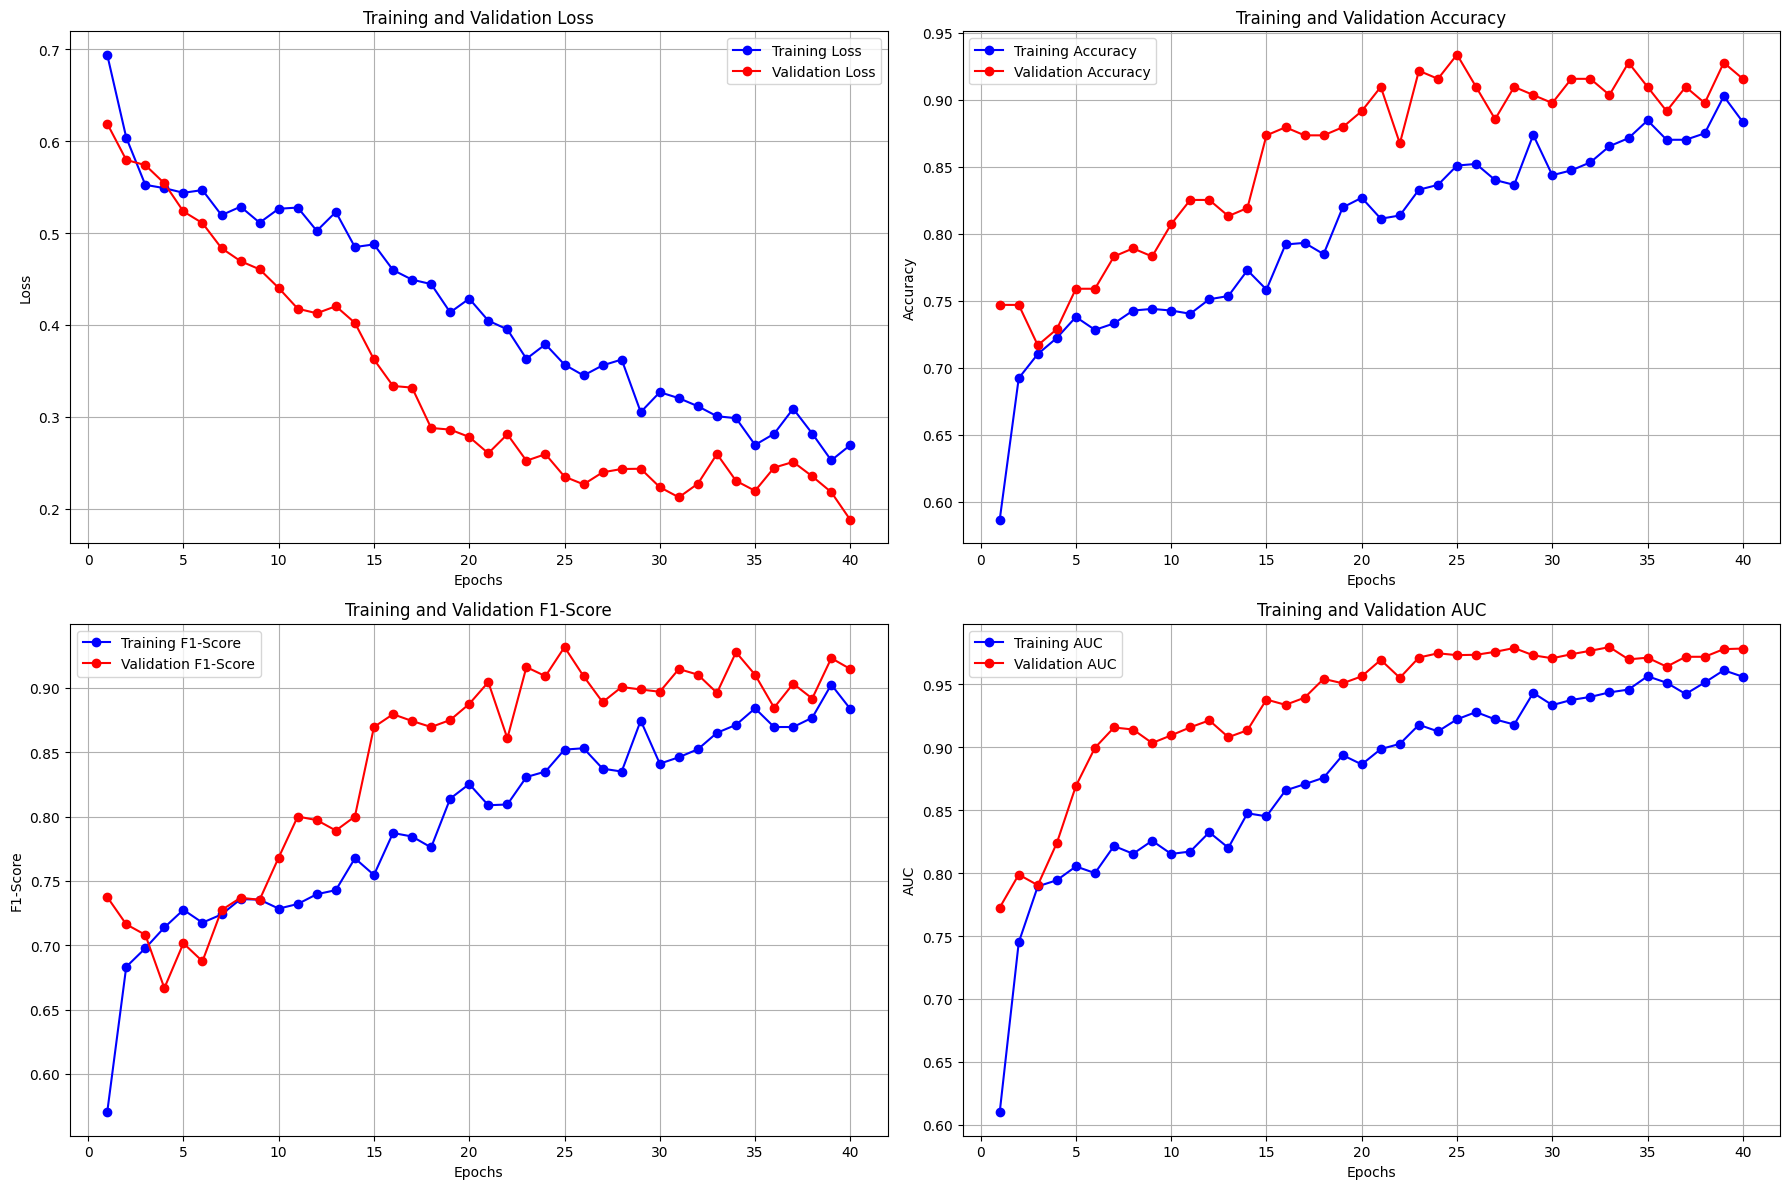

Training history plot saved to /content/drive/MyDrive/Thesis/hybrid_model_artifacts/hybrid_training_history_plot.png


In [27]:
if __name__ == "__main__":
    # Initialize the model, optimizer, and loss function
    model = HYBRIDClassifier().to(device)
    # Freeze all layers of the pre-trained base model initially
    for param in model.base.parameters():
        param.requires_grad = False

    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.BCEWithLogitsLoss()

    # Start the training process
    train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=NUM_EPOCHS)

    # Load the best model for evaluation
    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['hybrid_model_state_dict'])
        print("\nBest model loaded successfully for evaluation.")
    except FileNotFoundError:
        print("\nBest model not found. Cannot perform evaluation.")
        exit()

    # Evaluate the model on the test set
    test_results = evaluate_model(model, test_loader, df_test)

    # Visualize the predictions
    visualize_predictions(test_results, num_samples=10)

    # Plot the training history
    plot_training_history(HISTORY_FILE)

In [28]:
# GRAD-CAM
class EfficientNetGradCAM:
    """
    A class to compute and store Grad-CAM heatmaps for an EfficientNet model.
    """
    def __init__(self, model):
        self.model = model
        self.activations = None
        self.gradients = None

        # Register hooks on the last convolutional block of EfficientNet
        self.target_layer = self.model.base._blocks[-1]
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def __call__(self, x):
        self.model.eval()
        self.model.zero_grad()

        # Forward pass to get output and populate activations
        output = self.model(x)

        # Backpropagate the gradient of the logit
        output.backward()

        activations = self.activations.detach()
        gradients = self.gradients.detach()

        # Pool the gradients to get weights
        weights = torch.mean(gradients, dim=[2, 3], keepdim=True)

        # Compute the CAM
        cam = torch.sum(weights * activations, dim=1, keepdim=True)
        cam = torch.relu(cam)

        # Normalize the CAM
        cam = cam - torch.min(cam)
        if torch.max(cam) > 0:
            cam = cam / torch.max(cam)
        else:
            cam = torch.zeros_like(cam)

        return cam.squeeze().cpu().numpy()

In [32]:
def visualize_gradcam(model, test_df, num_samples=5):
    """
    Generates and displays Grad-CAM visualizations for a few test samples.
    """
    gradcam = EfficientNetGradCAM(model)
    samples = test_df.sample(num_samples)

    # Set the model to evaluation mode
    model.eval()

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    if num_samples == 1:
        axes = [axes]

    transform_for_cam = get_test_transform_en()

    for i, (_, row) in enumerate(samples.iterrows()):
        # Load and preprocess the image
        img_path = row['image_path']

        # Read image from file or create a dummy black image if not found
        if not os.path.exists(img_path):
            image = np.zeros((224, 224, 3), dtype=np.uint8)
            cv2.putText(image, "Dummy Image", (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        else:
            image = cv2.imread(img_path)
            if image is None:
                image = np.zeros((224, 224, 3), dtype=np.uint8)

        # Resize, CLAHE, and convert to RGB
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        original_img_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply the test transform for model input
        input_tensor = transform_for_cam(image=original_img_rgb)['image'].unsqueeze(0).to(device)

        # Get prediction
        with torch.no_grad():
            output = model(input_tensor)
            prob = torch.sigmoid(output).item()
            pred = 1 if prob > 0.5 else 0

        # Get CAM - we need gradients for this part
        input_tensor.requires_grad_(True)
        cam = gradcam(input_tensor)

        # Resize CAM to original image size for overlay
        cam_resized = cv2.resize(cam, (original_img_rgb.shape[1], original_img_rgb.shape[0]))
        heatmap = (cam_resized * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Alpha blend the heatmap and original image
        superimposed_img = cv2.addWeighted(original_img_rgb, 0.6, heatmap, 0.4, 0)

        # Plot the result
        axes[i].imshow(superimposed_img)
        status_map = {0.0: "NORMAL", 1.0: "ANOMALOUS"}
        true_status = status_map.get(row['label'], 'N/A')
        pred_status = status_map.get(pred, 'N/A')

        color = "green" if row['label'] == pred else "red"

        title = (f"True: {true_status} | Pred: {pred_status}\n"
                 f"Prob: {prob:.2f}")
        axes[i].set_title(title, color=color, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    viz_path = os.path.join(SAVE_DIR, 'hybrid_efficientnet_gradcam.png')
    plt.savefig(viz_path, dpi=300)
    plt.show()
    print(f"Grad-CAM visualization saved to {viz_path}")

Loaded pretrained weights for efficientnet-b0
Best model loaded successfully for Grad-CAM visualization.


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


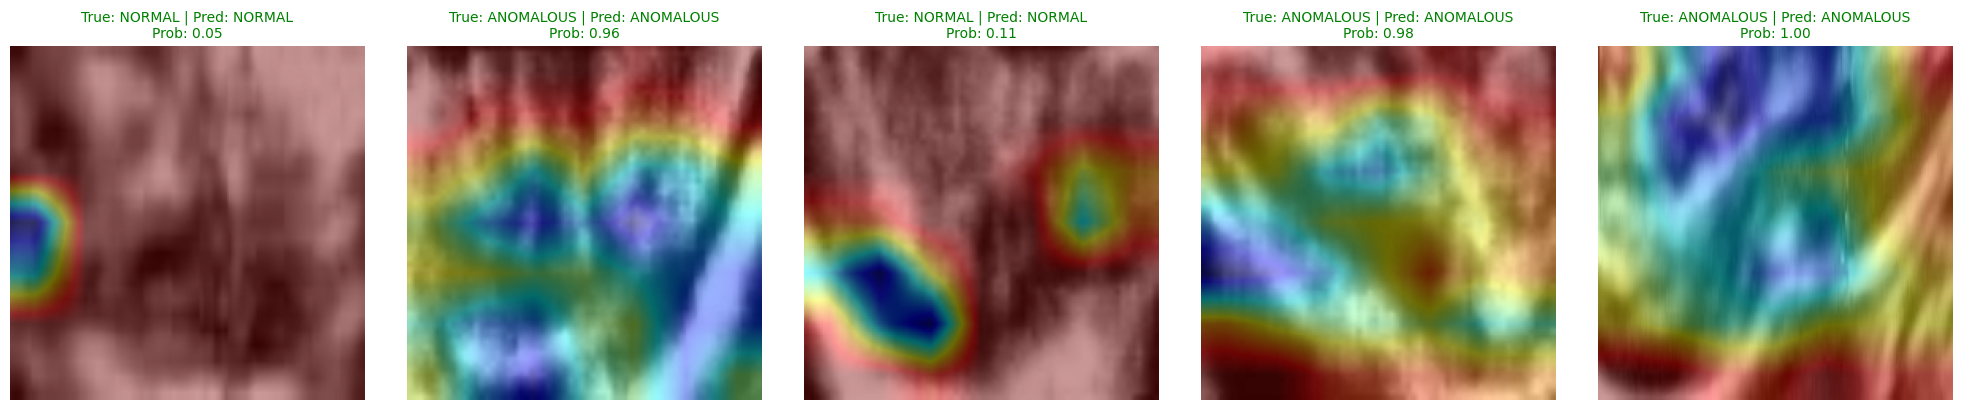

Grad-CAM visualization saved to /content/drive/MyDrive/Thesis/hybrid_model_artifacts/hybrid_efficientnet_gradcam.png


In [33]:
# --- Visualize Grad-CAM ---
if __name__ == "__main__":
    model = HYBRIDClassifier().to(device)

    try:
        checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)
        model.load_state_dict(checkpoint['hybrid_model_state_dict'])
        print("Best model loaded successfully for Grad-CAM visualization.")
    except FileNotFoundError:
        print("Best model not found. Cannot perform Grad-CAM visualization.")
        exit()

    visualize_gradcam(model, df_test, num_samples=5)

# COMPARATIVE EVALUATION OF ALL DATA CONFIGURATIONS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix,classification_report
from torch.utils.data import Dataset, DataLoader
import umap
from efficientnet_pytorch import EfficientNet

In [4]:
# DEFINE MODEL PATHS
BATCH_SIZE = 16
df_test = pd.read_csv('df_test.csv')
MODEL_PATHS = {
    'Real': '/content/drive/MyDrive/Thesis/real_model_artifacts/real_best_model_enet.pth',
    'Synthetic': '/content/drive/MyDrive/Thesis/synthetic_model_artifacts2/syn_best_model_enet.pth',
    'Hybrid': '/content/drive/MyDrive/Thesis/hybrid_model_artifacts/hybrid_best_model_enet.pth'
}

In [5]:
def apply_clahe(image, clipLimit=2.0, tileGridSize=(8, 8)):
    """Applies Contrast Limited Adaptive Histogram Equalization (CLAHE)."""
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(image)

def get_test_transform_en():
    return A.Compose([
        A.Resize(height=256, width=256),
        A.CenterCrop(height=224, width=224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

In [11]:
# DATA LOADER
class Dataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['image_path']

        # Read image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {img_path}")

        # Resize, CLAHE, and convert to RGB
        image_resized = cv2.resize(image, (224, 224))
        gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        clahe_img = apply_clahe(gray)
        clahe_rgb = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

        # Apply augmentation and normalization
        if self.transform:
            augmented = self.transform(image=clahe_rgb)
            image_tensor = augmented['image']
        else:
            image_tensor = torch.tensor(clahe_rgb).permute(2, 0, 1).float() / 255.0

        label = torch.tensor(row['label'], dtype=torch.float32)
        return image_tensor, label

In [12]:
test_dataset = Dataset(df_test, transform=get_test_transform_en())
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True
    )

In [13]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.base = EfficientNet.from_pretrained('efficientnet-b0')

        # Replace the final fully connected layer with an identity module
        num_features = self.base._fc.in_features
        self.base._fc = nn.Identity()

        # Custom classifier on top of the base model
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        features = self.base(x)
        return self.classifier(features)

In [14]:
MODEL_CLASS = Classifier

In [15]:
# Helper function to load a model and its state dictionary
def load_model(path, model_class, device, model_name):
    """
    Loads a PyTorch model from a .pth file, handling common checkpoint formats.
    """
    if not os.path.exists(path):
        print(f"Error: Model file not found at '{path}'. Skipping.")
        return None
    try:
        model = model_class()
        checkpoint = torch.load(path, map_location=device)

        # Define a list of possible keys for the state dictionary
        possible_keys = [
            f"{model_name.lower()}_model_state_dict",
            "state_dict",
            "real_model_state_dict", # Fallback for your specific real model
            "syn_model_state_dict",  # Fallback for your specific synthetic model
            "hybrid_model_state_dict" # Fallback for your specific hybrid model
        ]

        state_dict = None
        for key in possible_keys:
            if key in checkpoint:
                state_dict = checkpoint[key]
                print(f"Found model state dictionary under key: '{key}'")
                break

        # If no key is found, assume the checkpoint itself is the state_dict
        if state_dict is None:
            state_dict = checkpoint
            print("Assuming checkpoint is the state dictionary itself.")

        model.load_state_dict(state_dict)
        model.to(device)
        model.eval()
        print(f"Model loaded from '{path}' successfully.")
        return model
    except Exception as e:
        print(f"Error loading model from '{path}': {e}. Skipping.")
        return None

In [16]:
def evaluate_and_plot(model, dataloader, device, model_name, results, y_test_global, y_probas_global):
    """
    Evaluates a PyTorch model, stores its results, and generates a confusion matrix.
    """
    if model is None:
        print(f"\n--- Skipping evaluation for '{model_name}' ---")
        return

    print(f"\n--- Evaluating Model: {model_name} ---")

    all_labels = []
    all_preds = []
    all_probas = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            probas = torch.sigmoid(outputs).squeeze()
            preds = (probas > 0.5).long()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probas.extend(probas.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='binary', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='binary', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='binary', zero_division=0)

    try:
        auc = roc_auc_score(all_labels, all_probas)
    except ValueError:
        auc = 0.0

    conf_matrix = confusion_matrix(all_labels, all_preds)

    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,

        'f1': f1,
        'auc': auc,
        'confusion_matrix': conf_matrix
    }

    y_test_global[model_name] = all_labels
    y_probas_global[model_name] = all_probas

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, zero_division=0))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Normal', 'Anomalous'],
                yticklabels=['Normal', 'Anomalous'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'conf_matrix {model_name}', dpi=300)
    plt.show()
    return results, y_test_global, y_probas_global

In [17]:
def plot_comparative_metrics(results):
    """Generates a bar chart to compare key metrics across models."""
    fig, ax = plt.subplots(figsize=(12, 8))
    metrics_to_plot = ['accuracy', 'f1', 'auc']
    model_names = list(results.keys())

    x = np.arange(len(model_names))
    width = 0.25

    for i, metric in enumerate(metrics_to_plot):
        values = [results[name][metric] for name in model_names]
        ax.bar(x + i*width, values, width, label=metric.upper())

    ax.set_ylabel('Score')
    ax.set_title('Comparative Performance Metrics')
    ax.set_xticks(x + width)
    ax.set_xticklabels(model_names)
    ax.legend()
    plt.ylim(0.0, 1.0)
    plt.show()

In [18]:
def plot_roc_curves(y_test_global, y_probas_global):
    """Generates a single plot with ROC curves for all models."""
    plt.figure(figsize=(10, 8))

    for model_name, y_test in y_test_global.items():
        y_probas = y_probas_global[model_name]
        fpr, tpr, _ = roc_curve(y_test, y_probas)
        auc = roc_auc_score(y_test, y_probas)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [19]:
def save_results_to_csv(results_dict, path):
    """Saves evaluation results to a CSV file."""
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(results_dict, orient='index')

    # Drop the confusion matrix as it's not a single value
    df = df.drop(columns=['confusion_matrix'])

    # Round the numeric columns for cleaner output
    df = df.round(4)

    # Save to CSV
    df.to_csv(path)
    print(f"\nResults saved successfully to: {path}")

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


100%|██████████| 20.4M/20.4M [00:00<00:00, 45.0MB/s]


Loaded pretrained weights for efficientnet-b0
Found model state dictionary under key: 'real_model_state_dict'
Model loaded from '/content/drive/MyDrive/Thesis/real_model_artifacts/real_best_model_enet.pth' successfully.

--- Evaluating Model: Real ---
Accuracy: 0.8929
Precision: 0.9524
Recall: 0.8000
F1-Score: 0.8696
AUC: 0.9655

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        62
         1.0       0.95      0.80      0.87        50

    accuracy                           0.89       112
   macro avg       0.90      0.88      0.89       112
weighted avg       0.90      0.89      0.89       112



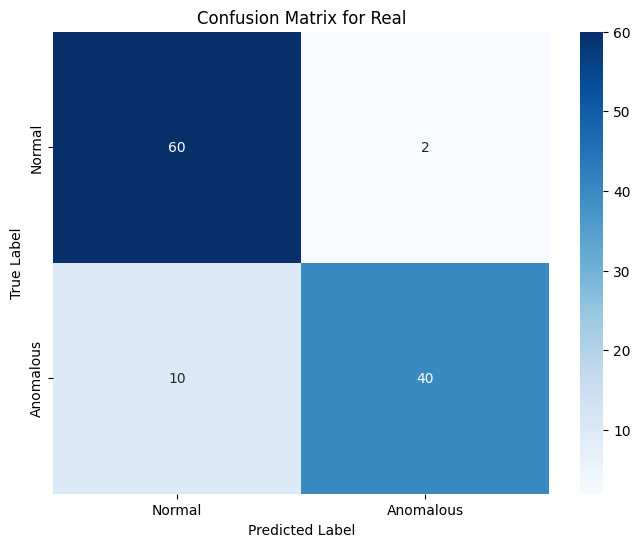

Loaded pretrained weights for efficientnet-b0
Found model state dictionary under key: 'syn_model_state_dict'
Model loaded from '/content/drive/MyDrive/Thesis/synthetic_model_artifacts2/syn_best_model_enet.pth' successfully.

--- Evaluating Model: Synthetic ---
Accuracy: 0.7232
Precision: 0.6267
Recall: 0.9400
F1-Score: 0.7520
AUC: 0.8845

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.55      0.69        62
         1.0       0.63      0.94      0.75        50

    accuracy                           0.72       112
   macro avg       0.77      0.74      0.72       112
weighted avg       0.79      0.72      0.72       112



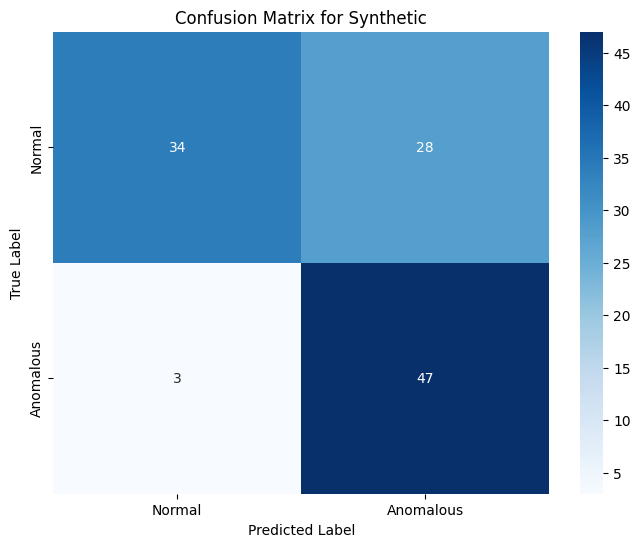

Loaded pretrained weights for efficientnet-b0
Found model state dictionary under key: 'hybrid_model_state_dict'
Model loaded from '/content/drive/MyDrive/Thesis/hybrid_model_artifacts/hybrid_best_model_enet.pth' successfully.

--- Evaluating Model: Hybrid ---
Accuracy: 0.9464
Precision: 0.8929
Recall: 1.0000
F1-Score: 0.9434
AUC: 0.9903

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        62
         1.0       0.89      1.00      0.94        50

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



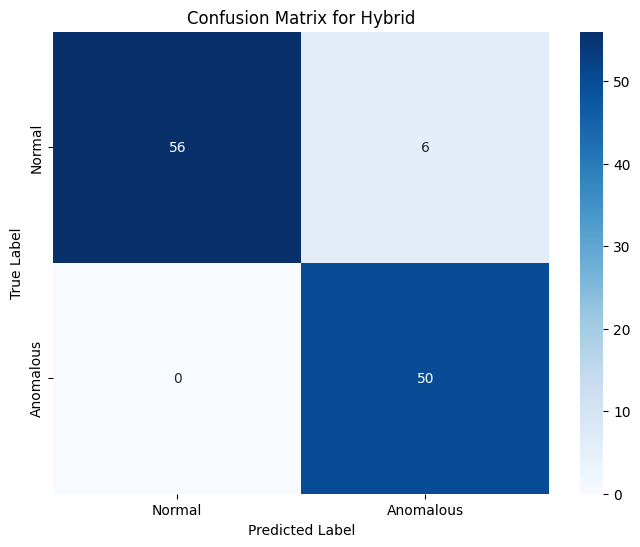


Results saved successfully to: /content/drive/MyDrive/Thesis/evaluation_results.csv

--- Generating Comparative Plots ---


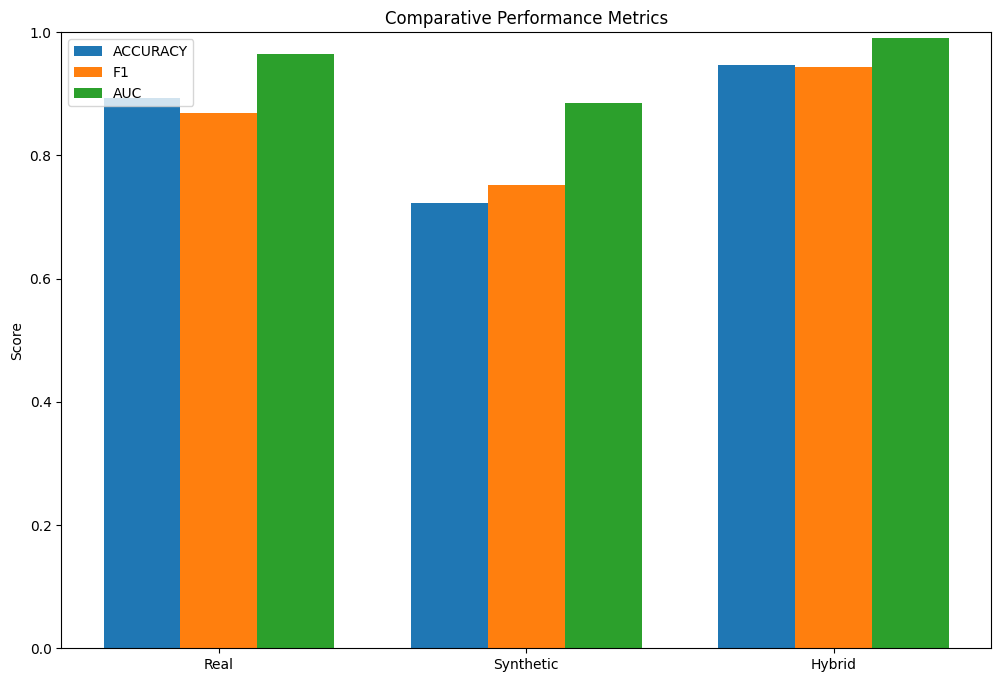

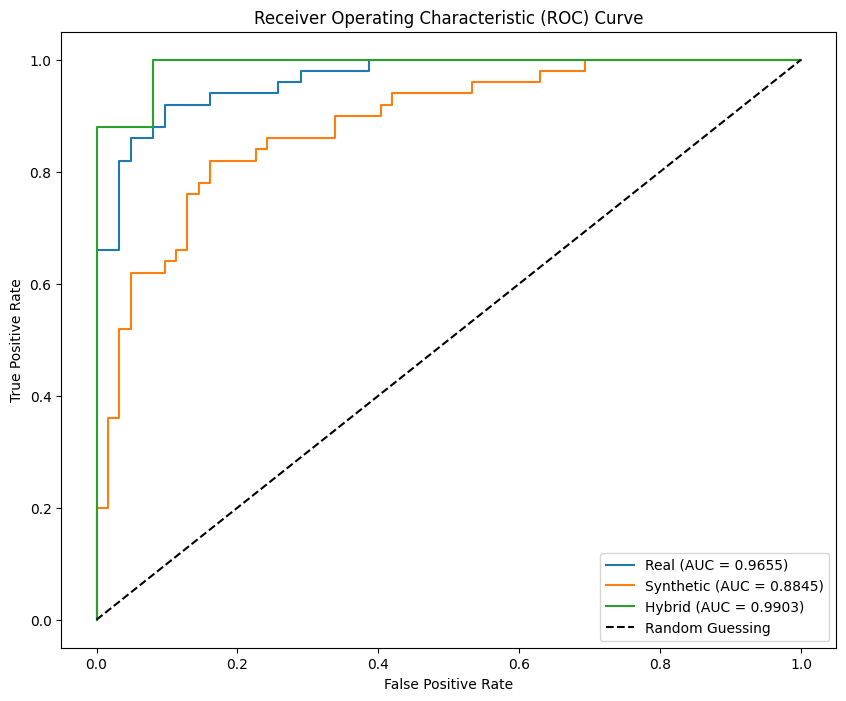

In [23]:
if __name__ == "__main__":
    model_results = {}
    y_test_global = {}
    y_probas_global = {}

    for model_name, model_path in MODEL_PATHS.items():
        model = load_model(model_path, MODEL_CLASS, device, model_name)
        evaluate_and_plot(model, test_loader, device, model_name, model_results, y_test_global, y_probas_global)

    if model_results:
        # Save the results to a CSV file
        results_save_path = '/content/drive/MyDrive/Thesis/evaluation_results.csv'
        save_results_to_csv(model_results, results_save_path)

        print("\n--- Generating Comparative Plots ---")
        plot_comparative_metrics(model_results)
        plot_roc_curves(y_test_global, y_probas_global)


**UMAP VISUALIZATION**

In [24]:
# Number of samples to use for UMAP visualization
NUM_SAMPLES_PER_DATASET = 200

In [25]:
def get_features(model, dataloader, device, num_samples):
    """
    Extracts features from the penultimate layer of the model for a given dataset.
    This function will be called for each model (Real, Synthetic, Hybrid) using
    the same real test dataset as input. The features returned will represent
    how each respective model 'views' the real data.
    """
    model.eval()
    features_list = []

    with torch.no_grad():
        for i, (inputs, _) in enumerate(dataloader):
            if len(features_list) >= num_samples:
                break
            inputs = inputs.to(device)
            # The model's forward pass should return features from the base
            # to do this, we'll manually get the output of the base network
            features = model.base(inputs)
            features_list.append(features.cpu().numpy())

    return np.vstack(features_list)

In [26]:
def plot_umap(features, labels, title, filename):
    """
    Generates a UMAP plot for the given features and labels.
    """
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=16)
    embedding = reducer.fit_transform(features)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=labels,
        palette=sns.color_palette("hsv", len(np.unique(labels))),
        legend="full",
        s=50,
        alpha=0.7
    )
    plt.title(title, fontsize=20)
    plt.xlabel('UMAP Dimension 1', fontsize=14)
    plt.ylabel('UMAP Dimension 2', fontsize=14)
    plt.savefig('UMAP Viz', dpi=300)
    plt.show()

Loading and extracting features with the 'Real' model...
Loaded pretrained weights for efficientnet-b0
Extracted 112 features with the 'Real' model.
Loading and extracting features with the 'Synthetic' model...
Loaded pretrained weights for efficientnet-b0
Extracted 112 features with the 'Synthetic' model.
Loading and extracting features with the 'Hybrid' model...
Loaded pretrained weights for efficientnet-b0
Extracted 112 features with the 'Hybrid' model.

Performing UMAP on 336 combined samples.


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


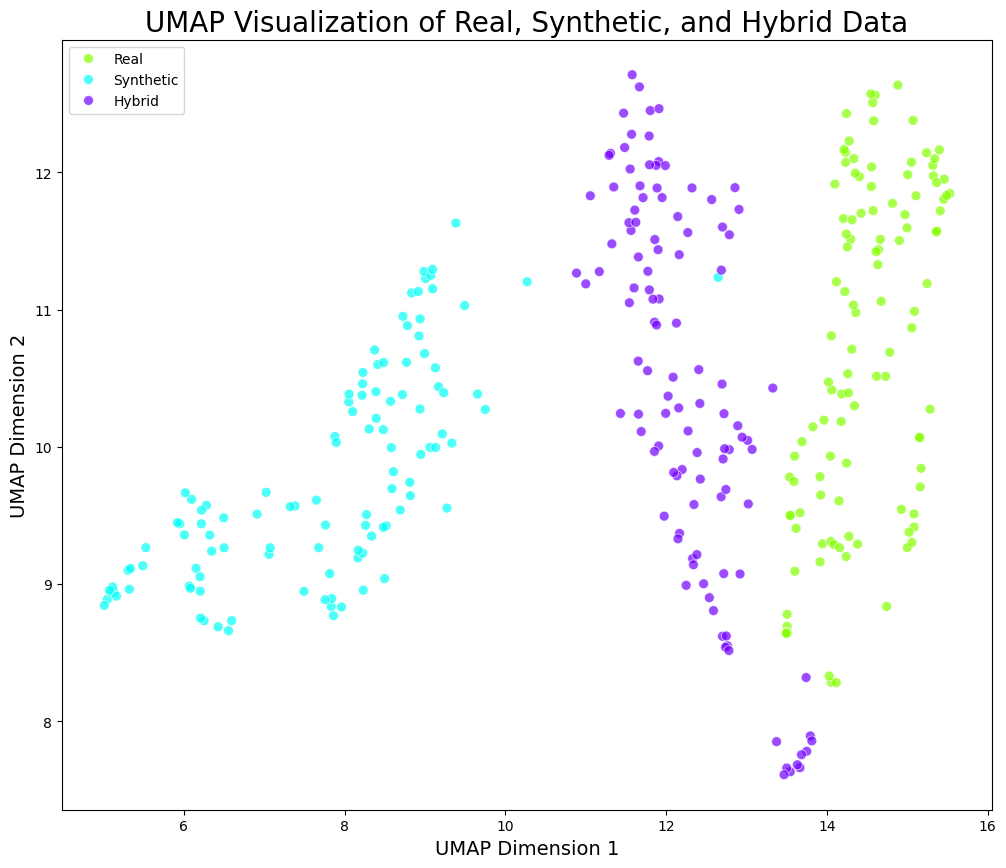

In [30]:
if __name__ == "__main__":
    # Create an empty dictionary to store features from each model
    model_features = {}

    # Extract features using each model
    for model_name, model_path in MODEL_PATHS.items():
        print(f"Loading and extracting features with the '{model_name}' model...")
        model = Classifier()
        try:
            checkpoint = torch.load(model_path, map_location=device)

            # This is the new, more specific logic to handle your saved files.
            state_dict_key = f"{model_name.lower()}_model_state_dict"
            # Explicitly check for the "syn_model_state_dict" key as a fallback
            if state_dict_key in checkpoint:
                state_dict = checkpoint[state_dict_key]
            elif "syn_model_state_dict" in checkpoint and model_name == "Synthetic":
                state_dict = checkpoint["syn_model_state_dict"]
            elif "model_state_dict" in checkpoint:
                 state_dict = checkpoint["model_state_dict"]
            else:
                 # If the key is not found, assume the checkpoint itself is the state_dict
                 state_dict = checkpoint


            model.load_state_dict(state_dict, strict=False)
            model.to(device)
            model.eval()

            # Pass the same real test data to each model to get features
            features = get_features(model, test_loader, device, NUM_SAMPLES_PER_DATASET)

            # Only add features if they were successfully extracted
            if features.size > 0:
                model_features[model_name] = features
                print(f"Extracted {features.shape[0]} features with the '{model_name}' model.")
            else:
                print(f"No features extracted for model '{model_name}'.")

        except Exception as e:
            print(f"Error loading model '{model_name}': {e}. Skipping.")

    # Combine features and labels for UMAP
    if model_features:
        all_features = np.vstack(list(model_features.values()))
        all_labels = []
        for model_name, features in model_features.items():
            all_labels.extend([model_name] * features.shape[0])

        print(f"\nPerforming UMAP on {len(all_labels)} combined samples.")

        # Generate and plot UMAP
        if all_features.shape[0] > 0:
            plot_umap(all_features, all_labels, 'UMAP Visualization of Real, Synthetic, and Hybrid Data', 'umap_plot.png')
        else:
            print("No features were extracted. Please check model paths and dataset.")
    else:
        print("\nNo models were successfully loaded or no features could be extracted. Please check the paths to your model files and your dataset.")
